# 0. Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

In [226]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
from pandas import DatetimeIndex as dti
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import KFold,RandomizedSearchCV,GridSearchCV,cross_val_score,train_test_split
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz
from xgboost import XGBRegressor
import re
from sklearn.impute import KNNImputer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.metrics import accuracy_score,classification_report,RocCurveDisplay
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv("C:\\Users\\meenaxi\\Downloads\\telecom-churn\\train.csv")
unseen = pd.read_csv("C:\\Users\\meenaxi\\Downloads\\telecom-churn\\test.csv")
sample = pd.read_csv("C:\\Users\\meenaxi\\Downloads\\telecom-churn\\sample.csv")
data_dict = pd.read_csv("C:\\Users\\meenaxi\\Downloads\\telecom-churn\\data_dictionary.csv")

In [3]:
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [4]:
data_dict

Acronyms                                        Description
0     CIRCLE_ID  Telecom circle area to which the customer belo...
1           LOC            Local calls  within same telecom circle
2           STD              STD calls  outside the calling circle
3            IC                                     Incoming calls
4            OG                                     Outgoing calls
5           T2T  Operator T to T ie within same operator mobile...
6       T2M                    Operator T to other operator mobile
7       T2O                Operator T to other operator fixed line
8       T2F                         Operator T to fixed lines of T
9       T2C                      Operator T to its own call center
10     ARPU                               Average revenue per user
11      MOU                          Minutes of usage  voice calls
12      AON      Age on network  number of days the customer is...
13     ONNET     All kind of calls within the same operator net...
14   OFFNET       All kind of calls outside the operator T network
15         ROAM  Indicates that customer is in roaming zone dur...
16       SPL                                         Special calls
17      ISD                                              ISD calls
18     RECH                                               Recharge
19      NUM                                                 Number
20      AMT                               Amount in local currency
21      MAX                                                Maximum
22     DATA                                        Mobile internet
23       3G                                              G network
24       AV                                                Average
25      VOL                     Mobile internet usage volume in MB
26       2G                                              G network
27      PCK                  Prepaid service schemes called  PACKS
28    NIGHT         Scheme to use during specific night hours only
29  MONTHLY      Service schemes with validity equivalent to a ...
30    SACHET     Service schemes with validity smaller than a m...
31      *.6                              KPI for the month of June
32      *.7                              KPI for the month of July
33      *.8                            KPI for the month of August
34      FB_USER  Service scheme to avail services of Facebook a...
35      VBC      Volume based cost  when no specific scheme is ...

In [5]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [6]:
data.shape

(69999, 172)

In [7]:
data.columns[0:50]

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8

In [8]:
data.columns[50:100]

Index(['std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6',
       'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'std_ic_mou_7',
       'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'isd_ic_mou_7'],
 

In [9]:
data.columns[100:171]

Index(['isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_2g_6',

In [10]:
data.shape

(69999, 172)

# 1. Data Cleaning and Missing Data Imputation

In [11]:
missing_data=data.isnull().sum()

In [12]:
col=pd.DataFrame(missing_data[data.isnull().sum() * 100/data.shape[0] <= 70]).index

In [13]:
data[col].head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [14]:
data['circle_id'].value_counts()

circle_id
109    69999
Name: count, dtype: int64

In [15]:
data['last_date_of_month_6'].value_counts()

last_date_of_month_6
6/30/2014    69999
Name: count, dtype: int64

In [16]:
data['last_date_of_month_7'].value_counts()

last_date_of_month_7
7/31/2014    69600
Name: count, dtype: int64

In [17]:
data['last_date_of_month_8'].value_counts()

last_date_of_month_8
8/31/2014    69266
Name: count, dtype: int64

In [18]:
col=col[~col.isin(['last_date_of_month_8','last_date_of_month_7','last_date_of_month_6','circle_id'])]

In [19]:
remaining_missing_data=data[col].isnull().sum()

In [20]:
missing_data_columns=remaining_missing_data[((data[col].isnull().sum() * 100)/data[col].shape[0]) > 0].index

In [21]:
numeric_col=missing_data_columns[~missing_data_columns.isin(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'])]

In [22]:
date_of_last_rech_6_imputer=data[['date_of_last_rech_6']].mode()['date_of_last_rech_6'][0]

In [23]:
date_of_last_rech_7_imputer=data[['date_of_last_rech_7']].mode()['date_of_last_rech_7'][0]

In [24]:
date_of_last_rech_8_imputer=data[['date_of_last_rech_8']].mode()['date_of_last_rech_8'][0]

In [25]:
data['date_of_last_rech_6']=data[['date_of_last_rech_6']].fillna(date_of_last_rech_6_imputer)
data['date_of_last_rech_7']=data[['date_of_last_rech_7']].fillna(date_of_last_rech_7_imputer)
data['date_of_last_rech_8']=data[['date_of_last_rech_8']].fillna(date_of_last_rech_8_imputer)

In [26]:
data[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].isnull().sum()

date_of_last_rech_6    0
date_of_last_rech_7    0
date_of_last_rech_8    0
dtype: int64

#### Missing Data Imputation with KNearest Neighbour

In [27]:
knni = KNNImputer()

In [28]:
pre_processed_data=data[col].copy()

In [29]:
pre_processed_data[numeric_col]=knni.fit_transform(pre_processed_data[numeric_col])

In [30]:
pre_processed_data[numeric_col].head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  onnet_mou_6  onnet_mou_7  \
0             0.0             0.0             0.0        48.58       124.38   
1             0.0             0.0             0.0         0.00         0.00   
2             0.0             0.0             0.0         0.53        15.93   
3             0.0             0.0             0.0         7.26        16.01   
4             0.0             0.0             0.0        21.28         4.83   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         1.29         32.24         96.68          2.33           0.00   
1         0.00          0.00         25.99         30.89           0.00   
2         0.00         53.99         82.05          0.00           0.00   
3         0.00         68.76         78.48         50.23           0.00   
4         6.13         56.99         38.11          9.63          53.64   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0            0.0           0.00            0.0           0.00   
1            0.0            0.0           0.00            0.0           0.00   
2            0.0            0.0           0.00            0.0           0.00   
3            0.0            0.0           0.00            0.0           1.63   
4            0.0            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56        

In [31]:
pre_processed_data[numeric_col].isnull().sum().sum()

np.int64(0)

In [32]:
churn_rate=pre_processed_data['churn_probability'].value_counts()

In [33]:
round(churn_rate*100/churn_rate.sum(),2)

churn_probability
0    89.81
1    10.19
Name: count, dtype: float64

# 3. EDA

In [34]:
def boxplot(d,col,target='churn_probability',quantile=0.95):
    pyplot.figure(figsize=(25,30))
    for i in range(0,len(col)):
        pyplot.subplot(len(col),2,i+1)
        plt_data=d[d[col[i]]<d[col[i]].quantile(0.95)]
        if(len(target)==0):
            sns.boxplot(plt_data[col[i]])
        else:
            sns.boxplot(plt_data,x=plt_data[target],y=plt_data[col[i]])
    pyplot.show()


In [35]:
def quantiles(d,col,filt=None):
    if(filt is None):
        print(pd.DataFrame(d[col].quantile([0.10,0.25,0.35,0.50,0.75,.90,.95,.99])))
    else:
        print(pd.DataFrame(d[col][filt].quantile([0.10,0.25,0.35,0.50,0.75,.90,.95,.99])))

### Univariate Analysis

#### Analysis Outgoing local calls within same operator

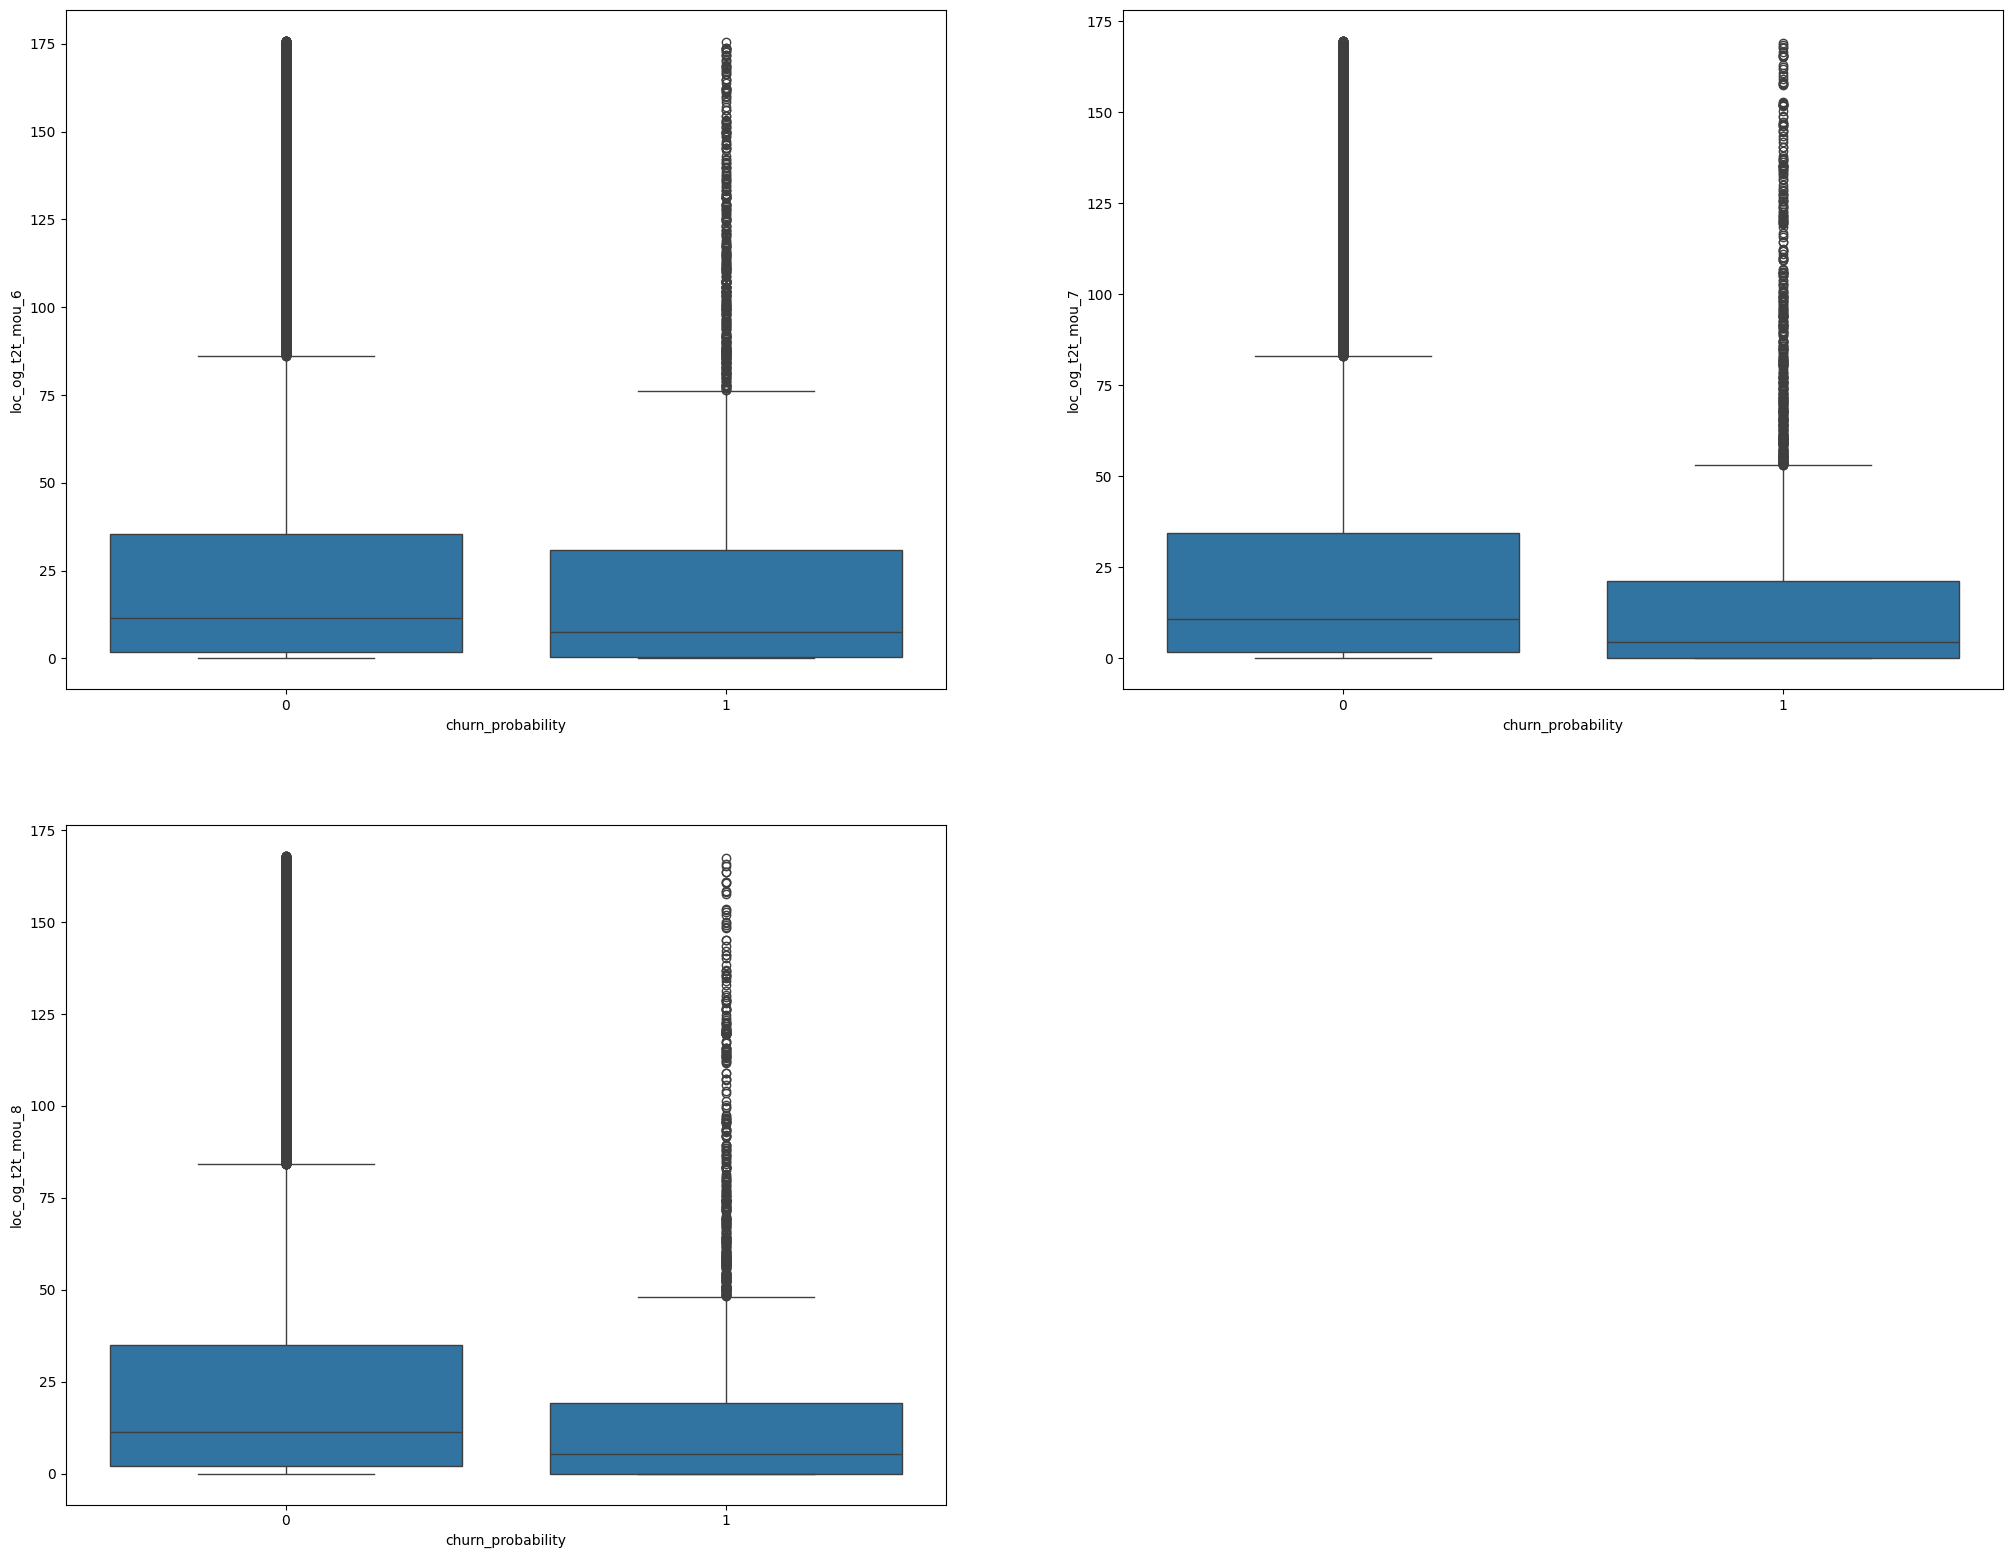

In [36]:
boxplot(pre_processed_data,col=['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8'])

In [37]:
quantiles(pre_processed_data,col=['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8'])

      loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8
0.10            0.0000             0.000             0.000
0.25            1.9000             1.780             1.890
0.35            5.0400             4.650             4.960
0.50           12.5400            11.598            12.080
0.75           42.3800            40.440            40.290
0.90          102.9600            98.840            98.290
0.95          175.8630           169.583           167.980
0.99          539.0146           518.193           506.684


In [38]:
quantiles(pre_processed_data,col=['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8'],filt=
          pre_processed_data['churn_probability']==1)

      loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8
0.10            0.0000          0.000000          0.000000
0.25            0.4515          0.000000          0.000000
0.35            2.4600          1.080000          0.680000
0.50            8.0500          4.784000          5.520000
0.75           34.3825         23.160000         19.909000
0.90           59.1260         46.166503         45.686109
0.95          109.9960         77.597500         57.192700
0.99          357.3733        227.935000        140.625800


#### Observation
1. The minutes of usage for outgoing calls within the telecom operator is decreasing month on month for the customers who are about to churn
2. The median usage is around 11-12 minutes,and for churning users its around 5-8 minutes
3. The upper quartile usage is around 40 minutes , but varies for churning users around 19-34 mins

#### Analysis Outgoing local calls within different operator Mobile

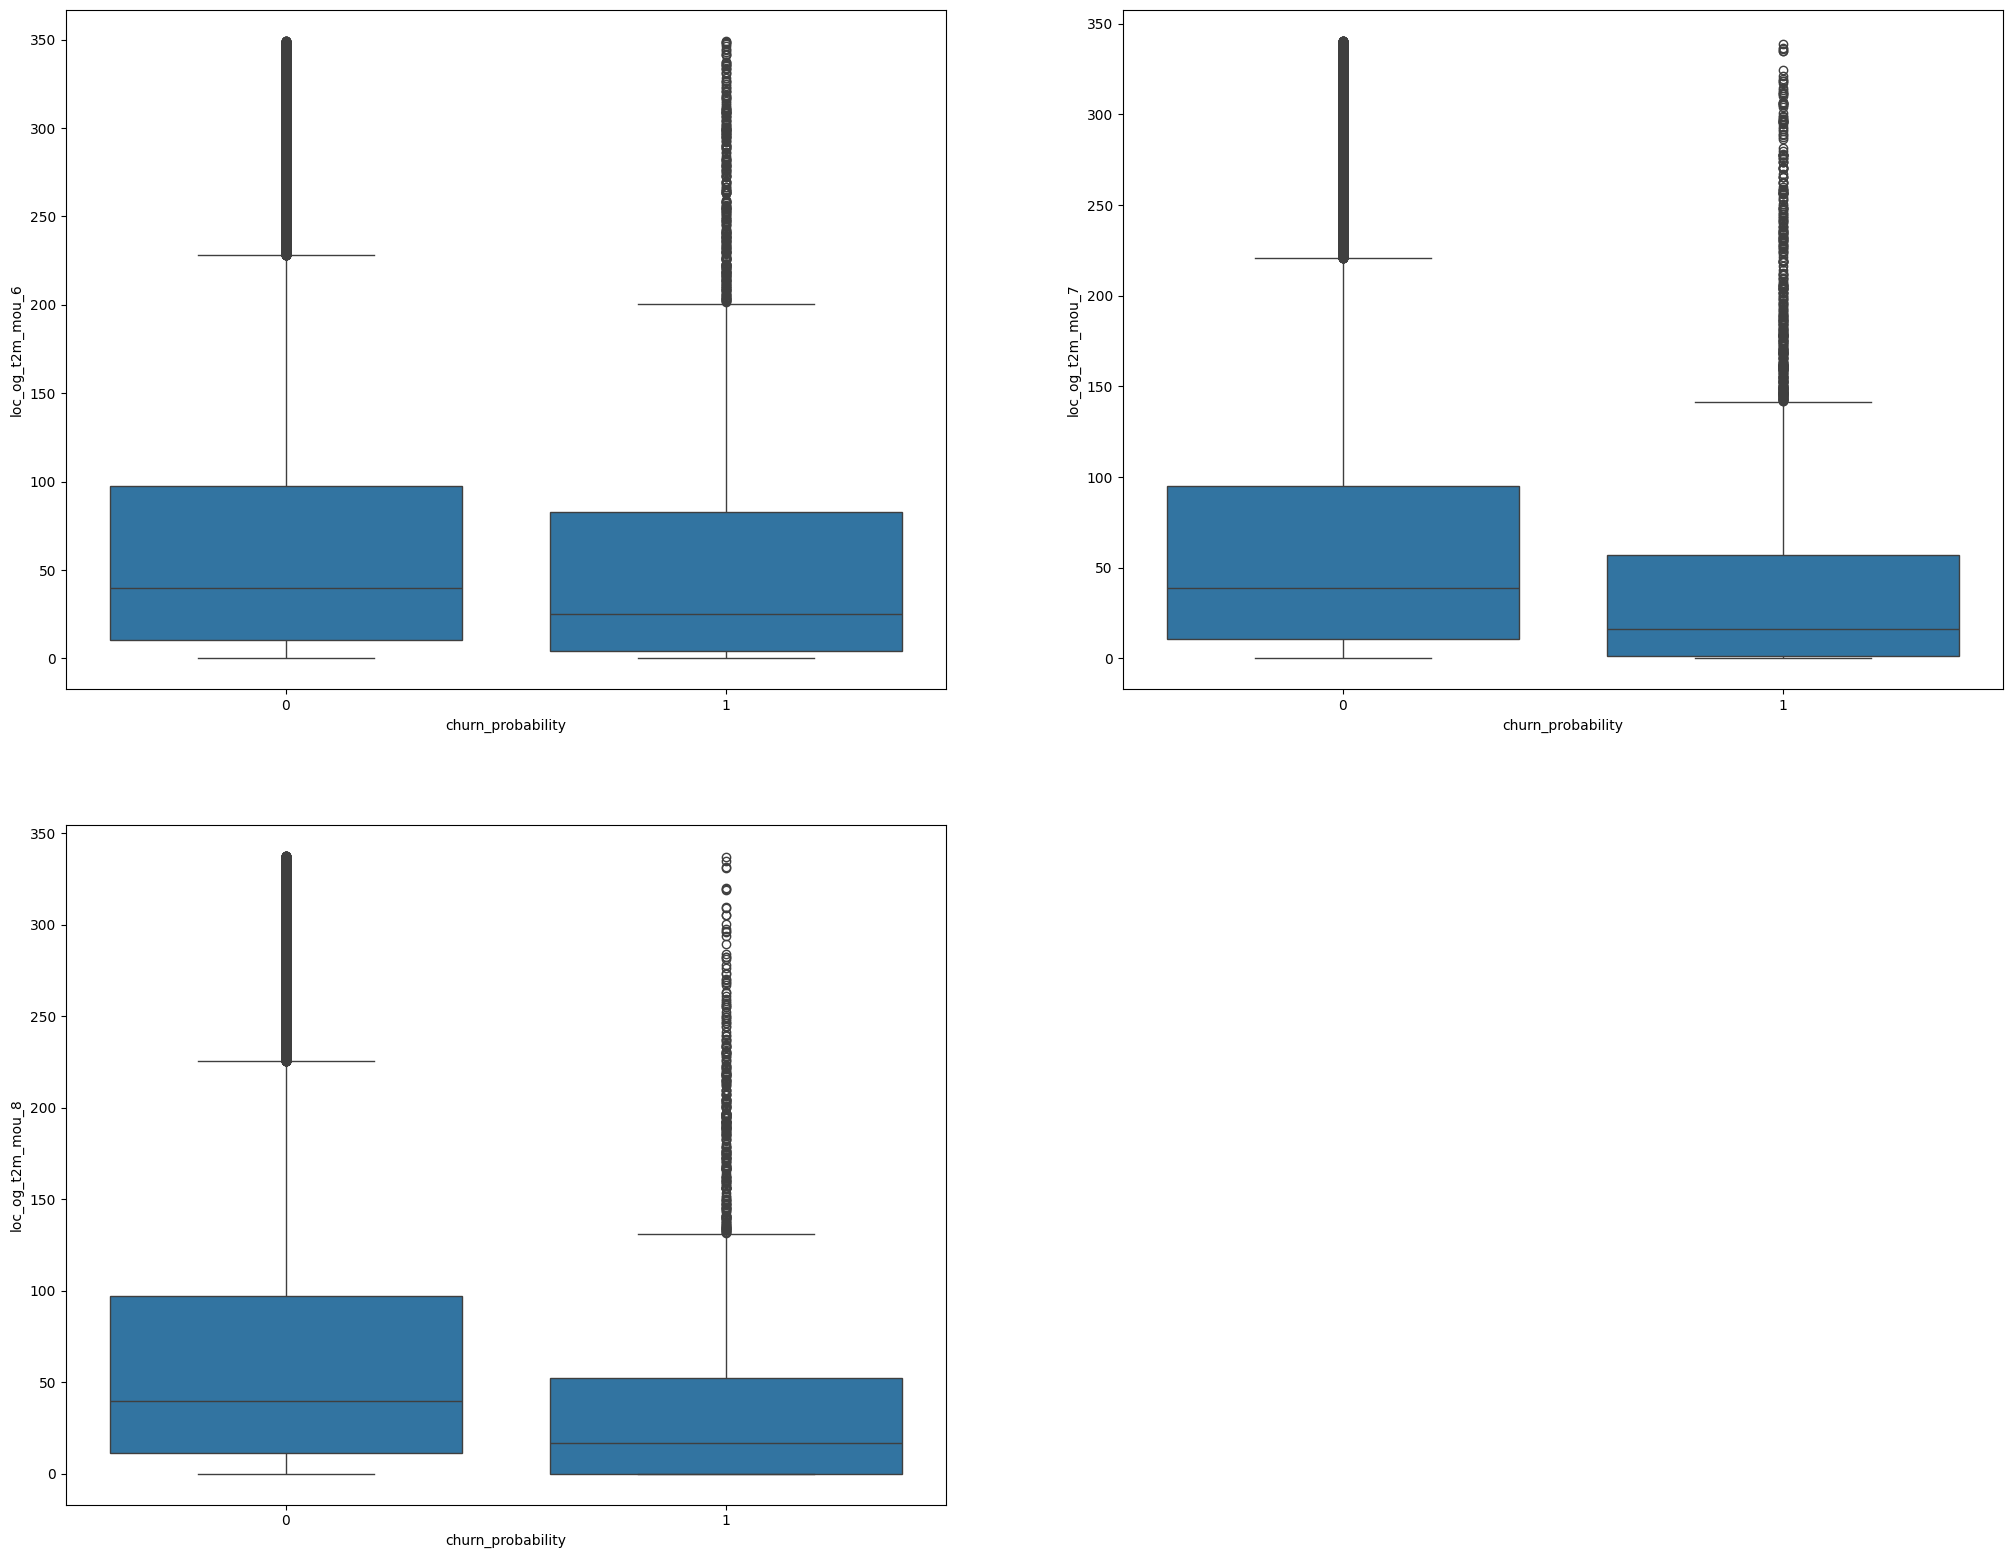

In [39]:
local_og_t2m=['loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8']
boxplot(pre_processed_data,local_og_t2m)

In [40]:
quantiles(pre_processed_data,col=['loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8'])

      loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8
0.10            0.2980            0.4000             0.360
0.25           10.7280           10.3400            10.660
0.35           21.1300           19.9558            20.710
0.50           42.4300           39.9400            40.640
0.75          108.6900          104.3000           104.790
0.90          229.6440          222.3800           223.810
0.95          349.3940          340.4920           337.610
0.99          734.8892          714.3836           716.447


In [41]:
quantiles(pre_processed_data,col=['loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8'])

      loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8
0.10            0.2980            0.4000             0.360
0.25           10.7280           10.3400            10.660
0.35           21.1300           19.9558            20.710
0.50           42.4300           39.9400            40.640
0.75          108.6900          104.3000           104.790
0.90          229.6440          222.3800           223.810
0.95          349.3940          340.4920           337.610
0.99          734.8892          714.3836           716.447


In [42]:
quantiles(pre_processed_data,col=['loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8'],filt=(pre_processed_data['churn_probability']==1))

      loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8
0.10            0.0000            0.0000          0.000000
0.25            4.3025            1.2900          0.000000
0.35           11.1085            6.1300          4.557000
0.50           26.8000           16.7750         16.895000
0.75           91.3015           61.0800         53.093000
0.90          154.8090          104.5660         91.121447
0.95          247.5085          171.0295        122.914300
0.99          541.6749          429.6597        255.873440


#### Observation
1.The overall median minutes of usage is around 39-42 minutes whereas for churning users it is around 16-26 minutes

2.The minutes of usage for outgoing calls to the mobile operator is decreasing month on month for the customers who are about to churn


#### Analysis Outgoing local calls with fixed line

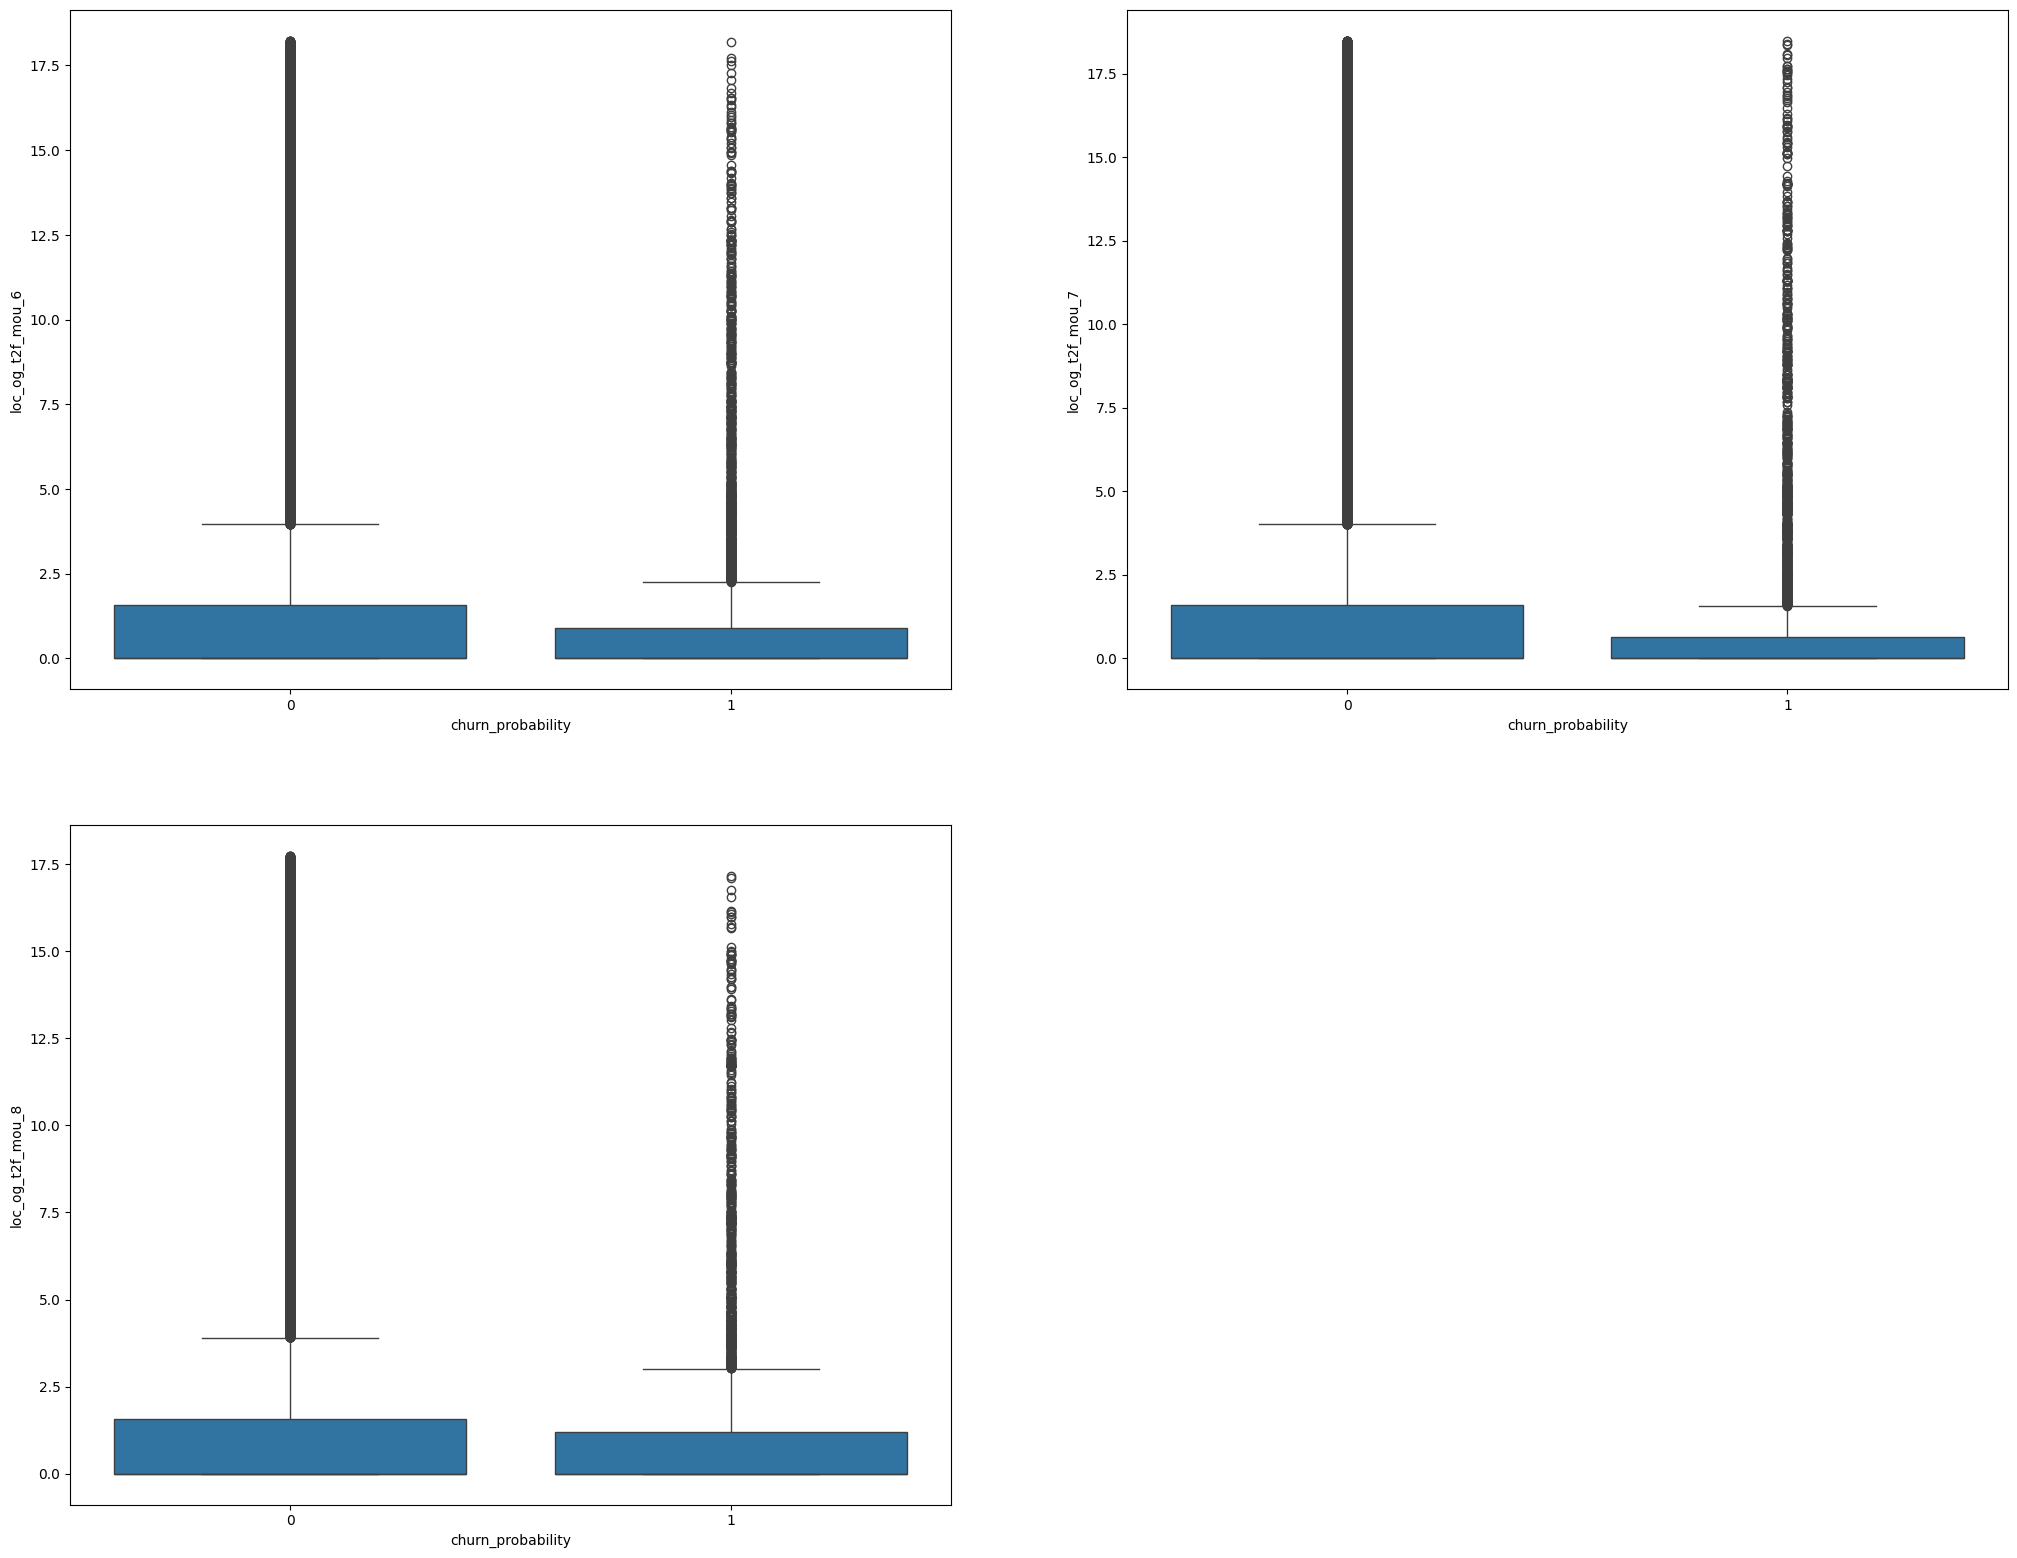

      loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8
0.10            0.0000            0.0000            0.0000
0.25            0.0000            0.0000            0.0000
0.35            0.0000            0.0000            0.0000
0.50            0.0000            0.0000            0.0000
0.75            2.2300            2.2300            2.2100
0.90            9.2400            9.2600            9.0400
0.95           18.2400           18.4900           17.7400
0.99           53.3904           54.6802           53.3802


In [43]:
local_og_t2f=['loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8']
boxplot(pre_processed_data,local_og_t2f)
quantiles(pre_processed_data,col=['loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8'])

#### Observation
There is not much of difference in  minutes of usage for outgoing calls to the fixed line 

#### Analysis incoming local calls within operator

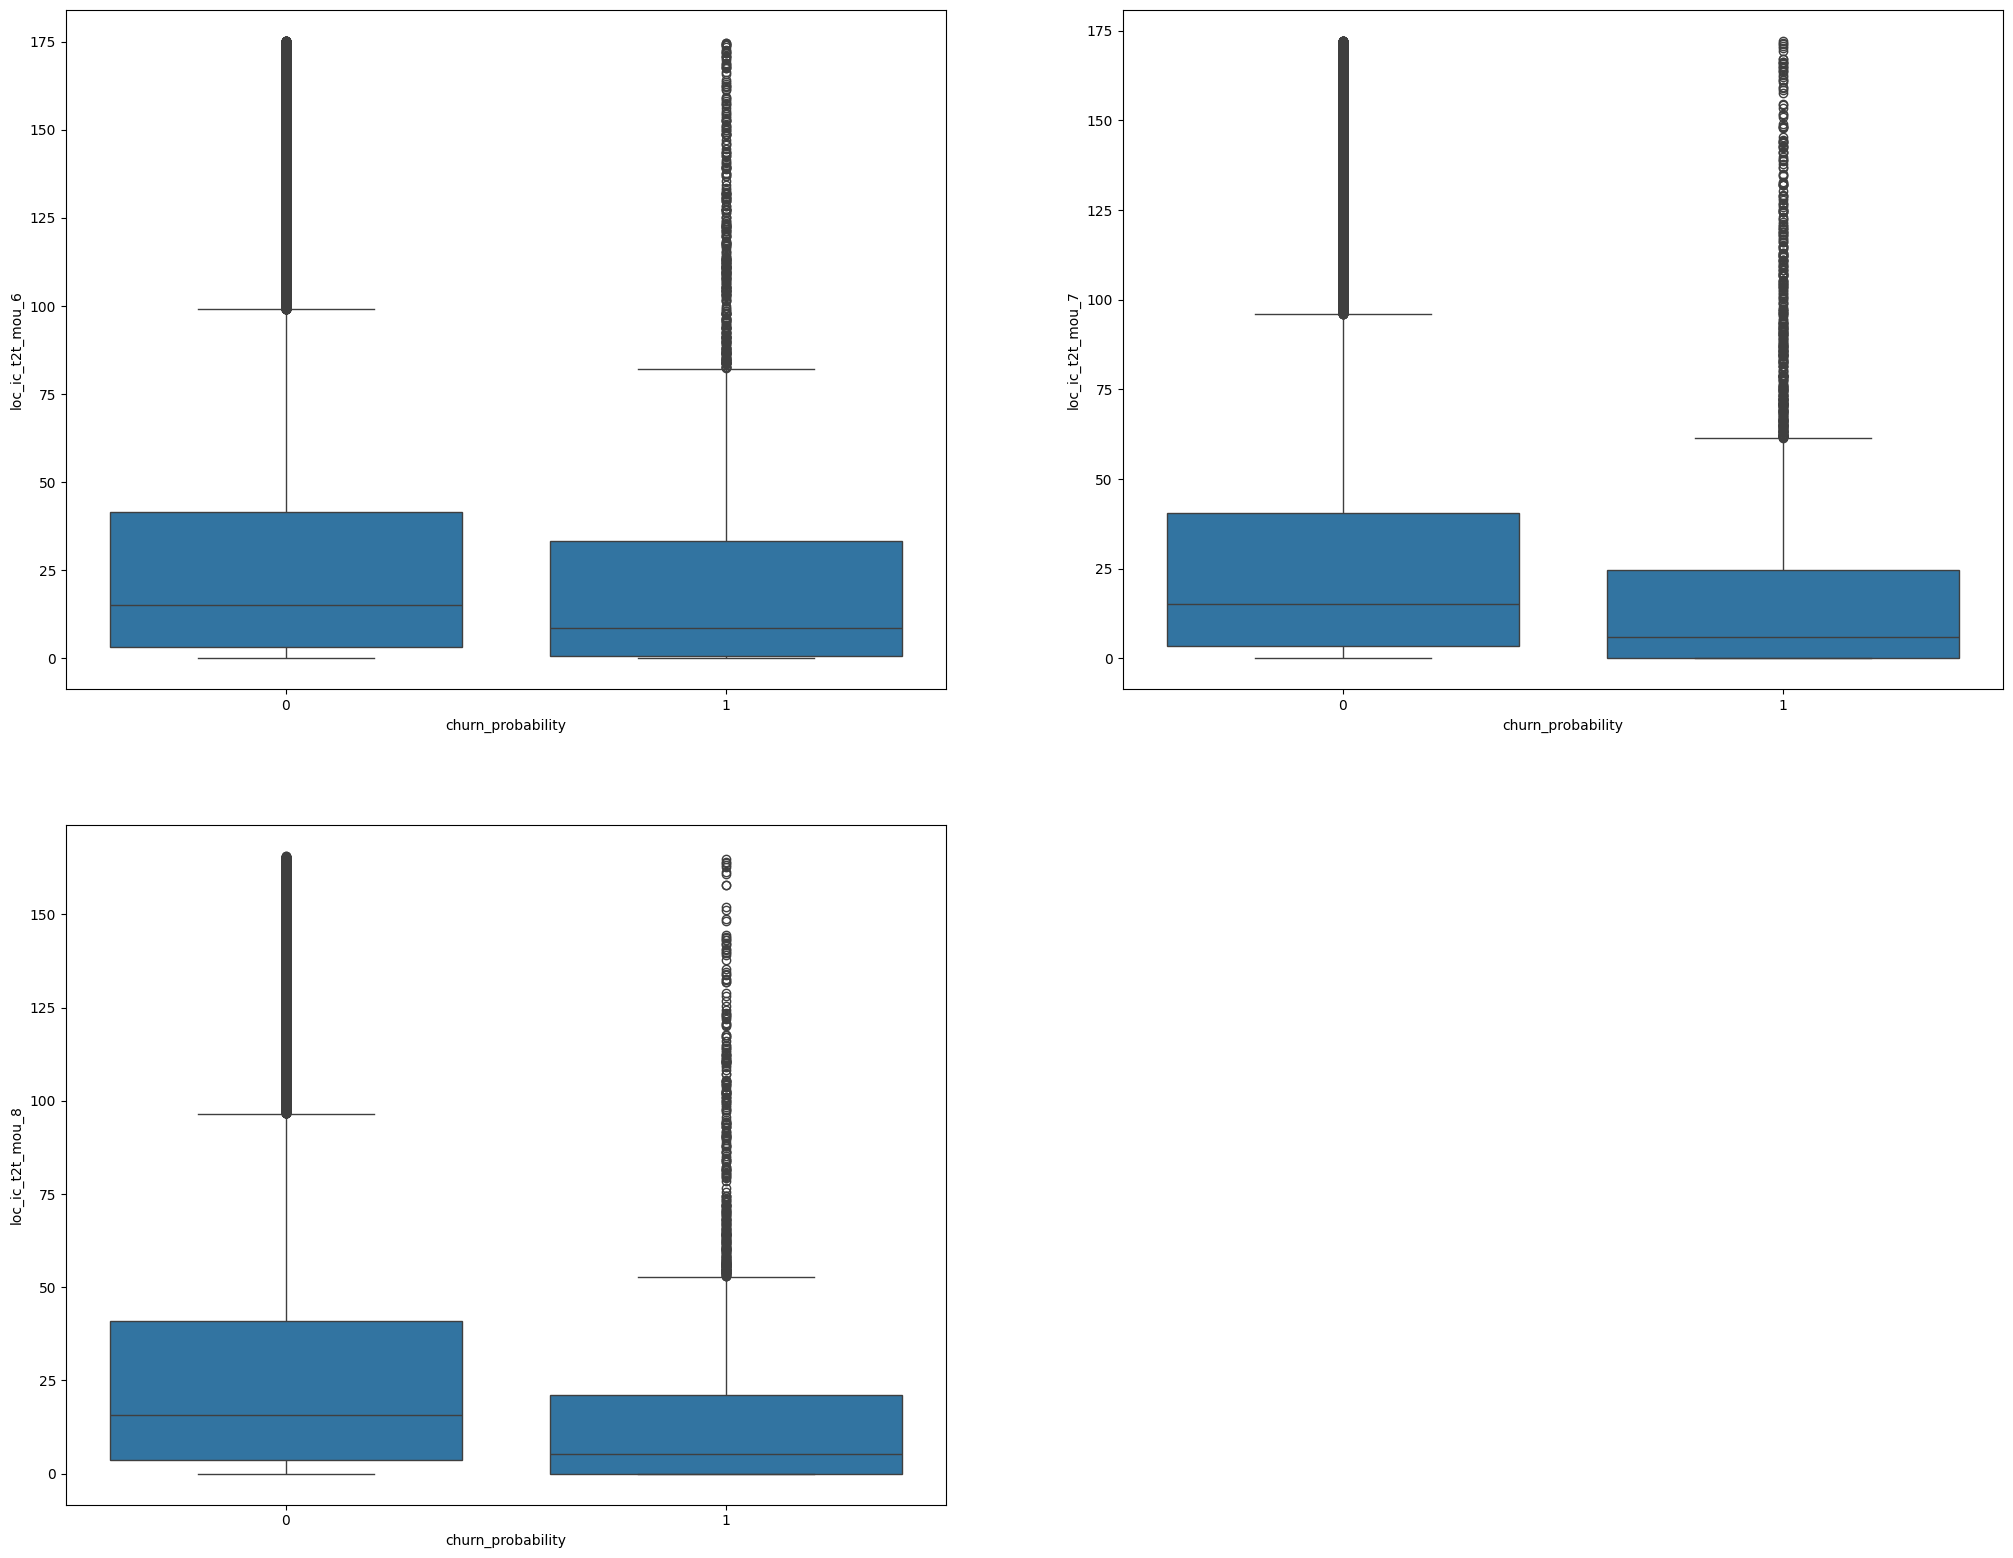

In [44]:
local_ic_t2t=['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8']
boxplot(pre_processed_data,local_ic_t2t)

In [45]:
quantiles(pre_processed_data,col=local_ic_t2t)

      loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8
0.10          0.000000            0.0000            0.0000
0.25          3.305000            3.3400            3.5300
0.35          7.360000            7.2100            7.4300
0.50         16.290000           15.7800           16.0900
0.75         48.043255           46.5350           46.4400
0.90        106.660000          103.9900          101.7640
0.95        175.238000          172.1920          165.6120
0.99        501.732200          480.6146          455.4126


In [46]:
quantiles(pre_processed_data,col=local_ic_t2t,filt=pre_processed_data['churn_probability']==1)

      loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8
0.10            0.0000            0.0000          0.000000
0.25            0.7300            0.0000          0.000000
0.35            3.1400            1.6794          1.008500
0.50            9.3950            6.2890          5.427000
0.75           38.4645           27.1325         22.095000
0.90           66.6480           49.3086         47.256388
0.95          117.8900           87.2450         55.060200
0.99          404.1191          300.5345        146.977500


#### Observation
1. The minutes of usage for incoming calls within the same telecom operator is decreasing month on month
2. The minutes of usage for incoming calls for the churning customers ranges in 22-38 for the upper quartile whereas it is 46-48 overall

#### Analysis of incoming call over other operators

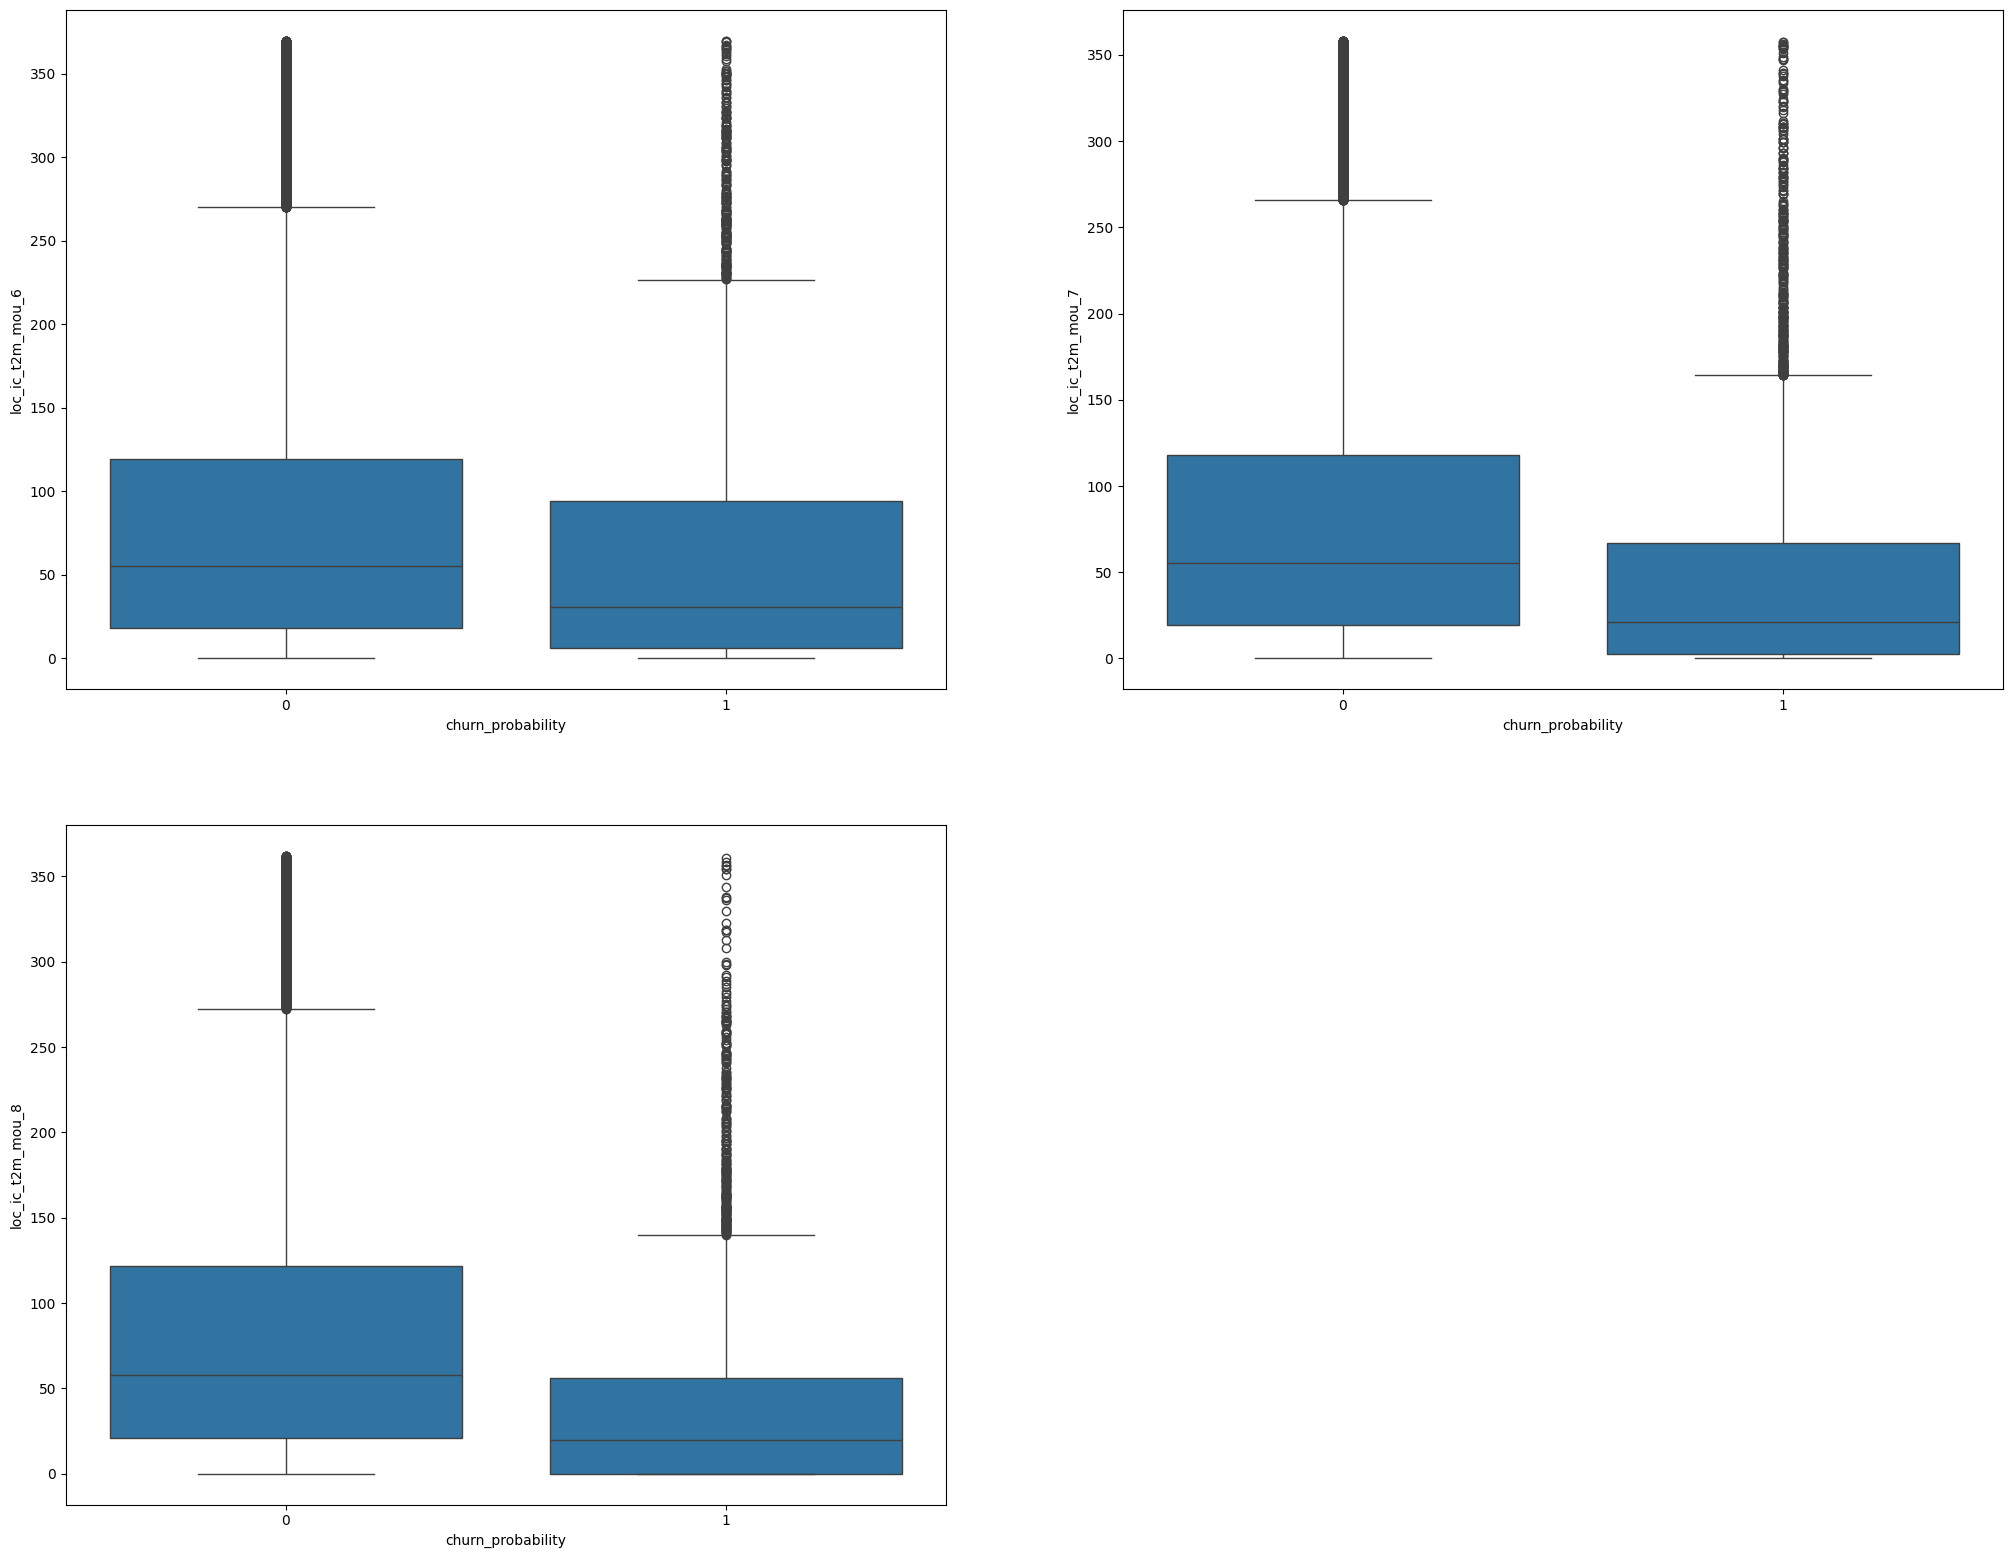

In [47]:
cols=['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8']
boxplot(pre_processed_data,cols)

In [48]:
quantiles(pre_processed_data,cols,filt=pre_processed_data['churn_probability']==1)

      loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8
0.10            0.0000            0.0000          0.000000
0.25            6.4600            2.4790          0.075000
0.35           14.9351            8.7300          6.390000
0.50           32.8000           22.0910         19.865000
0.75          105.9800           71.0750         56.694000
0.90          167.3230          119.0170        108.154731
0.95          262.9110          185.3016        135.751300
0.99          602.1005          437.9877        274.901040


#### Observation
1. The minutes of usage for incoming calls to other mobile telecom operator is decreasing month on month
2. The upper quartile spread is decreasing to 56 minutes from 105 minutes in the month of june 

#### Analysis of incoming call fixed line

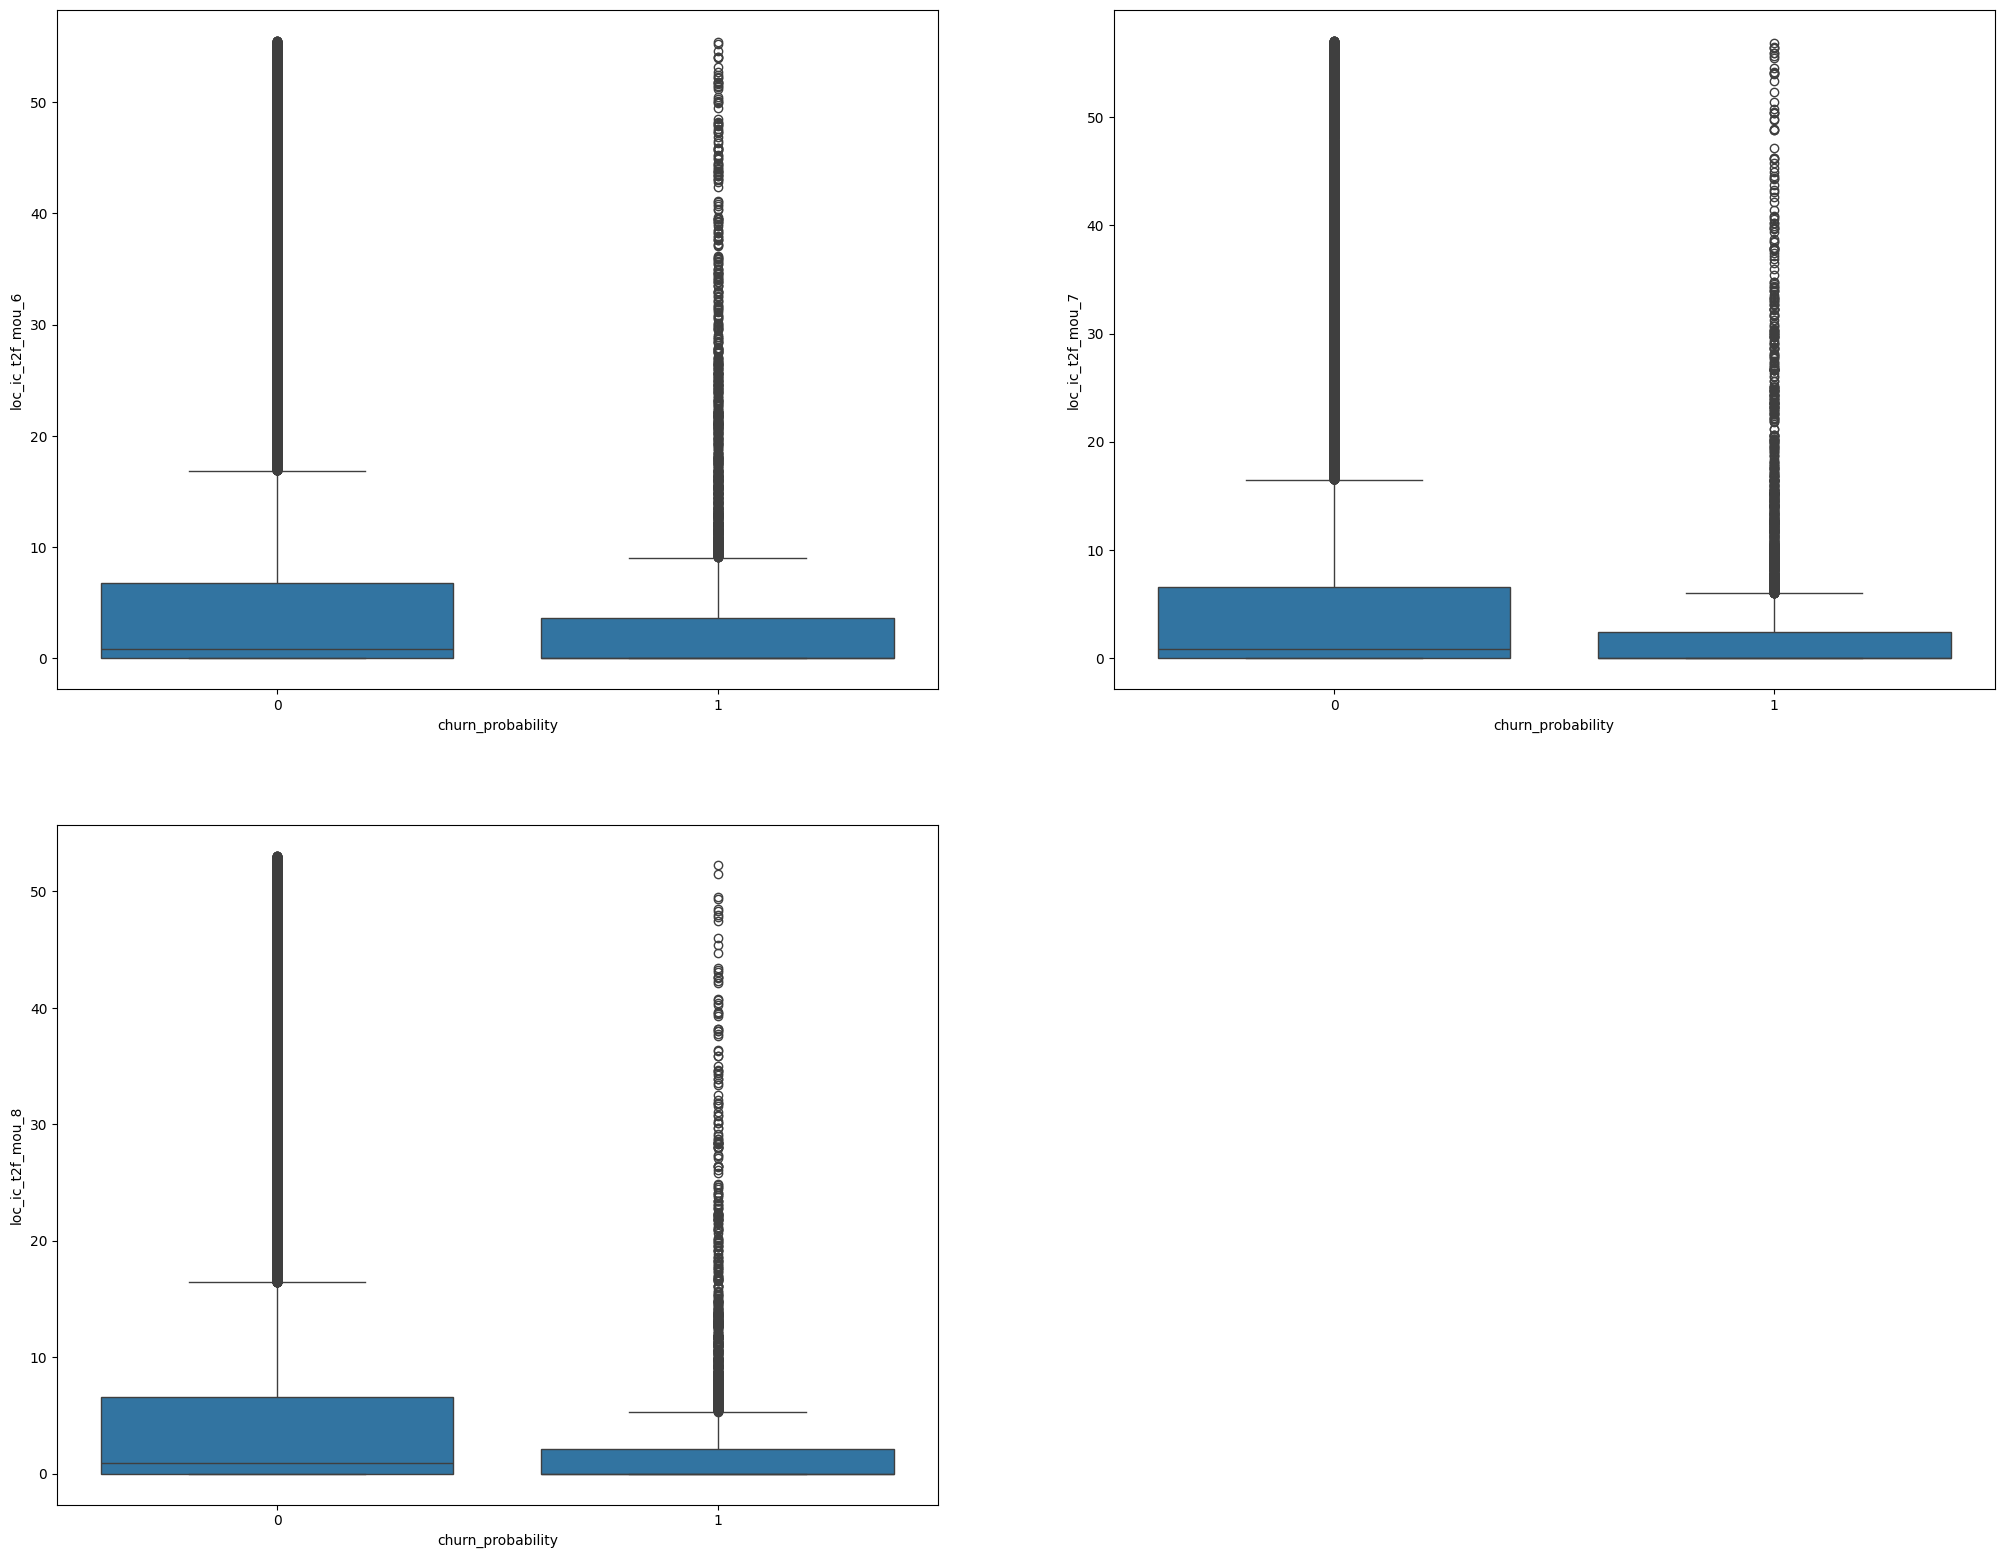

In [49]:
cols=['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8']
boxplot(pre_processed_data,cols)

In [50]:
quantiles(pre_processed_data,cols)

      loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8
0.10             0.000            0.0000            0.0000
0.25             0.000            0.0000            0.0000
0.35             0.000            0.0000            0.0000
0.50             1.010            0.9600            0.9600
0.75             8.630            8.3800            8.1800
0.90            29.514           29.3300           27.1800
0.95            55.531           57.0600           53.0600
0.99           161.860          170.7106          154.0802


In [51]:
quantiles(pre_processed_data,cols,filt=pre_processed_data['churn_probability']==1)

      loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8
0.10          0.000000          0.000000          0.000000
0.25          0.000000          0.000000          0.000000
0.35          0.000000          0.000000          0.000000
0.50          0.000000          0.000000          0.000000
0.75          4.330500          2.780000          2.220500
0.90         12.050672         12.563665         11.716763
0.95         25.299000         17.688500         11.716763
0.99         91.477400         79.185500         38.016000


#### Observation
1. The minutes of usage for fixed line operator is decreasing month on month
2. It declines to 2 minutes in the upper quartile compared to that of 8 minues for a non churning customer

#### Analysis of Roaming calls

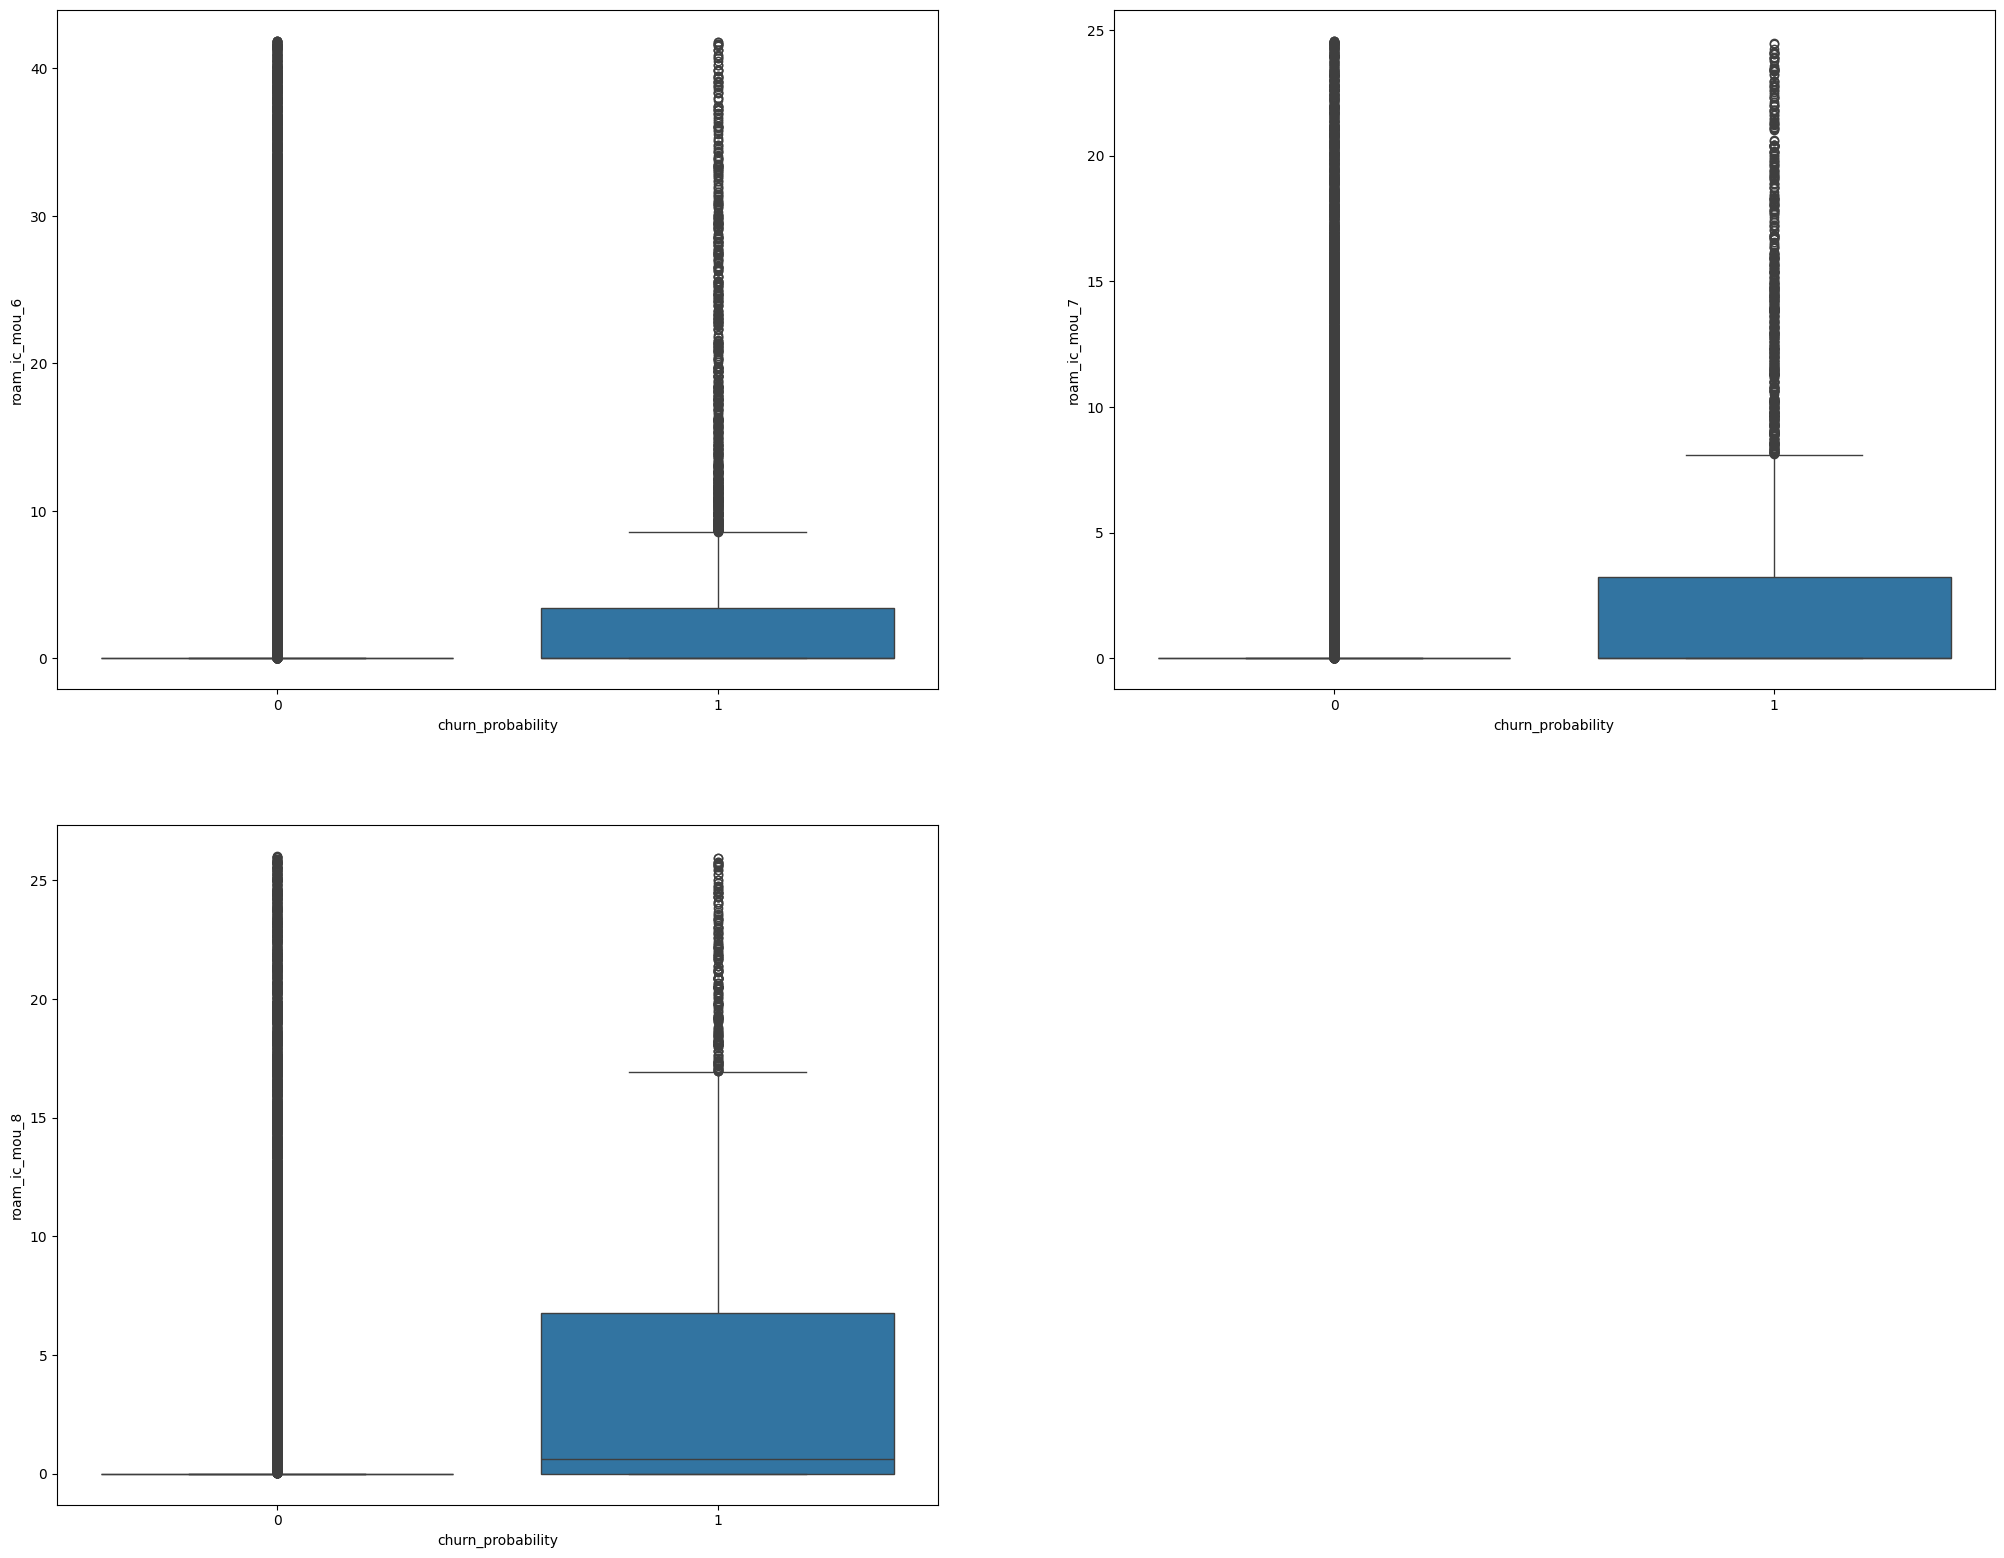

In [52]:
cols=['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']
boxplot(pre_processed_data,cols)

In [53]:
quantiles(pre_processed_data,cols)

      roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8
0.10          0.000       0.000000       0.000000
0.25          0.000       0.000000       0.000000
0.35          0.000       0.000000       0.000000
0.50          0.000       0.000000       0.000000
0.75          0.000       0.000000       0.000000
0.90         12.790       7.014568       7.004892
0.95         41.881      24.590000      26.031000
0.99        216.640     150.930200     151.148400


In [54]:
quantiles(pre_processed_data,cols,pre_processed_data['churn_probability']==1)

      roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8
0.10         0.0000       0.000000         0.0000
0.25         0.0000       0.000000         0.0000
0.35         0.0000       0.000000         0.0000
0.50         0.0000       0.000000         1.2300
0.75         7.5605       7.014568         7.6100
0.90        24.8240      25.157400        32.5760
0.95        69.1060      66.830500        76.2695
0.99       337.0579     308.721800       287.1538


#### Observation
1.The incoming roaming usage of customers who are about to churn are increasing in each phase 

2.The 75th percentile to 95th percentile churning customers show an increase in roaming usage. This could be a primary reason for churn as such.

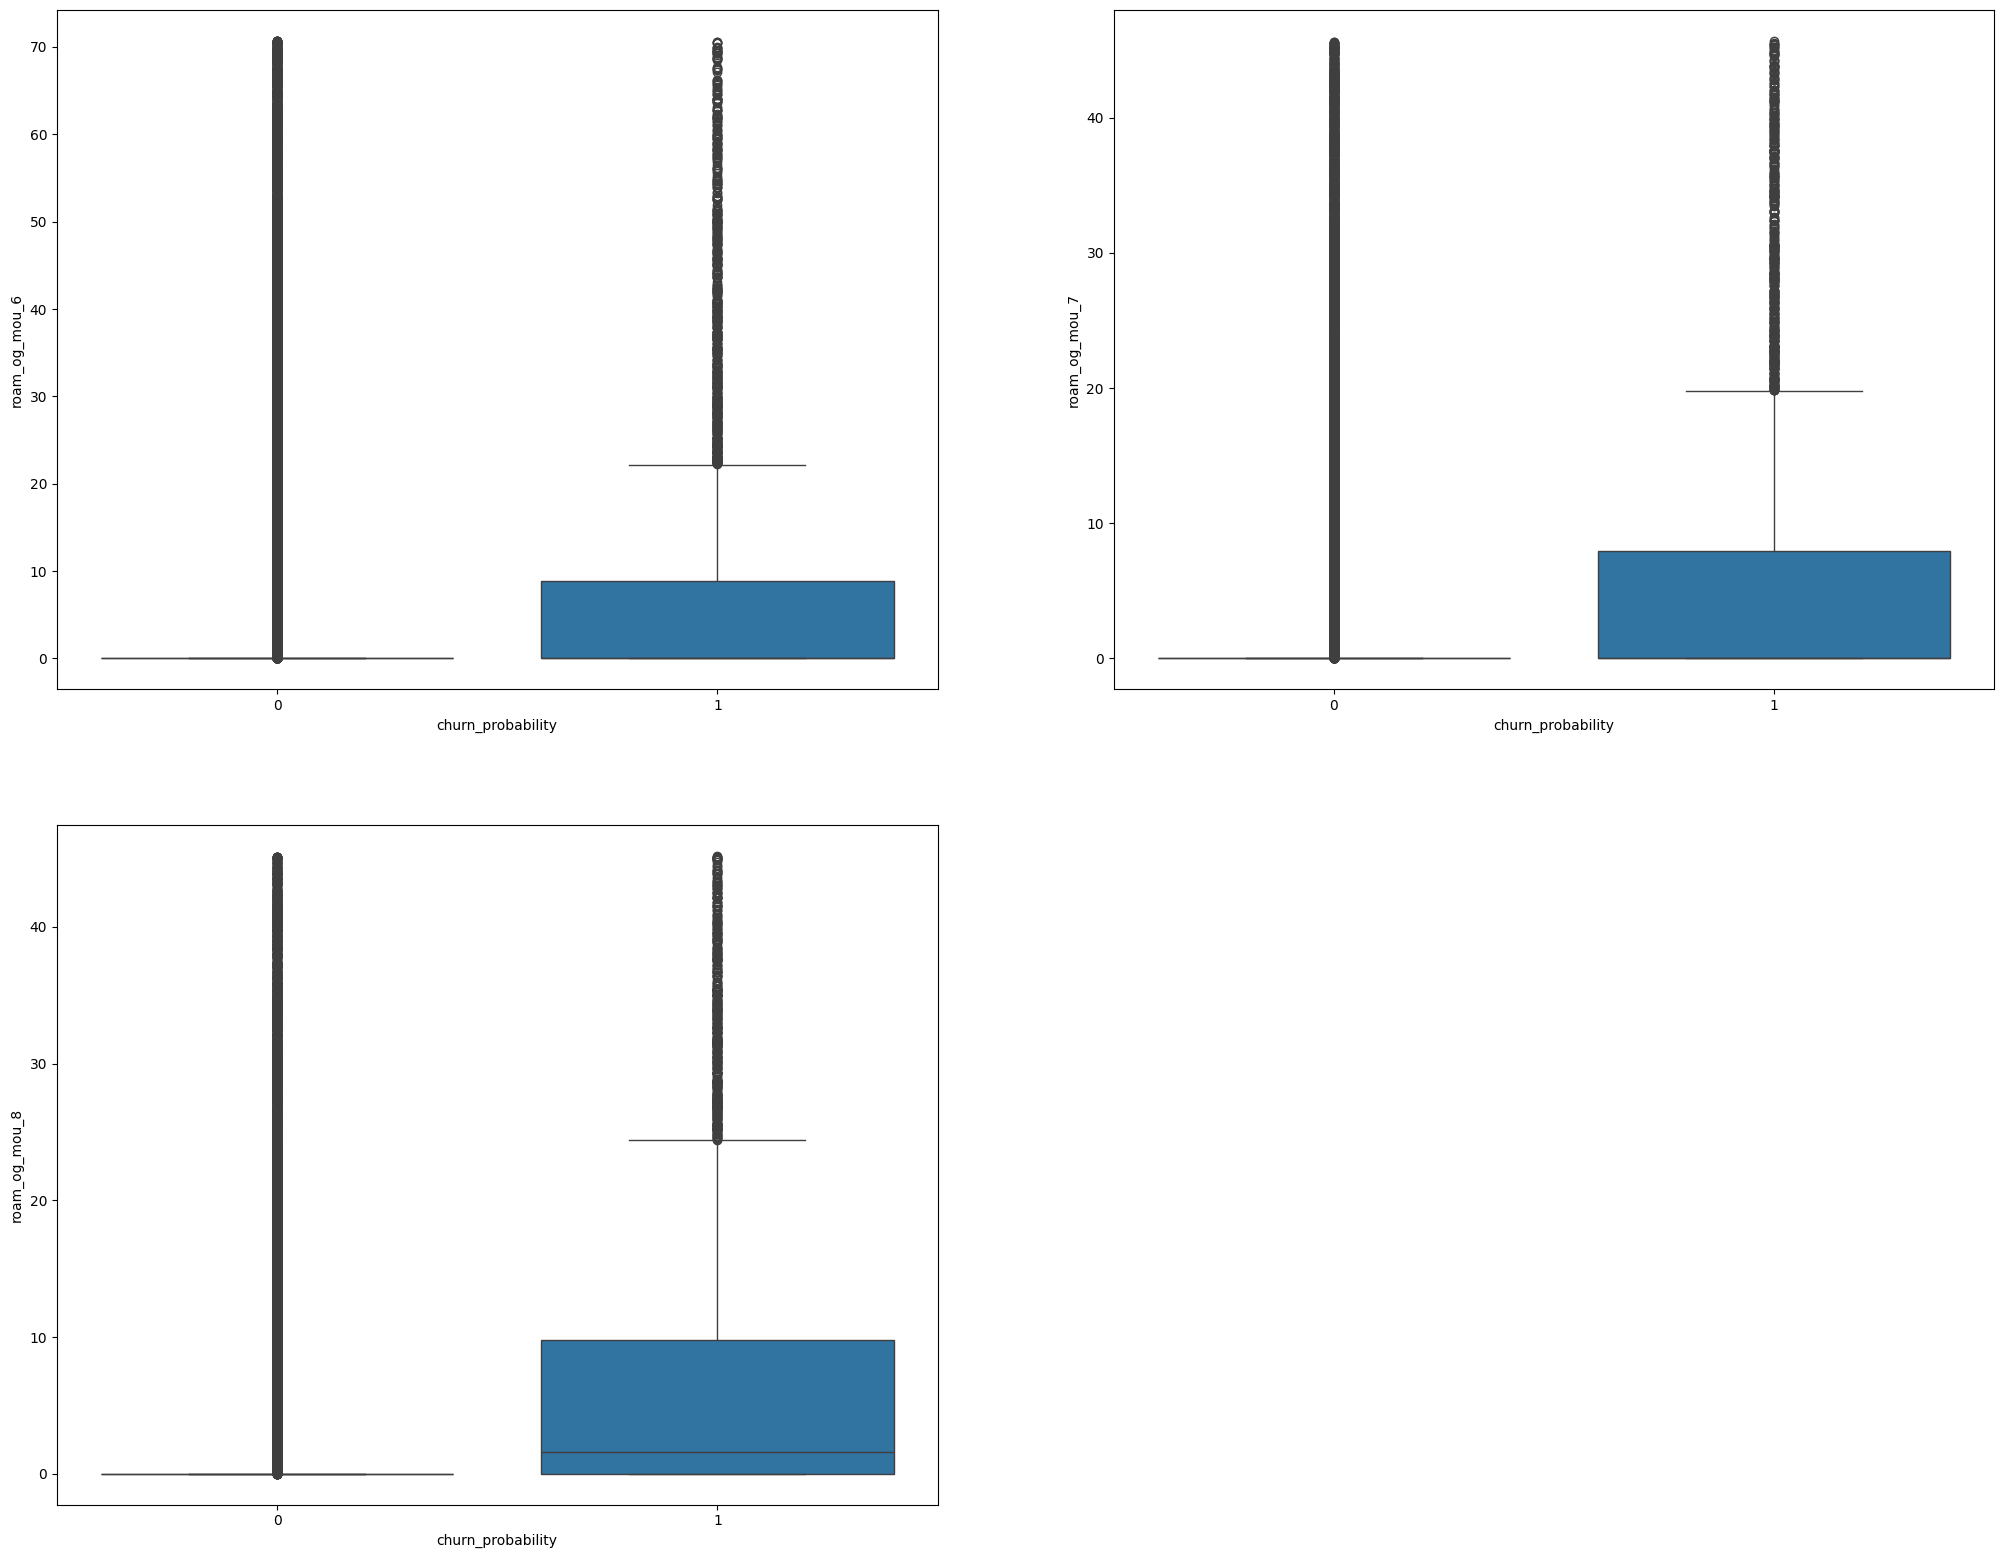

In [55]:
cols=['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']
boxplot(pre_processed_data,cols)

In [56]:
quantiles(pre_processed_data,cols)

      roam_og_mou_6  roam_og_mou_7  roam_og_mou_8
0.10         0.0000         0.0000         0.0000
0.25         0.0000         0.0000         0.0000
0.35         0.0000         0.0000         0.0000
0.50         0.0000         0.0000         0.0000
0.75         0.0000         0.0000         0.0000
0.90        24.9400        12.3600        12.4300
0.95        70.7400        45.7400        45.1850
0.99       285.3866       216.5918       208.4414


In [57]:
quantiles(pre_processed_data,cols,pre_processed_data['churn_probability']==1)

      roam_og_mou_6  roam_og_mou_7  roam_og_mou_8
0.10       0.000000       0.000000         0.0000
0.25       0.000000       0.000000         0.0000
0.35       0.000000       0.000000         0.2260
0.50       0.000000       0.000000         3.4950
0.75      14.186457       9.842191        18.1515
0.90      54.880000      53.687000        61.5760
0.95     132.704000     111.288500       121.5778
0.99     435.714600     372.905300       344.4781


#### Observation
1. The overall usage shows a decline in the roaming.
2. The roaming incoming usage of customers who are about 
to churn are increasing particularly in action phase to churn phase
3. The outliers however shows a decline even for the churn customers

#### Analysis of STD calls 

In [58]:
cols=[i for i in pre_processed_data if re.search('std_og_t2t',i)]

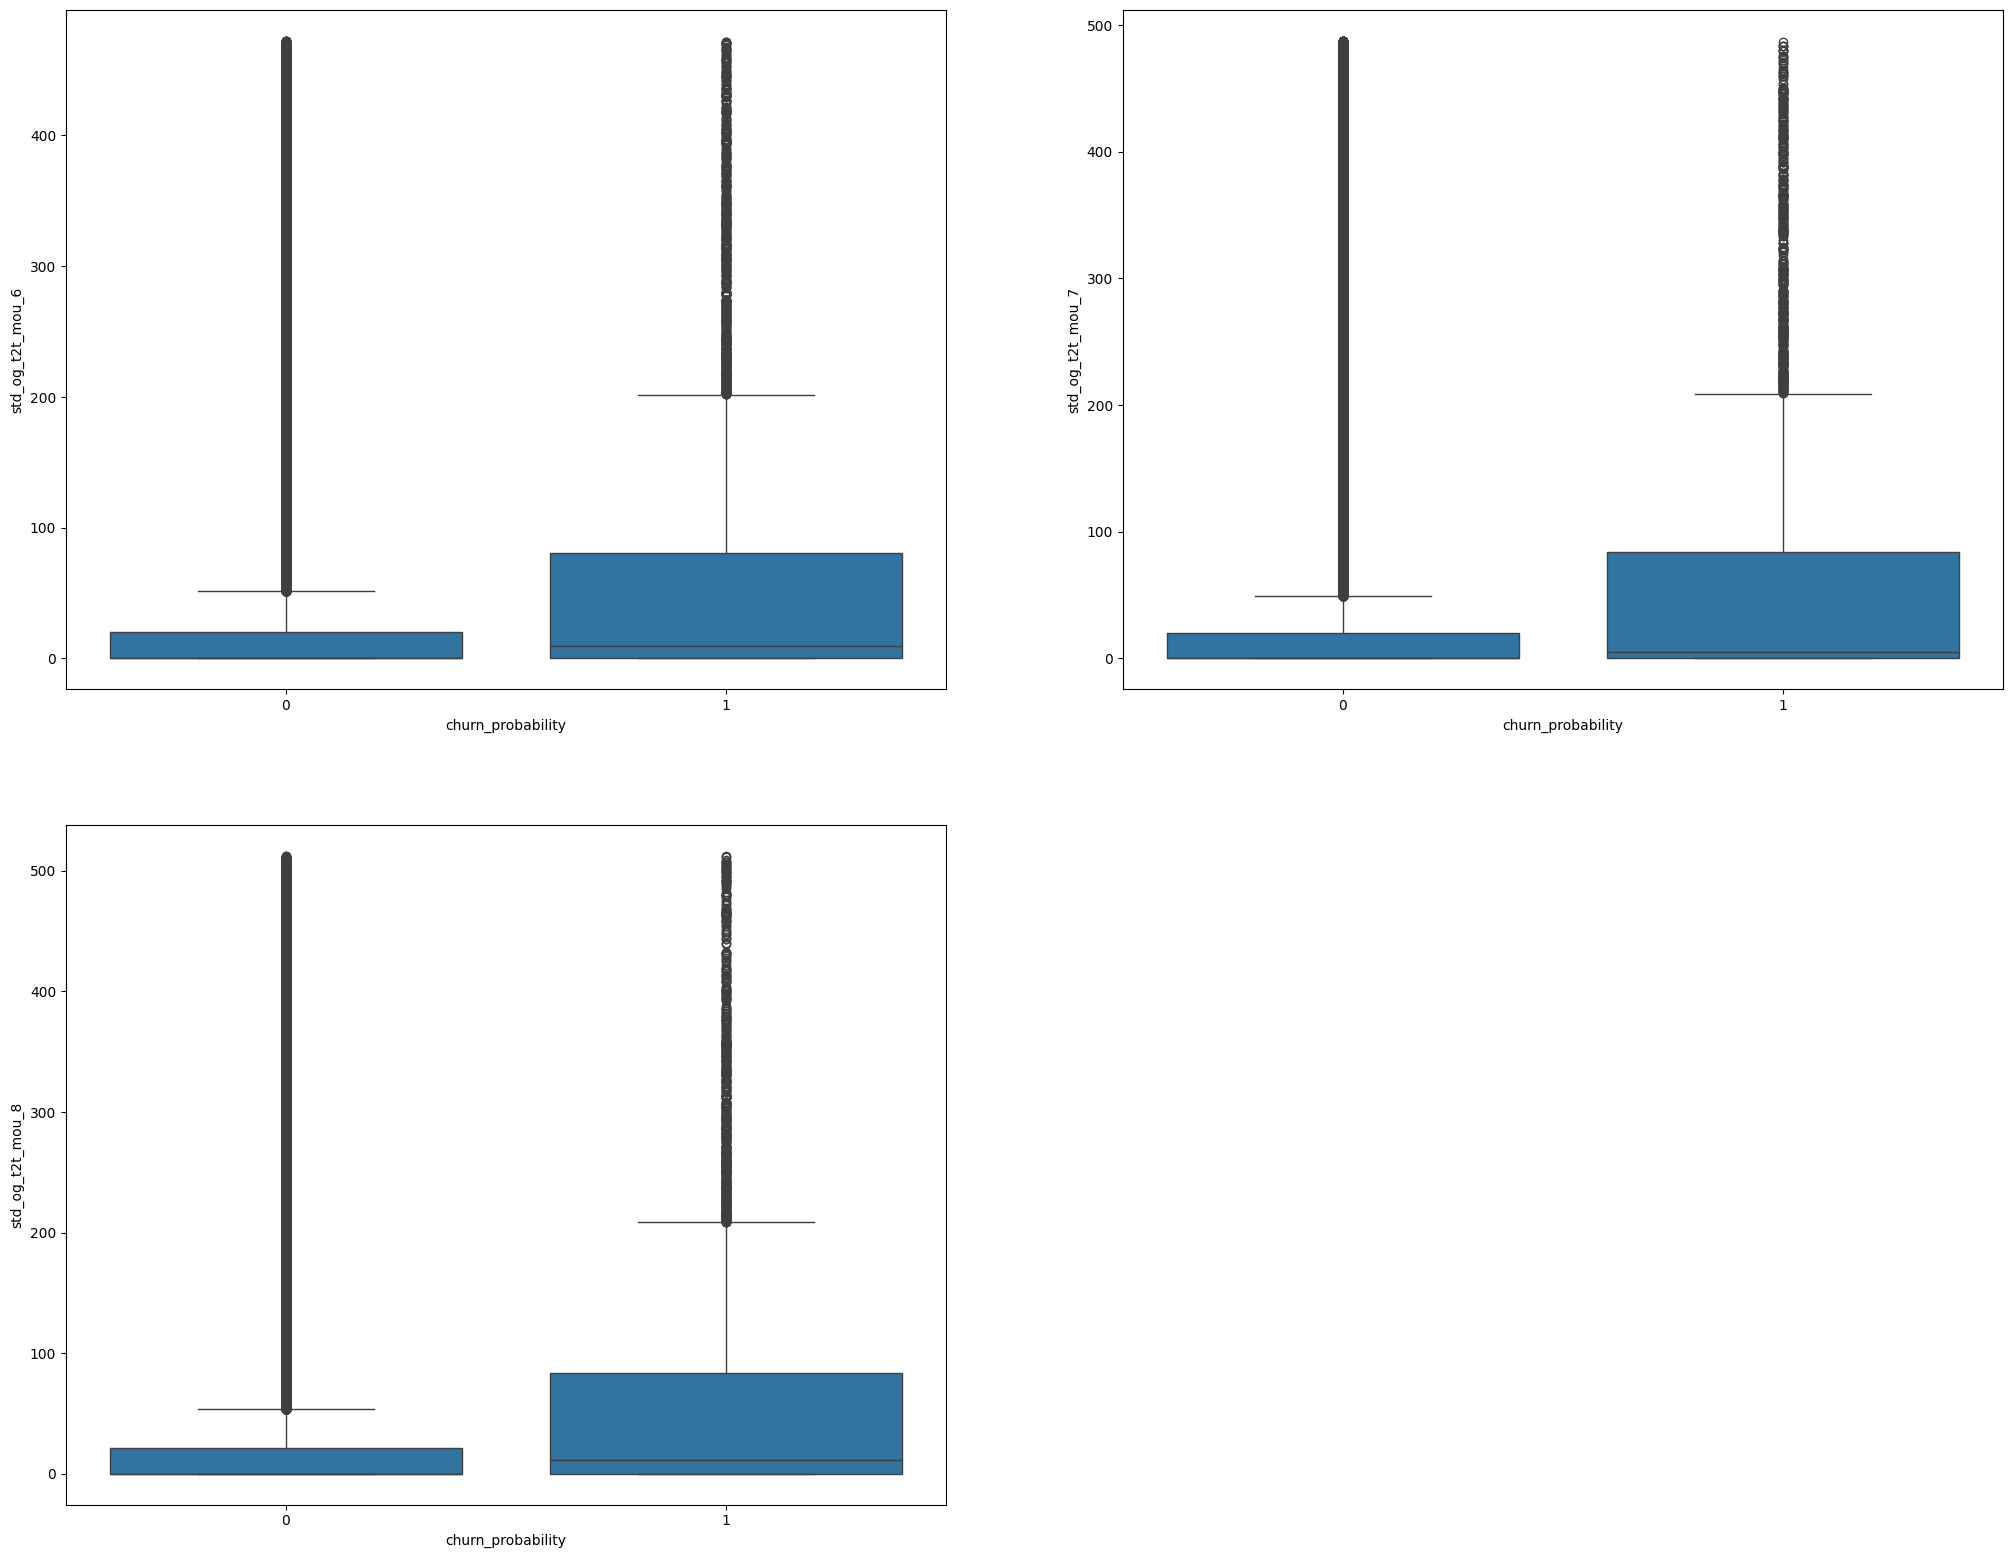

In [59]:
boxplot(pre_processed_data,cols)

In [60]:
quantiles(pre_processed_data,cols)

      std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8
0.10            0.0000            0.0000            0.0000
0.25            0.0000            0.0000            0.0000
0.35            0.0000            0.0000            0.0000
0.50            0.0000            0.0000            0.0000
0.75           41.7300           38.7300           45.7100
0.90          228.6160          225.4140          245.1956
0.95          472.4900          487.7120          512.2320
0.99         1233.7244         1264.3686         1277.1550


In [61]:
quantiles(pre_processed_data,cols,pre_processed_data['churn_probability']==1)

      std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8
0.10            0.0000          0.000000           0.00000
0.25            0.0000          0.000000           0.00000
0.35            0.0000          0.000000           0.00000
0.50           18.1800          9.304000          18.94200
0.75          109.3100         83.775851          94.61150
0.90          410.7290        297.067000         314.13260
0.95          736.7180        550.981000         574.70230
0.99         1603.1995       1486.504300        1220.09572


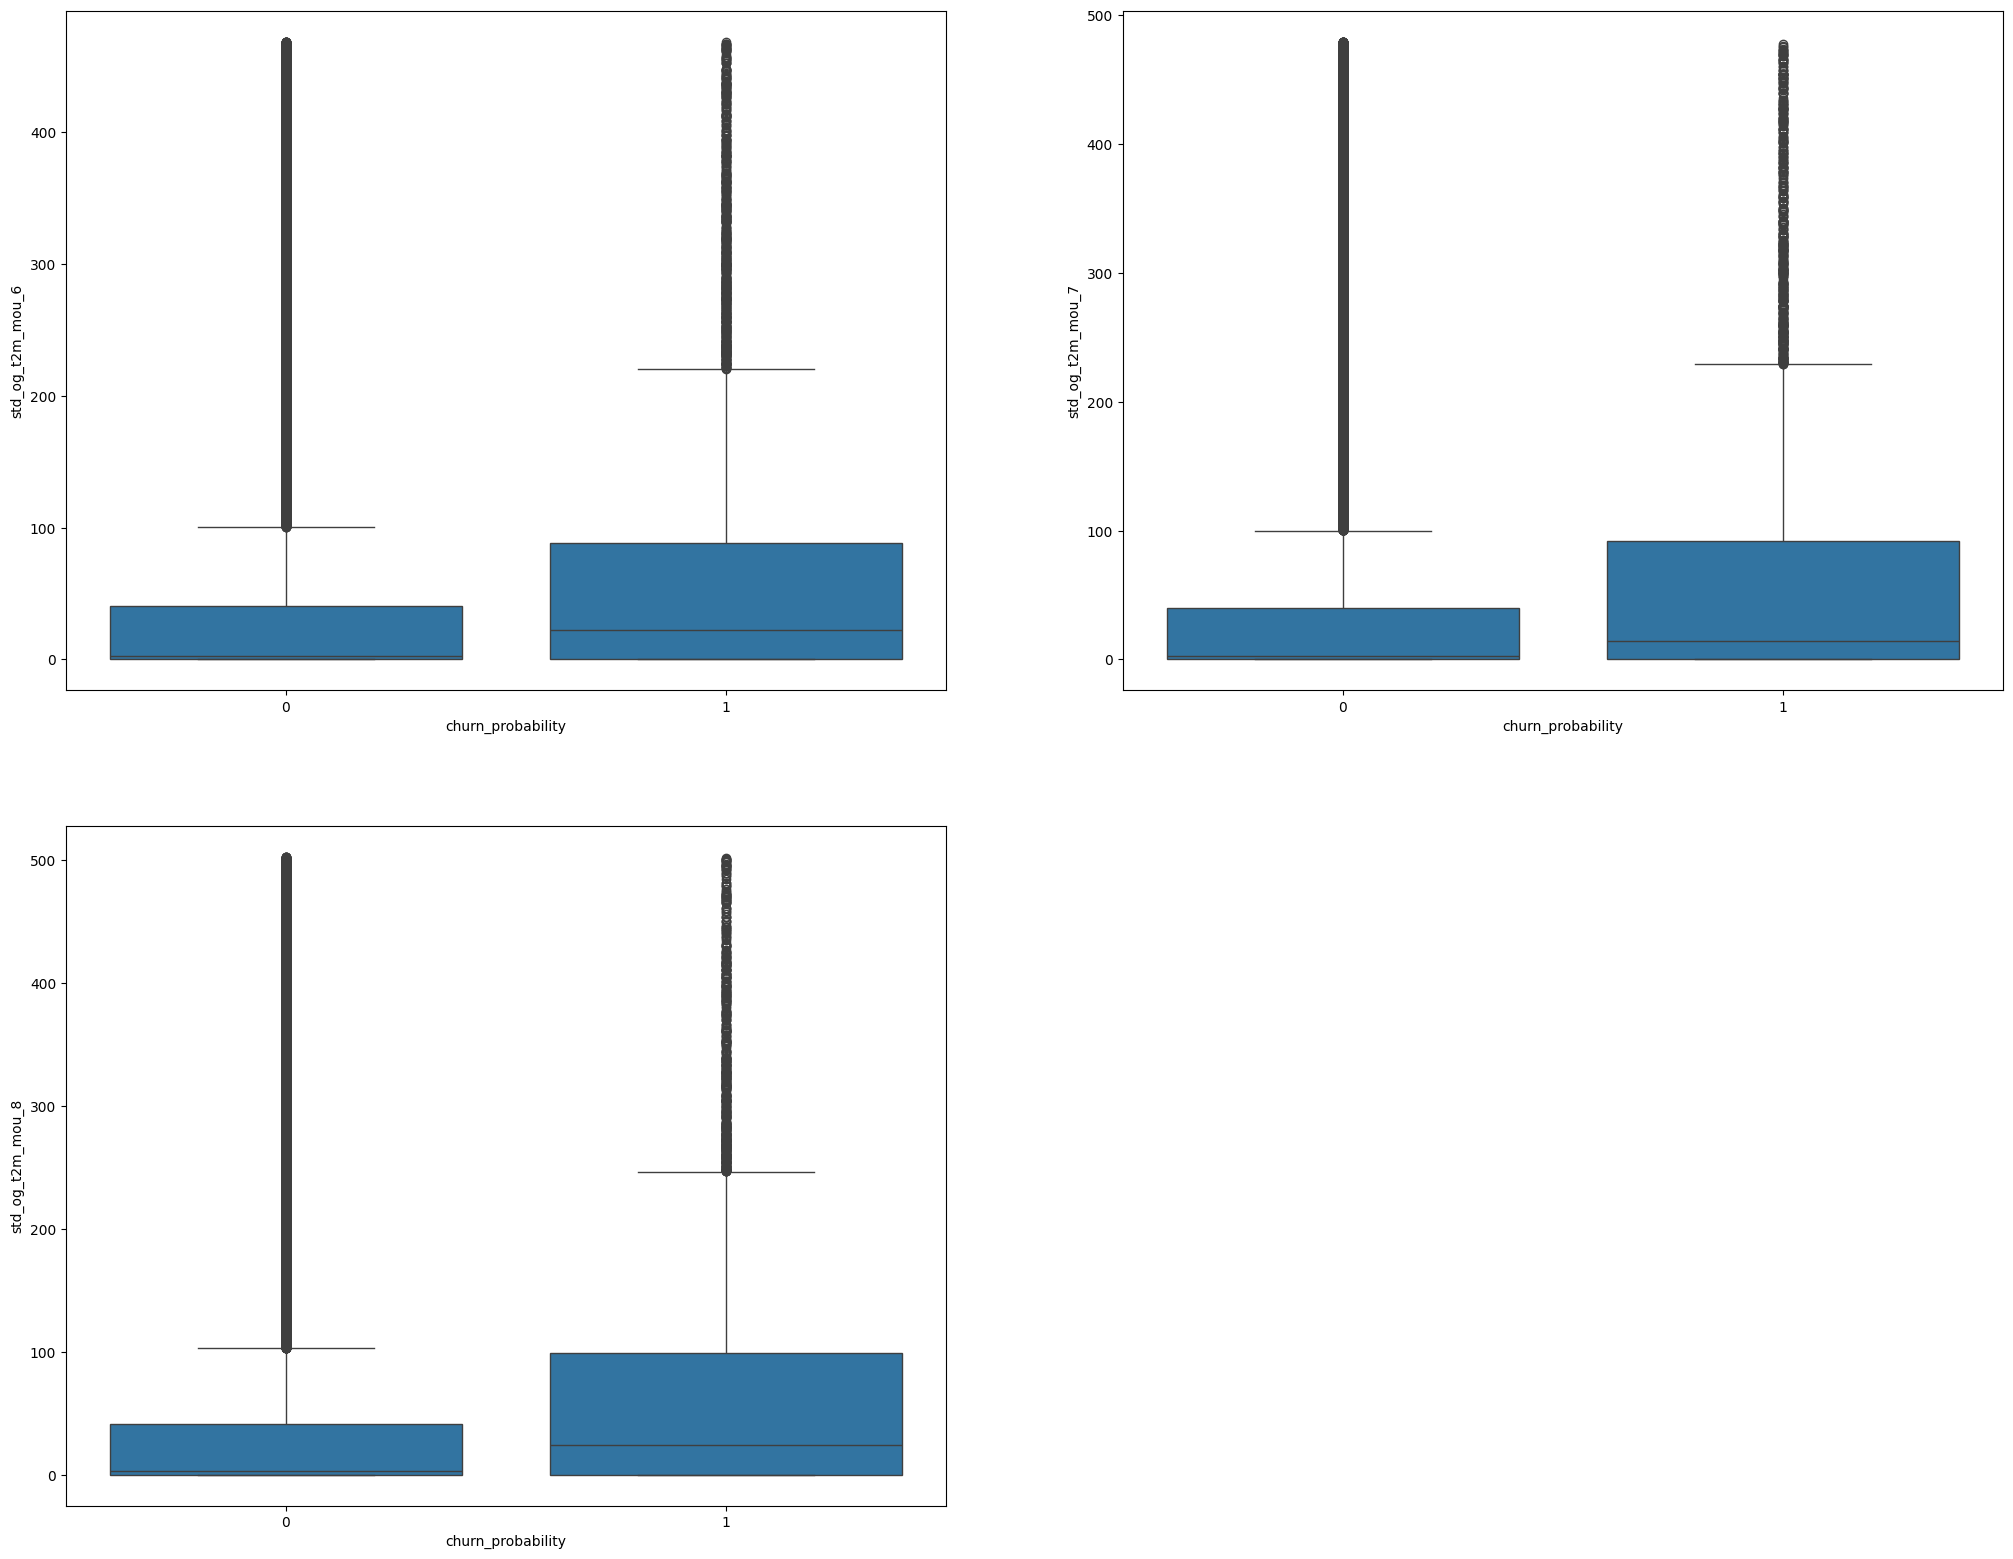

      std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8
0.10             0.000             0.000            0.0000
0.25             0.000             0.000            0.0000
0.35             0.000             0.000            0.0000
0.50             5.230             4.700            5.0800
0.75            64.710            62.780           70.3400
0.90           245.686           246.924          265.5460
0.95           468.722           479.265          502.7410
0.99          1247.461          1253.867         1225.6508
      std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8
0.10            0.0000          0.000000            0.0000
0.25            0.0000          0.000000            0.0000
0.35            4.7270          1.210000            0.2800
0.50           33.9600         19.380000           32.9850
0.75          121.3600         91.538615          127.2395
0.90          397.7280        287.705000          315.5494
0.95          730.2925        549.214000          534.92

In [62]:
cols=[i for i in pre_processed_data if re.search('std_og_t2m',i)]
boxplot(pre_processed_data,cols)
quantiles(pre_processed_data,cols)
quantiles(pre_processed_data,cols,pre_processed_data['churn_probability']==1)

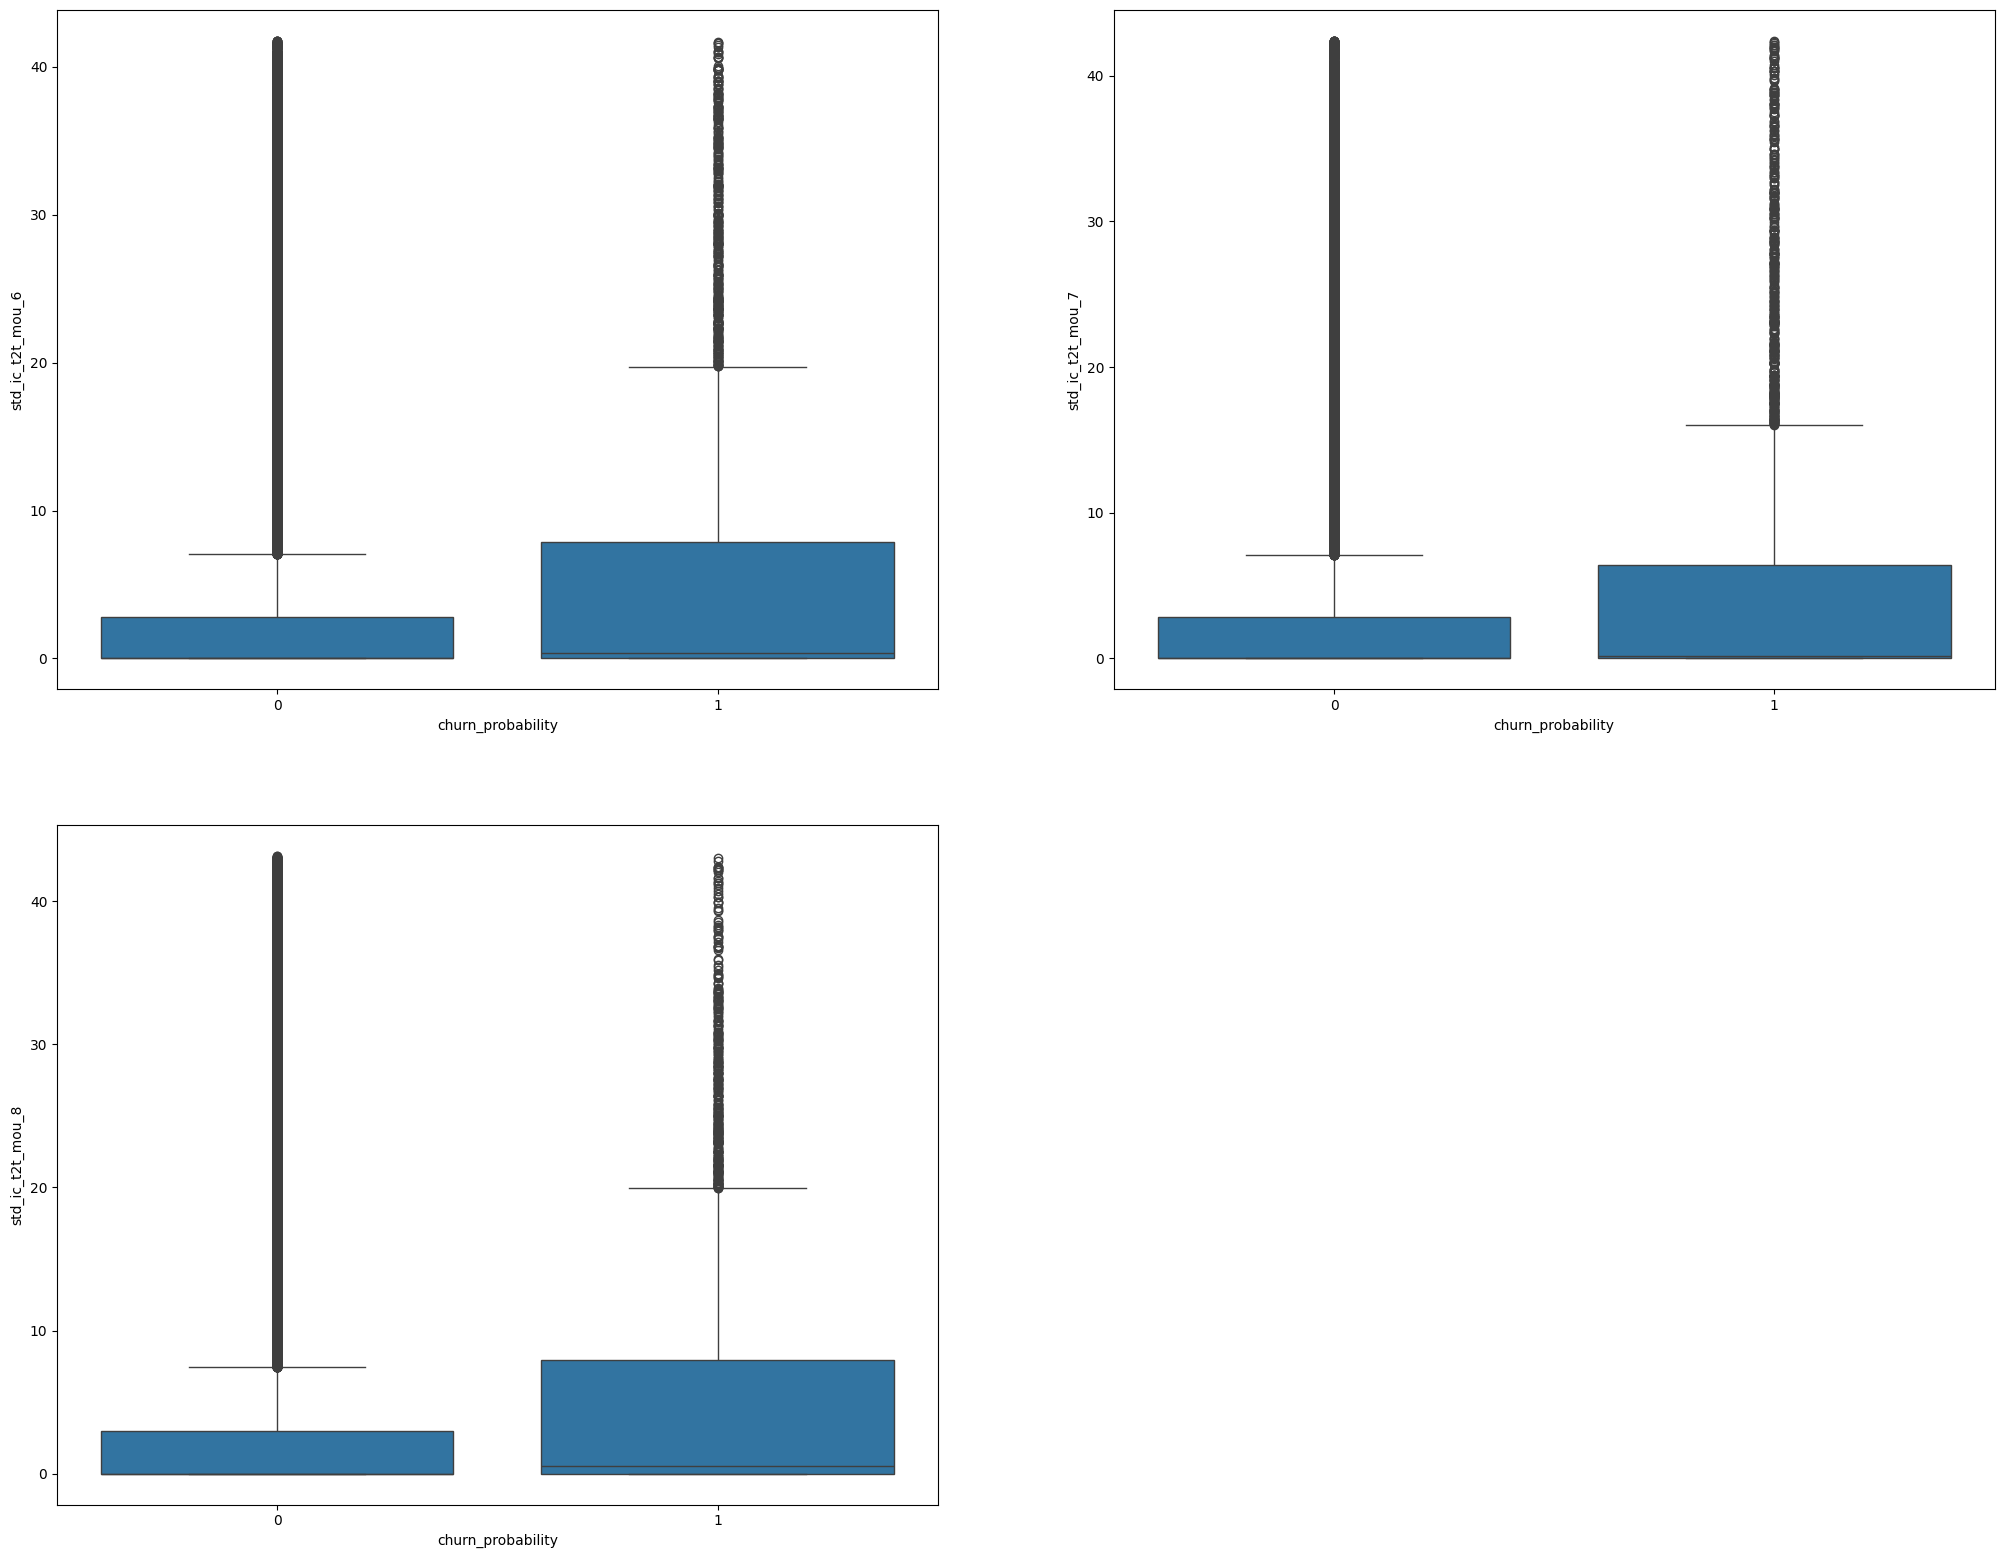

      std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8
0.10            0.0000              0.00           0.00000
0.25            0.0000              0.00           0.00000
0.35            0.0000              0.00           0.00000
0.50            0.0000              0.00           0.00000
0.75            4.7900              4.73           5.18000
0.90           20.3600             20.54          21.01000
0.95           41.7606             42.43          43.14200
0.99          148.5336            147.48         148.69236
      std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8
0.10          0.000000            0.0000          0.000000
0.25          0.000000            0.0000          0.000000
0.35          0.000000            0.0000          0.000000
0.50          0.730000            0.3880          0.939000
0.75          9.476958            9.0285          9.910217
0.90         23.908000           19.0780         19.909200
0.95         47.468500           41.3850         40.3790

In [63]:
cols=[i for i in pre_processed_data if re.search('std_ic_t2t',i)]
boxplot(pre_processed_data,cols)
quantiles(pre_processed_data,cols)
quantiles(pre_processed_data,cols,pre_processed_data['churn_probability']==1)

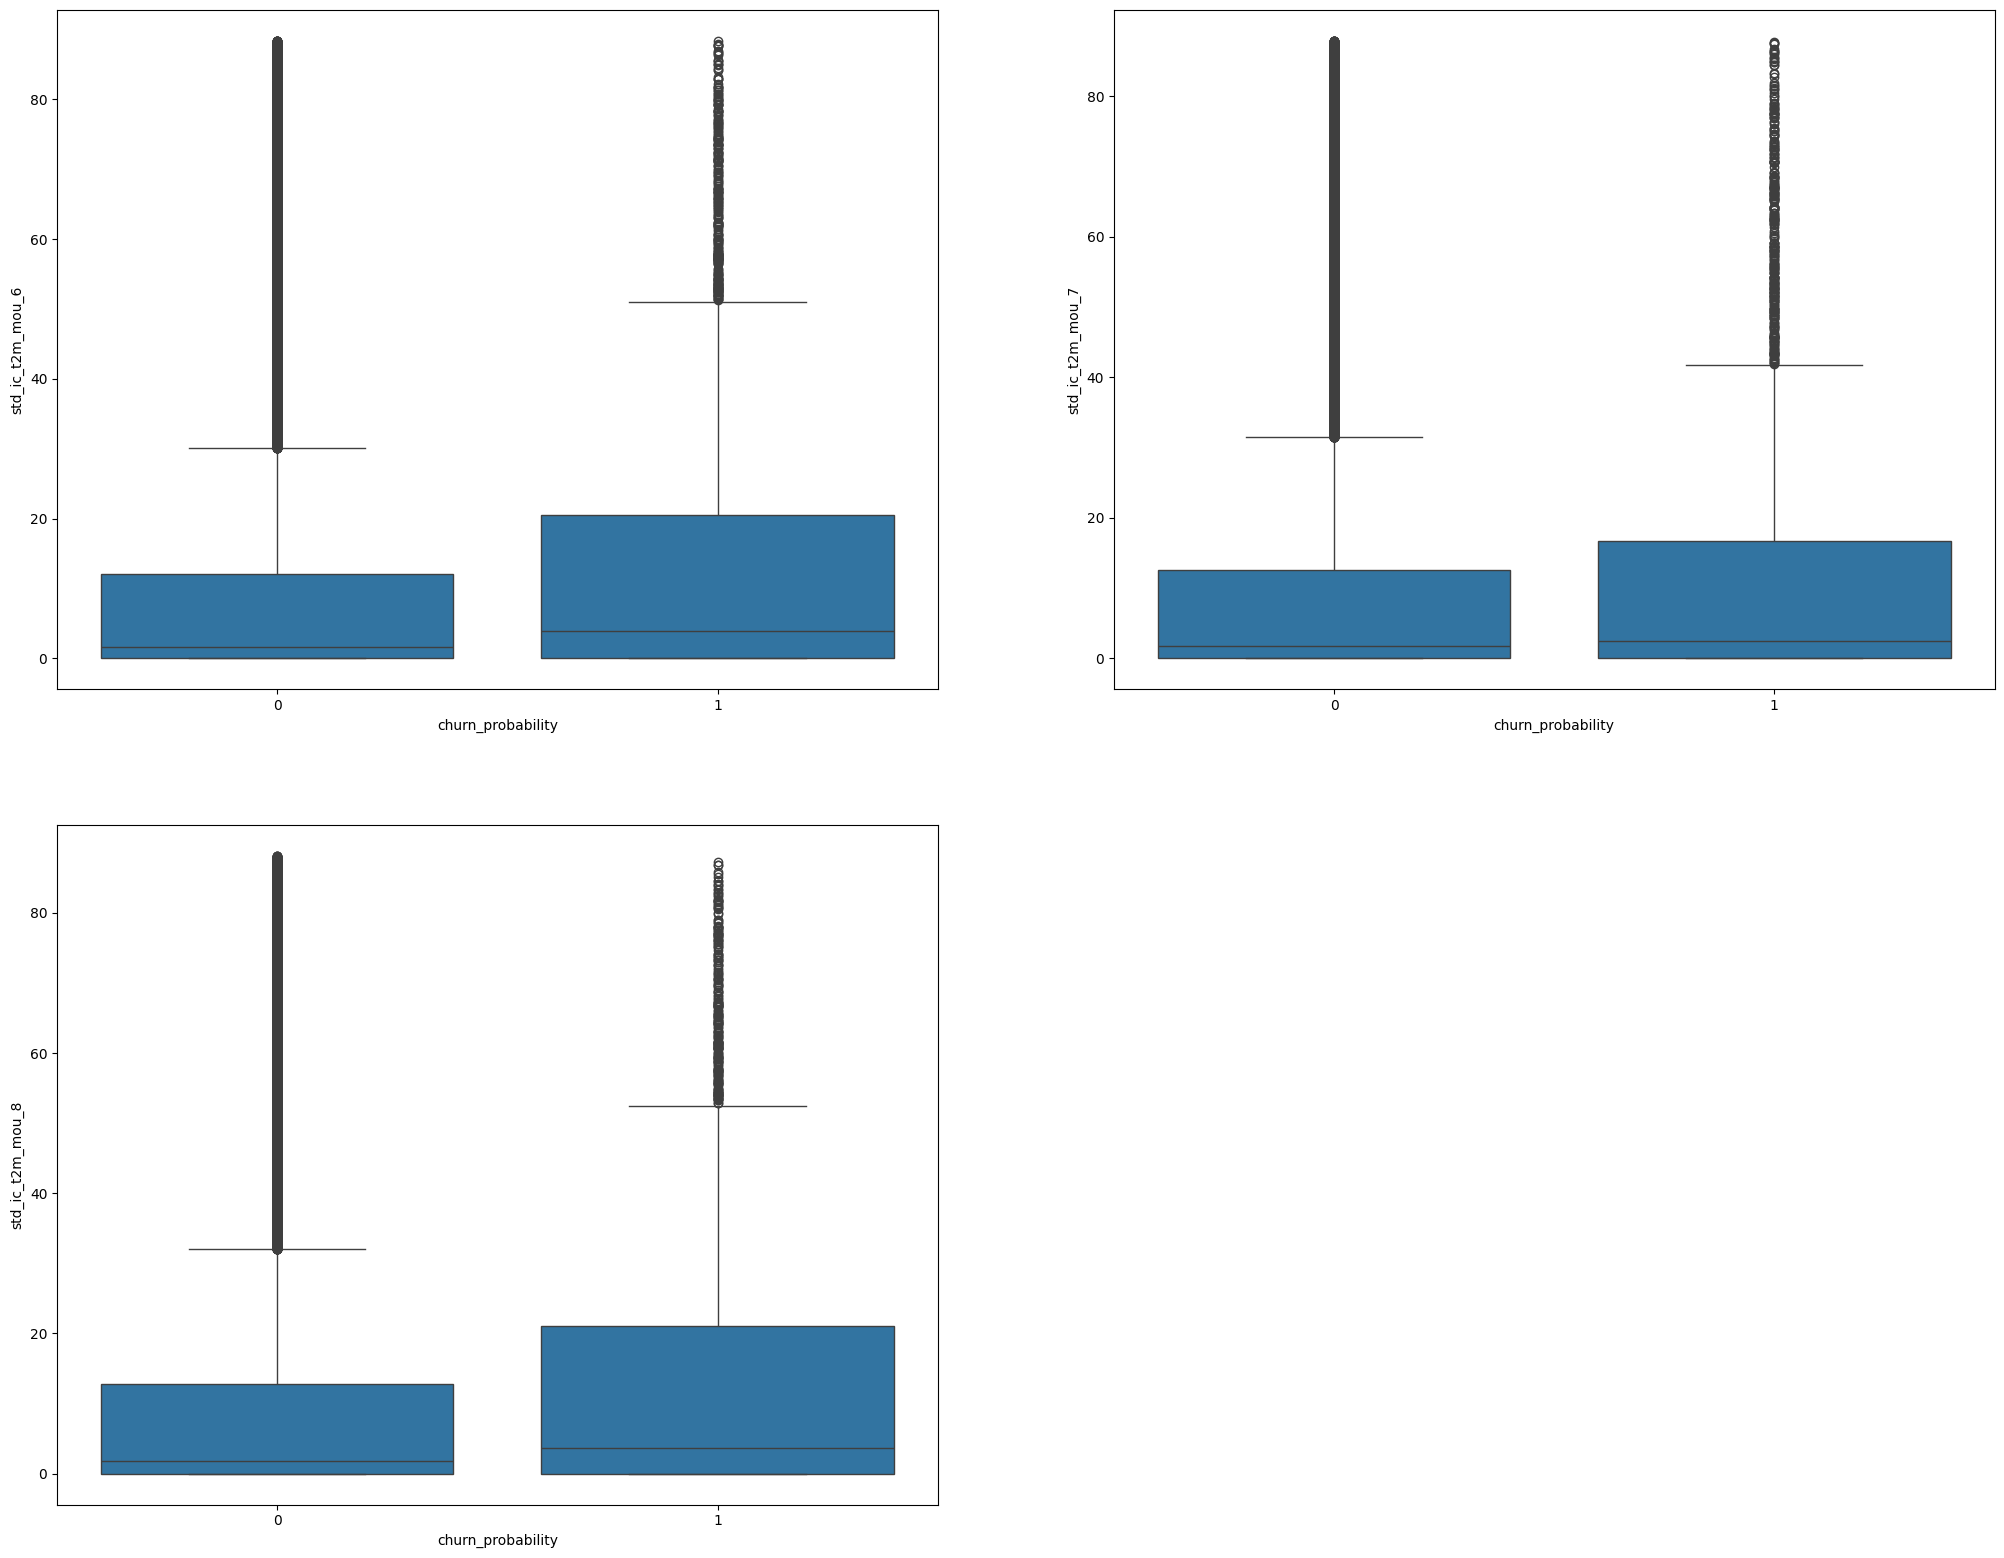

      std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8
0.10            0.0000             0.000             0.000
0.25            0.0000             0.000             0.000
0.35            0.0500             0.030             0.110
0.50            2.4800             2.380             2.590
0.75           16.3400            16.590            17.380
0.90           47.8900            48.332            49.010
0.95           88.3600            87.863            88.110
0.99          290.4426           274.720           274.147
      std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8
0.10          0.000000            0.0000          0.000000
0.25          0.000000            0.0000          0.000000
0.35          0.748500            0.0300          0.000000
0.50          4.920000            3.1370          4.270000
0.75         20.734858           19.8975         21.089042
0.90         47.603000           35.3300         40.525800
0.95         92.185000           68.2340         64.2942

In [64]:
cols=[i for i in pre_processed_data if re.search('std_ic_t2m',i)]
boxplot(pre_processed_data,cols)
quantiles(pre_processed_data,cols)
quantiles(pre_processed_data,cols,pre_processed_data['churn_probability']==1)

In [65]:
cols=[i for i in pre_processed_data if re.search('std_og|std_ic',i)]

In [66]:
zero_value_columns=(100*pre_processed_data[cols][pre_processed_data[cols]==0].count())/pre_processed_data.shape[0]

In [67]:
zero_value_indexes=zero_value_columns[zero_value_columns.values > 70 ].index

In [68]:
pre_processed_data.drop(columns=zero_value_indexes,inplace=True)

In [69]:
pre_processed_data.shape

(69999, 125)

#### Observation
1. The std calls shows comparitively higher minutes of usage both in incoming calls and outgoing calls, compared to the local ones in the outgoing calls
2. The std calls usage for incoming and outgoing for customers who are about to churn is higher than the non-churning counterparts. 
3. The 75th percentile minutes for t2t, t2m, t2f in churning segments are comparitively higher than the overall usage in the same region
   

#### Analysis of ARPU columns

In [70]:
cols=[i for i in pre_processed_data if re.search('arpu',i)]

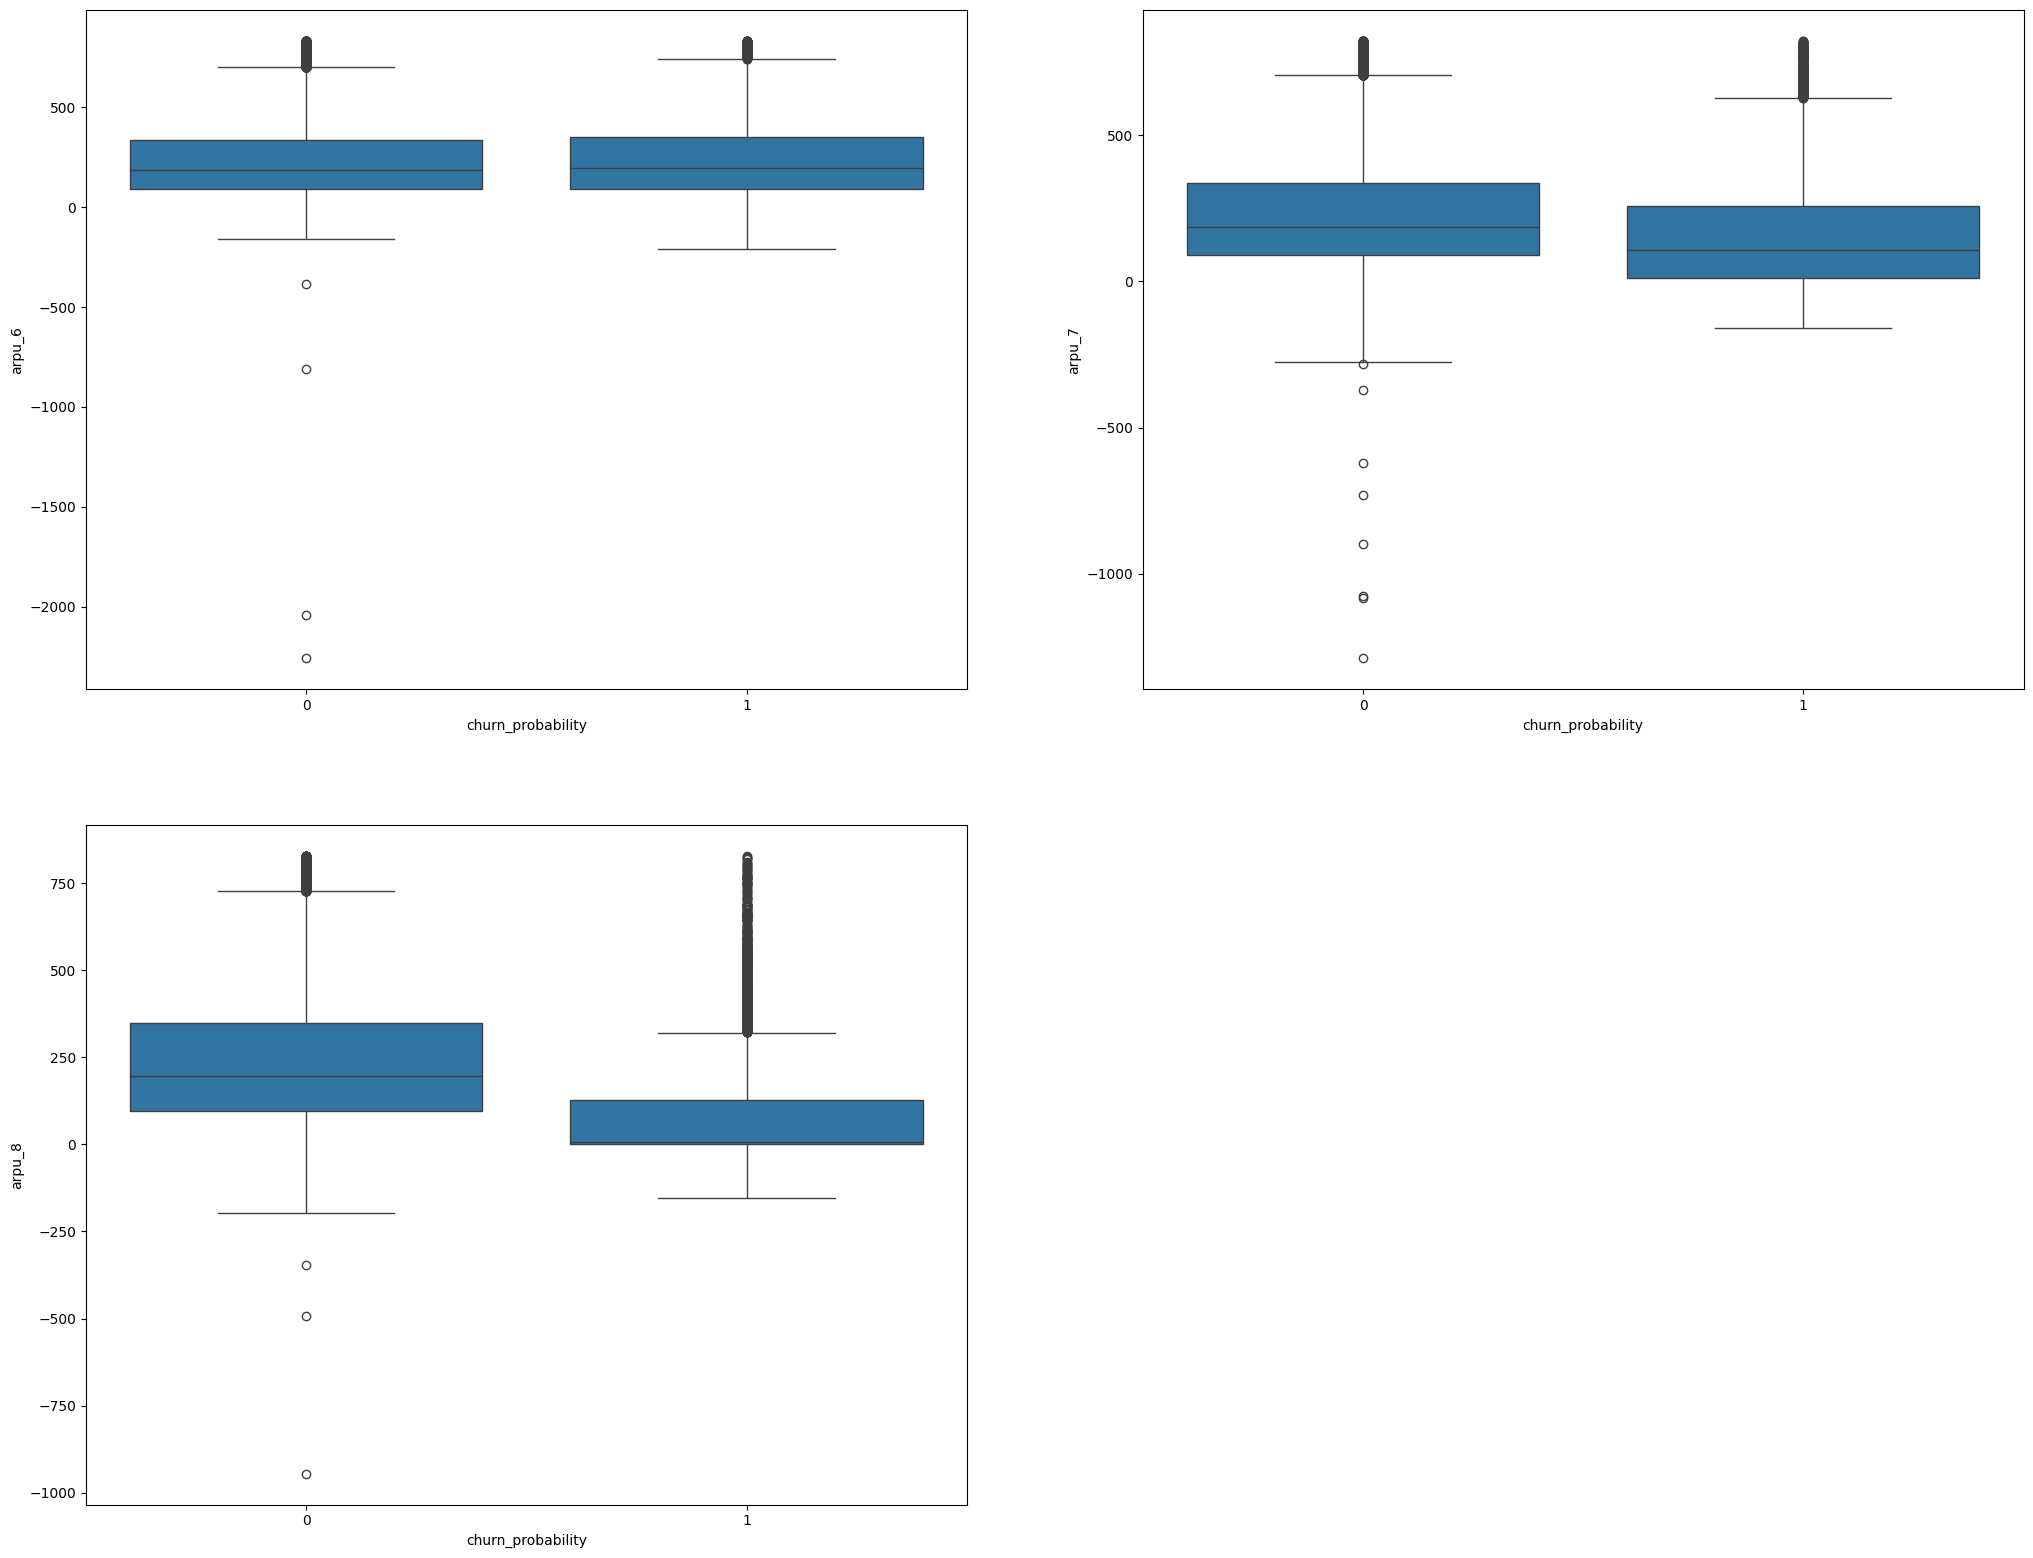

          arpu_6      arpu_7      arpu_8
0.10     9.60690     0.00000     0.00000
0.25    96.09350    14.74525     0.00000
0.35   137.99185    51.99865     0.00000
0.50   210.67650   118.34800     9.96950
0.75   409.33575   289.54350   137.01325
0.90   688.63850   565.72480   335.67320
0.95   923.15695   778.23275   512.42520
0.99  1587.71041  1447.49045  1137.86019


In [71]:
boxplot(pre_processed_data,cols,quantile=.99)
quantiles(pre_processed_data,cols,pre_processed_data['churn_probability']==1)

#### Observation
1. The arpus are coming down as the window moves towards churn phase , which is an early indicator for possible customer churn
2. arpu per user in 75th percentile has come down to 137 from 409 in month 6
3. The interquartile spread is even higher as we move down to 50th percentile numbers

#### Analysis of Total recharge columns

In [72]:
cols=[i for i in pre_processed_data if re.search('total_rech_num',i)]

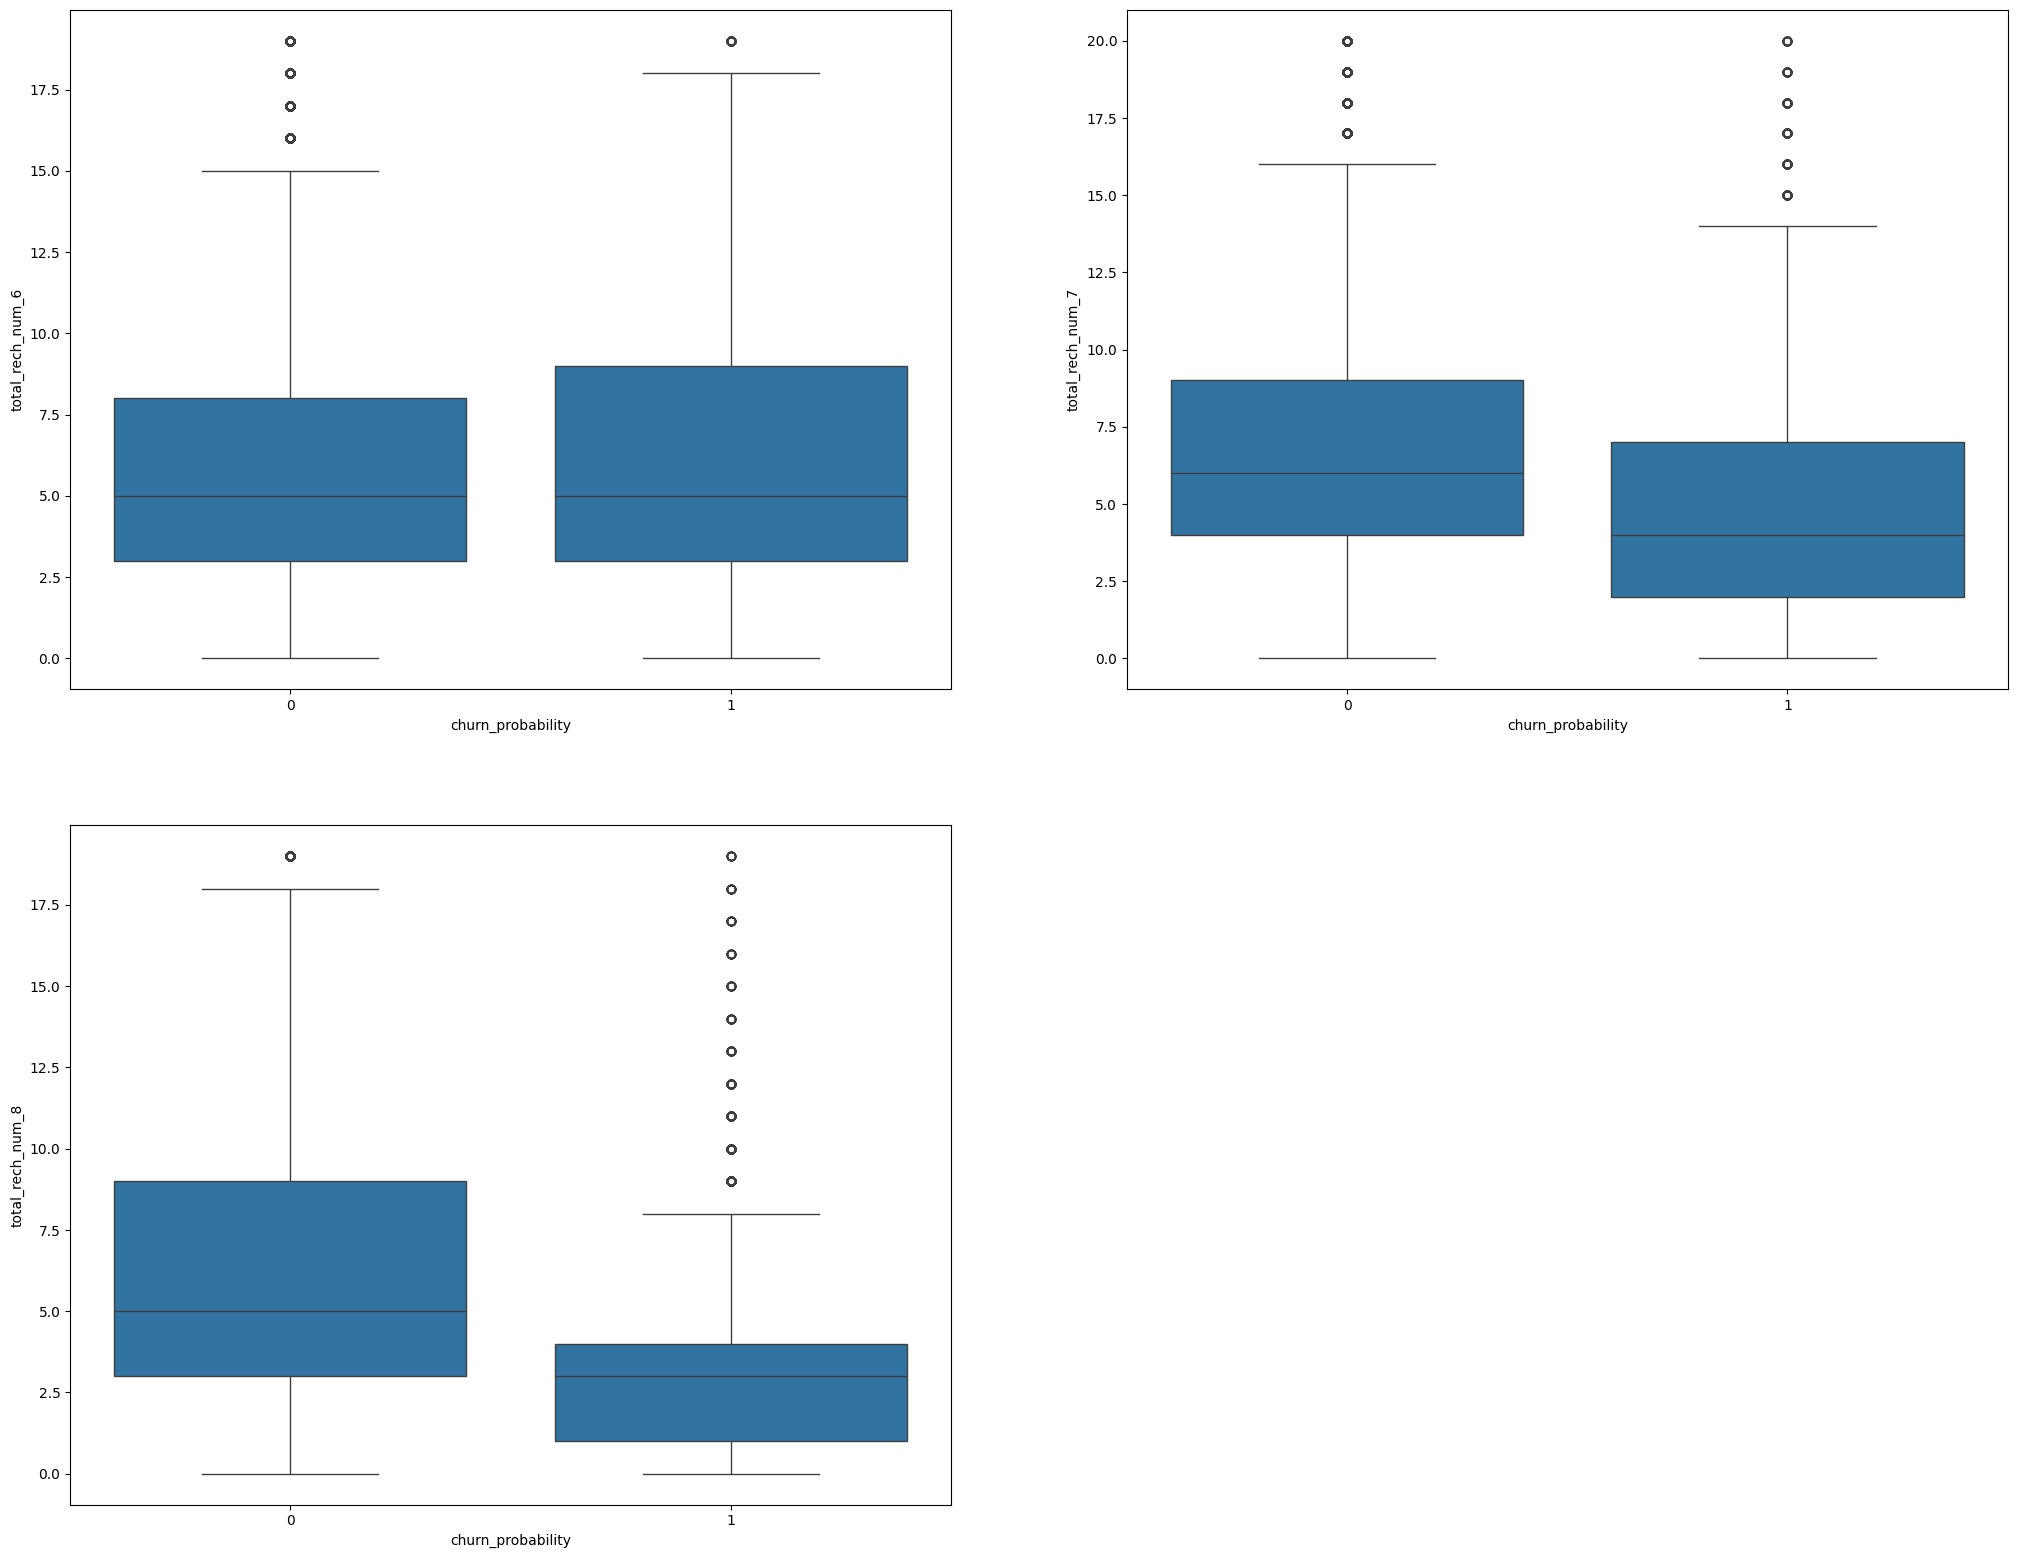

      total_rech_num_6  total_rech_num_7  total_rech_num_8
0.10               1.0               1.0               0.0
0.25               3.0               2.0               1.0
0.35               4.0               3.0               2.0
0.50               6.0               4.0               3.0
0.75              10.0               8.0               5.0
0.90              17.0              14.0               8.0
0.95              23.0              19.0              11.0
0.99              41.0              33.0              22.0


In [73]:
boxplot(pre_processed_data,cols,quantile=.99)
quantiles(pre_processed_data,cols,pre_processed_data['churn_probability']==1)

#### Observation
1. There is an observable decline in the number of total recharges within a month of the customers month on month in upper and lower quantiles
2. There is a 50% decline in the number of recharges from month 6 to month 8 for the churning customers

#### Analysis of max recharge amounts

In [74]:
cols=[i for i in pre_processed_data if re.search('max_rech_amt',i)]

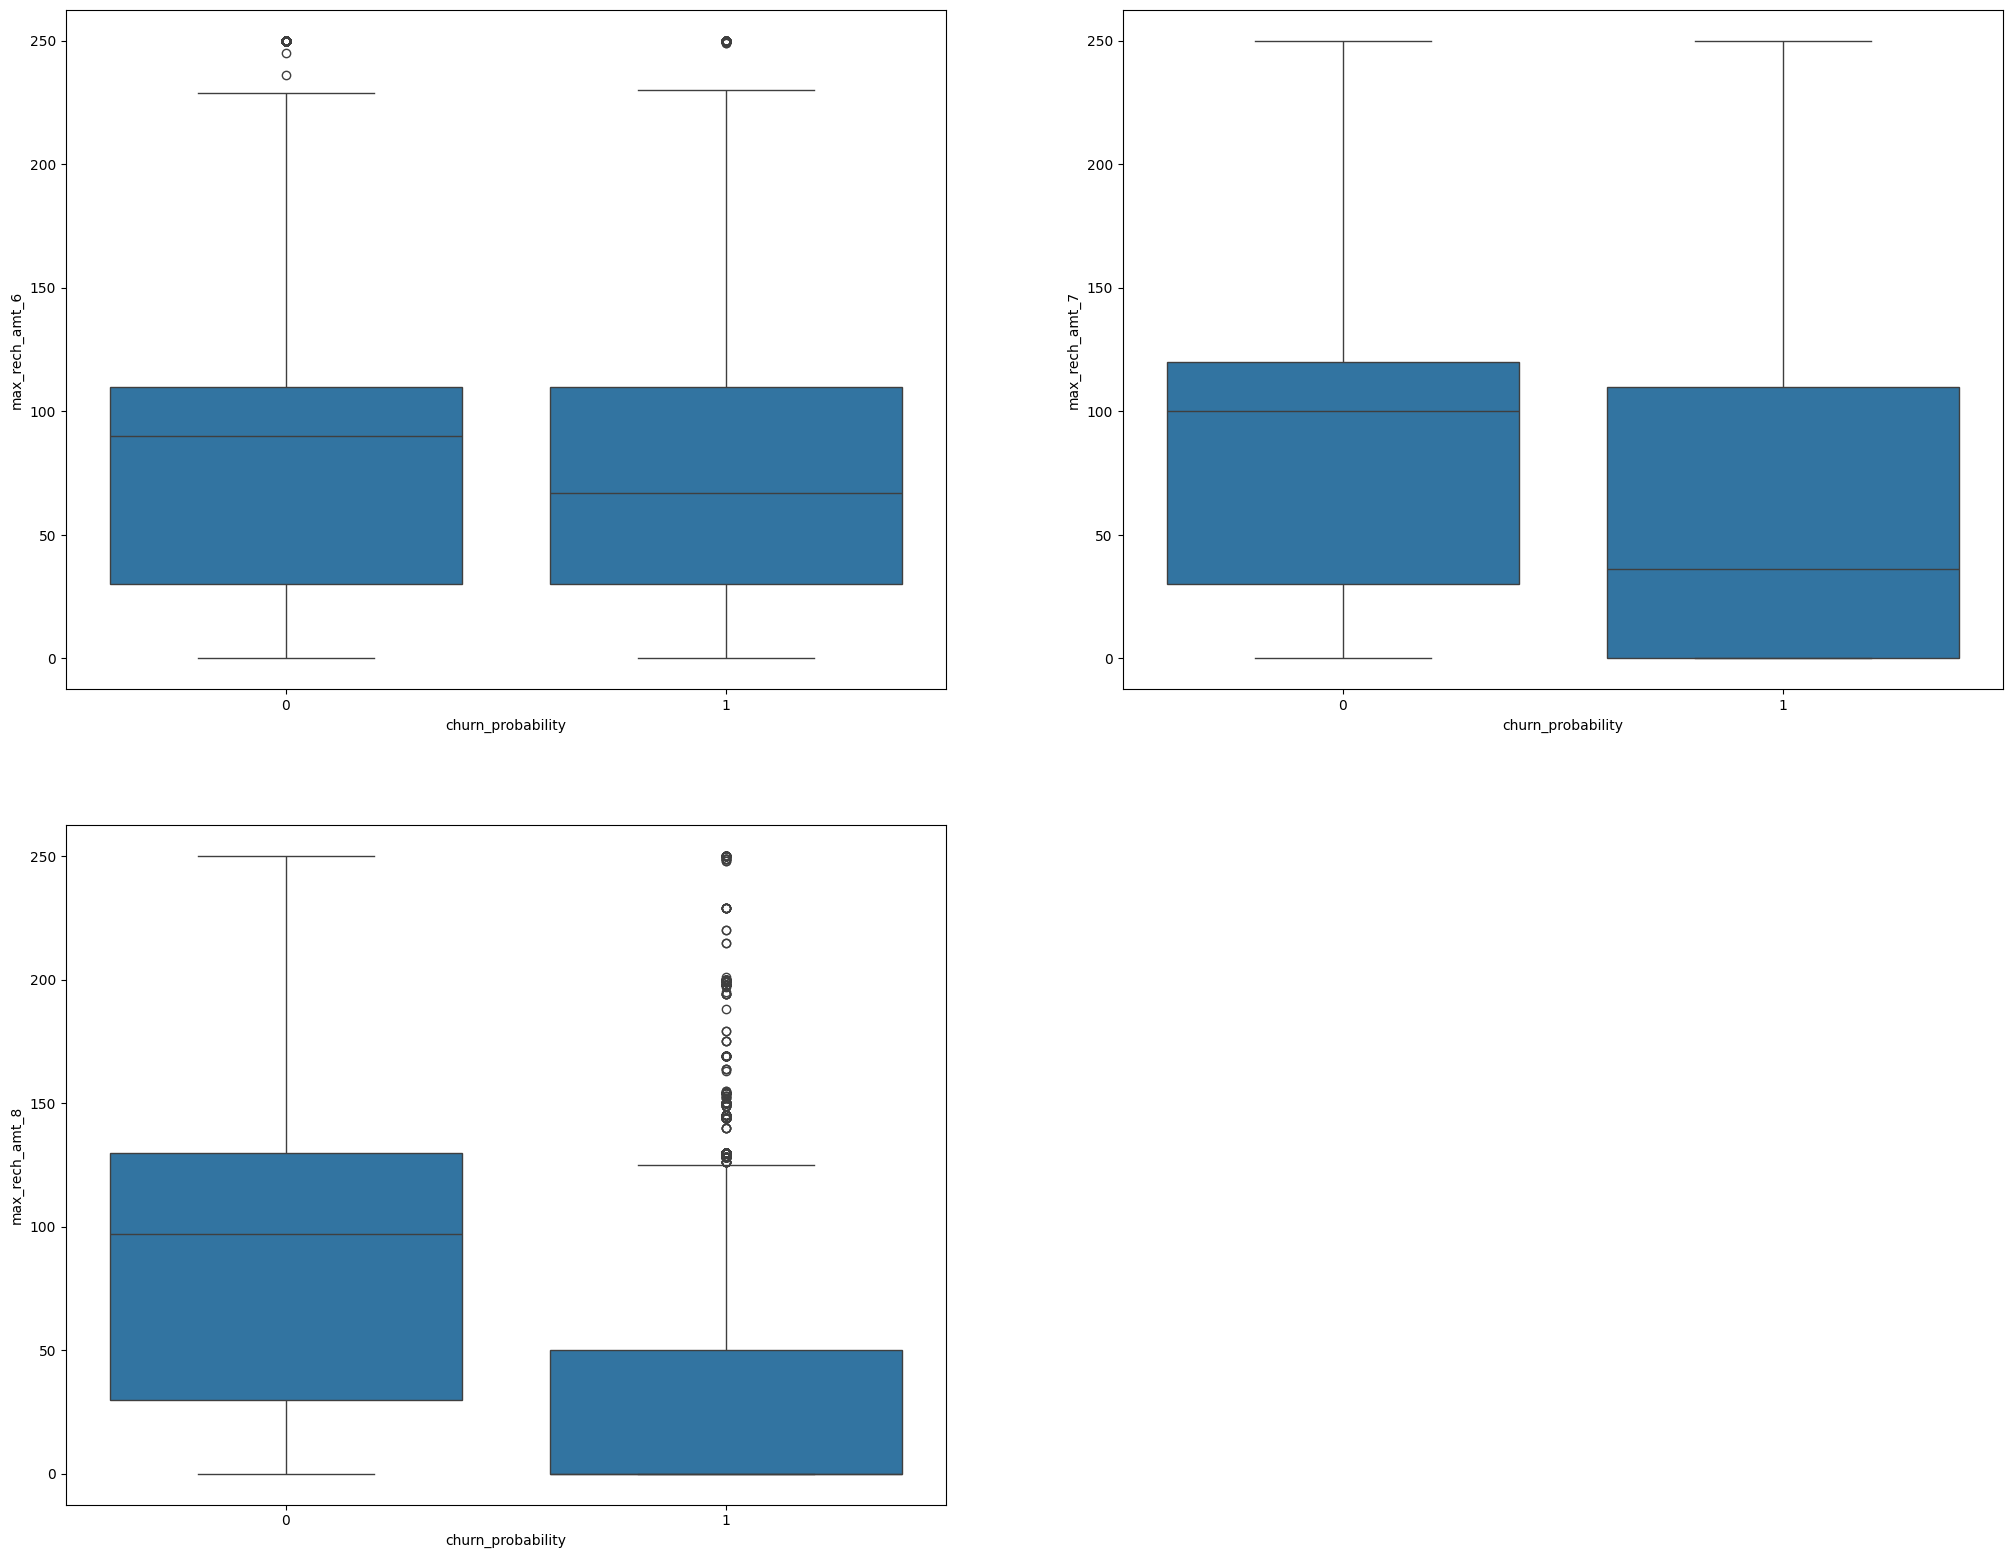

      max_rech_amt_6  max_rech_amt_7  max_rech_amt_8
0.10            0.00             0.0             0.0
0.25           30.00             0.0             0.0
0.35           50.00            20.0             0.0
0.50           90.00            50.0             0.0
0.75          110.00           110.0            50.0
0.90          200.00           154.0           130.0
0.95          252.00           252.0           200.0
0.99          560.35           565.0           500.0


In [75]:
boxplot(pre_processed_data,cols,quantile=.95)
quantiles(pre_processed_data,cols,pre_processed_data['churn_probability']==1)

#### Observation
1. The 75% of customers does a  max recharge of 110 or below
2. 50% of customers recharges 90 or below and this segment went down to 0 in the month of august
3. The 25th percentile recharge went to 0 , and  75th percentile max recharge went down by 50%
4. There is a notable decline in the maximum recharge amount 
in every month with median at 0 during the churn phase


#### Analysis of total recharge amounts

In [76]:
cols=[i for i in pre_processed_data if re.search('total_rech_amt',i)]

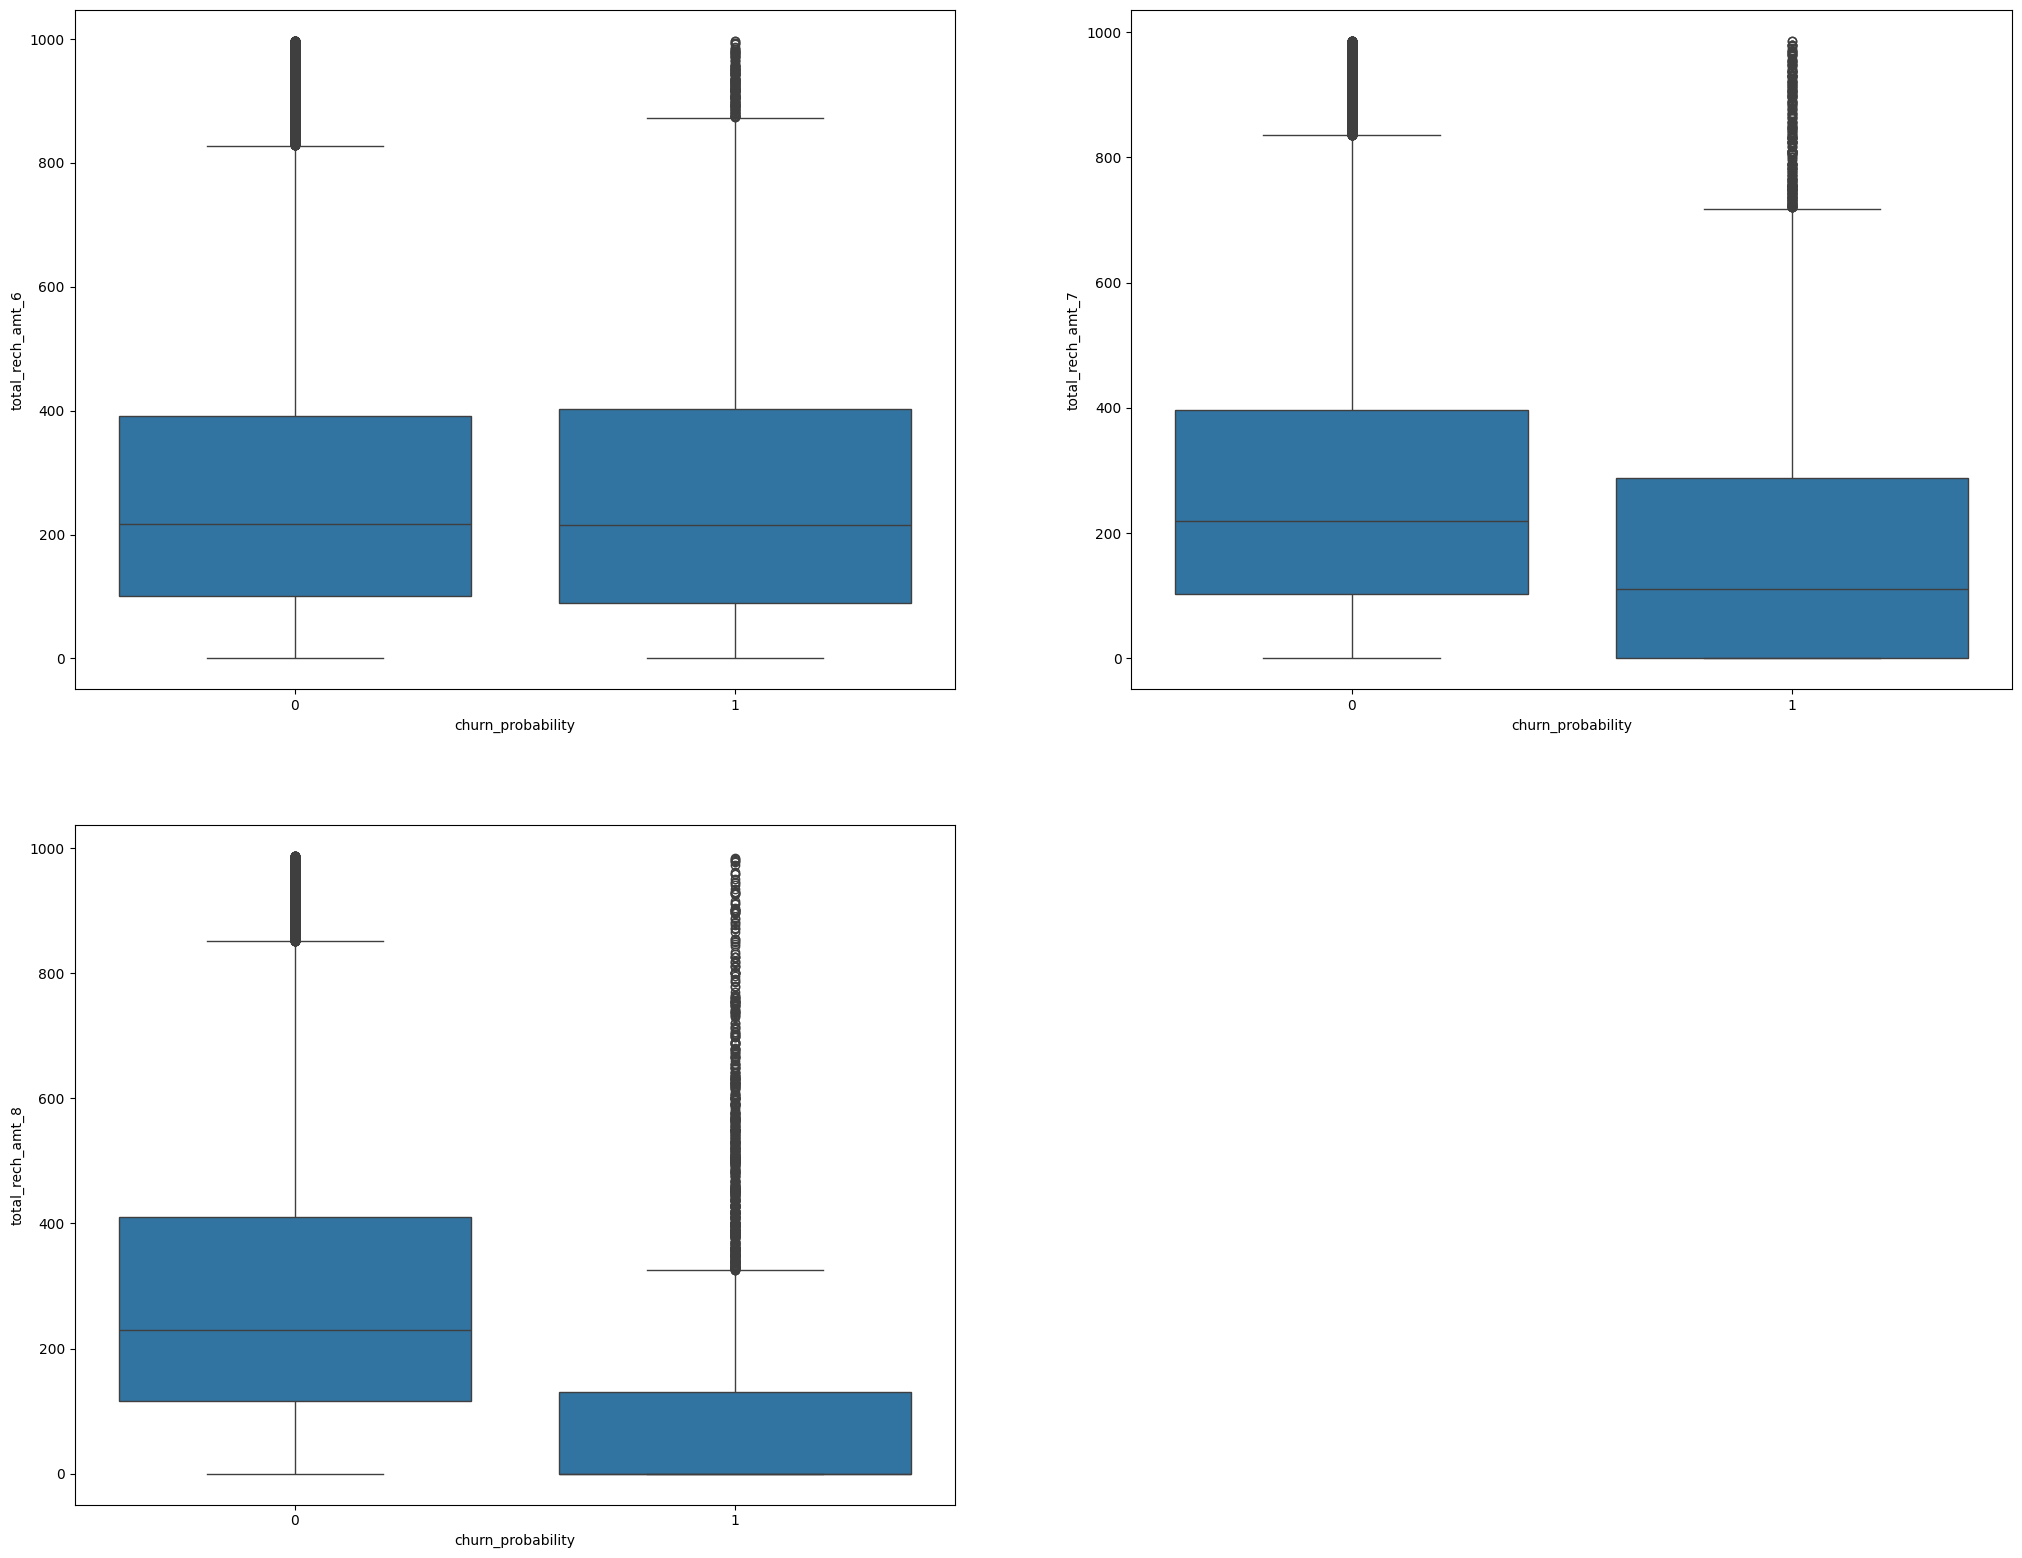

      total_rech_amt_6  total_rech_amt_7  total_rech_amt_8
0.10              0.00              0.00              0.00
0.25            100.00              0.00              0.00
0.35            148.00             30.00              0.00
0.50            236.00            120.00              0.00
0.75            473.25            326.00            136.00
0.90            806.90            646.90            370.90
0.95           1092.45            933.80            568.00
0.99           1919.80           1689.49           1267.69


In [77]:
boxplot(pre_processed_data,cols,quantile=.95)
quantiles(pre_processed_data,cols,pre_processed_data['churn_probability']==1)

In [78]:
pre_processed_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].sum()

total_rech_amt_6    22969457
total_rech_amt_7    22566023
total_rech_amt_8    22668921
dtype: int64

In [79]:
pre_processed_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']][pre_processed_data['churn_probability']==1].sum()

total_rech_amt_6    2501792
total_rech_amt_7    1742313
total_rech_amt_8     861697
dtype: int64

In [80]:
pre_processed_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].median()

total_rech_amt_6    229.0
total_rech_amt_7    220.0
total_rech_amt_8    225.0
dtype: float64

#### Observation
1. There is a notable decline in the total recharge amount for the customers who are about to churn
in every month
2. The segment whose total recharge amount per month around 236 or below went down to 0. These customers are definitely churning
3. The median of the overall segment on the 7th and 8th month seem to be 50% below the overall average
4. The total recharge amount contribution is also declining by month on month

#### Analysis of last day recharge amounts

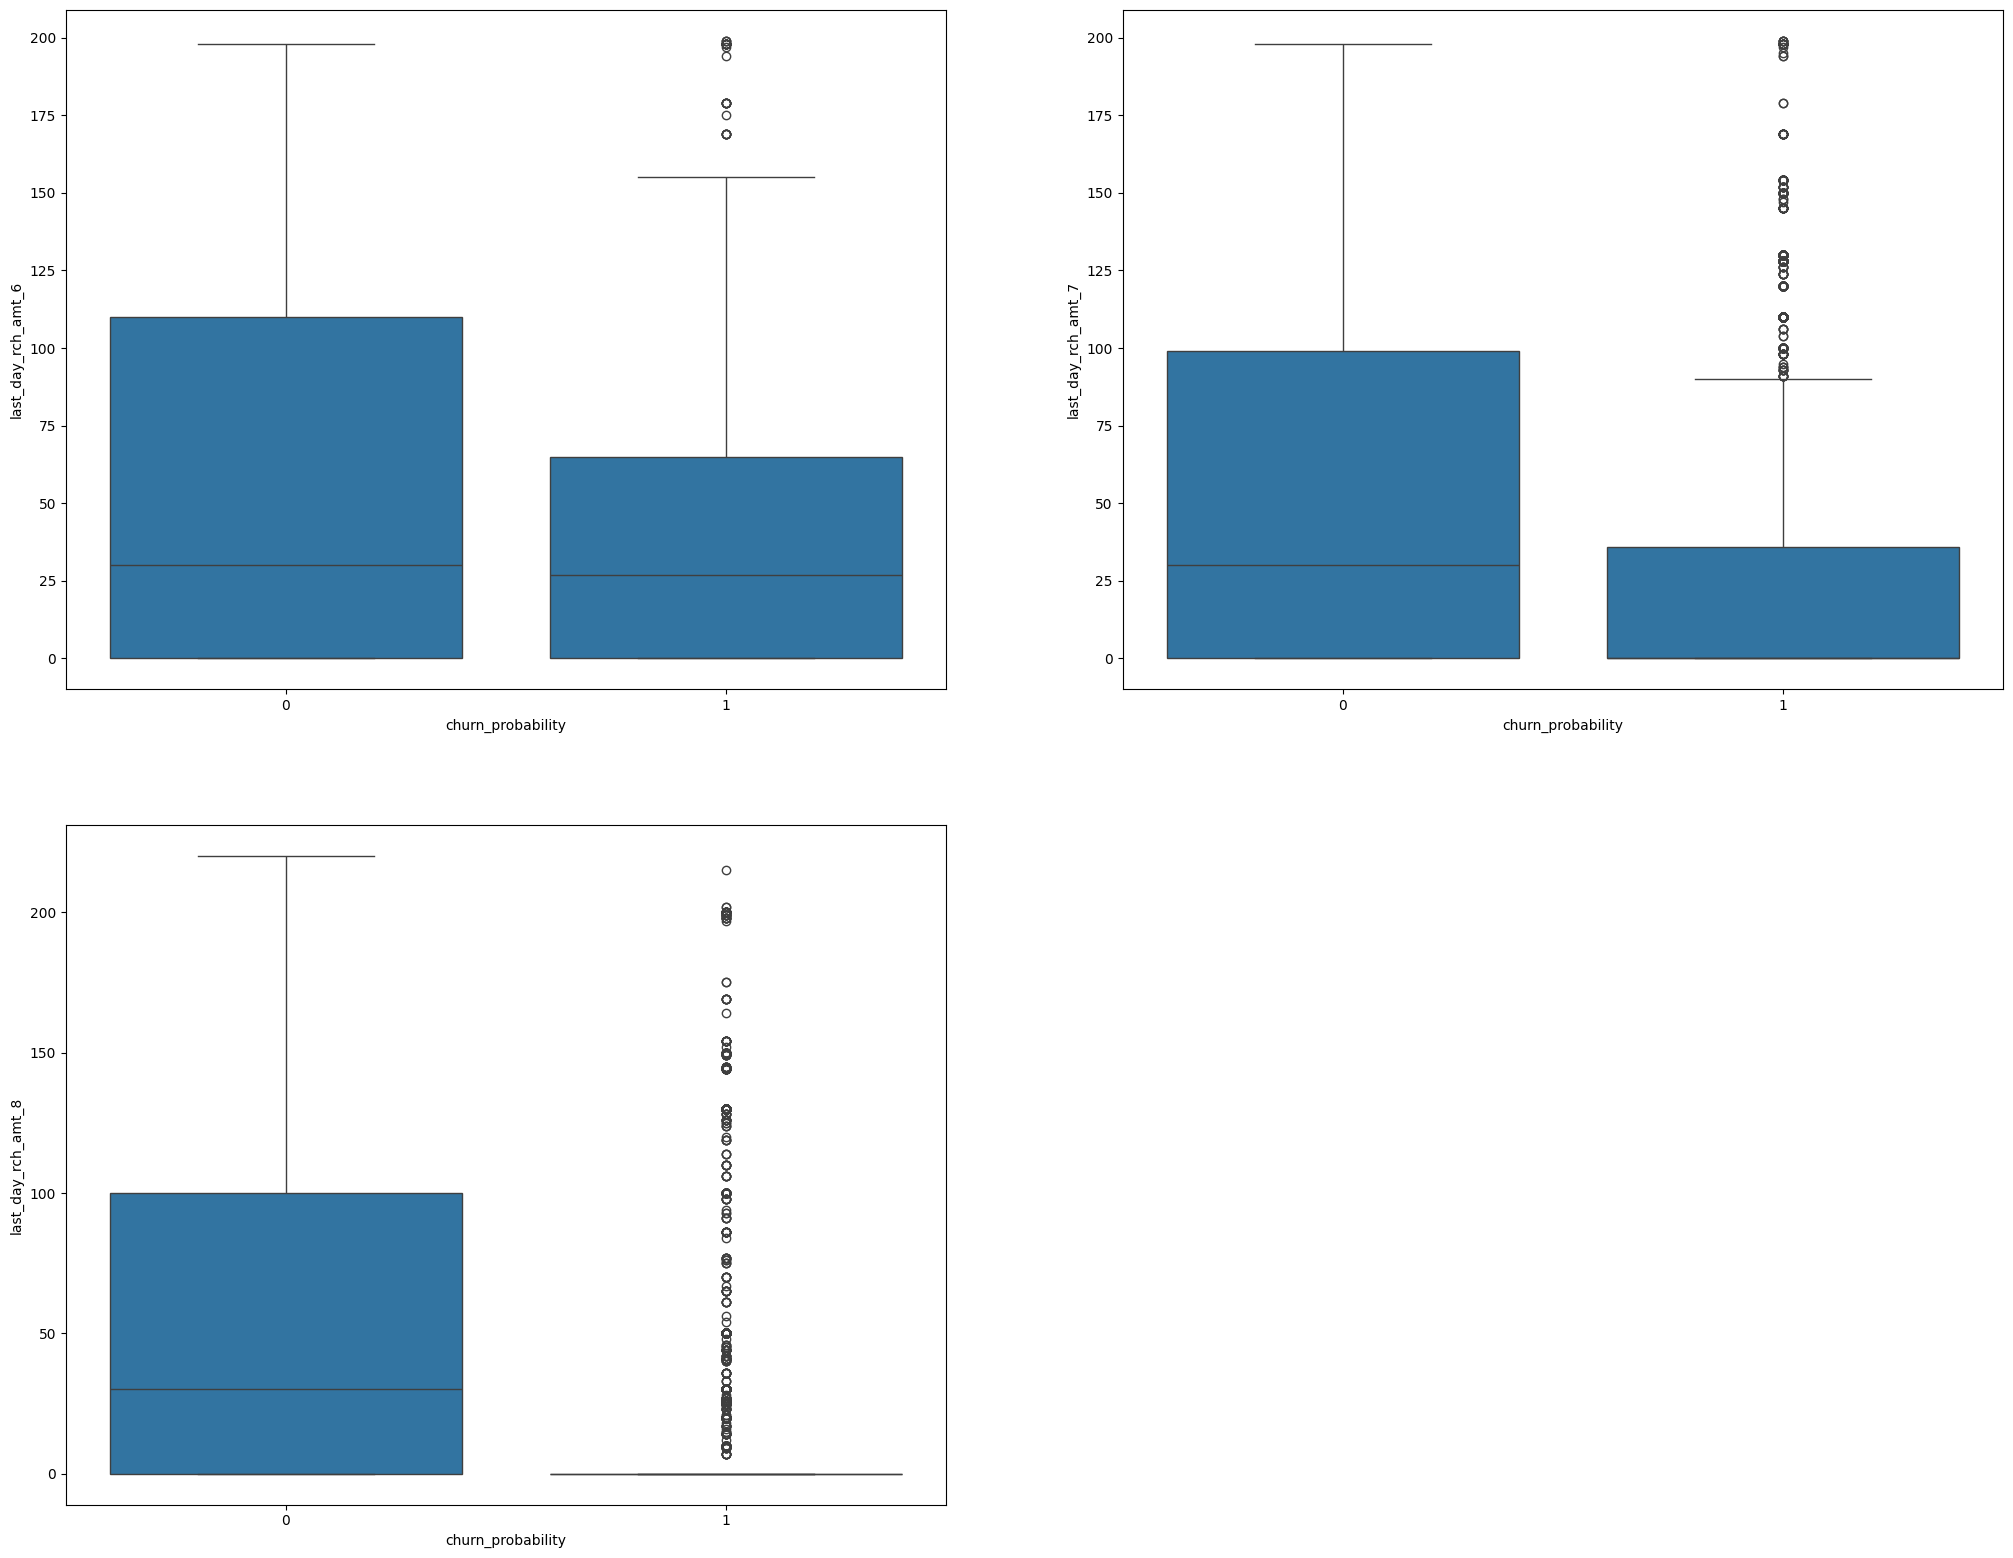

      last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8
0.10                 0.0                 0.0                 0.0
0.25                 0.0                 0.0                 0.0
0.35                10.0                 0.0                 0.0
0.50                30.0                 0.0                 0.0
0.75               100.0                50.0                 0.0
0.90               120.0               120.0                50.0
0.95               199.0               150.0               130.0
0.99               500.0               410.0               252.0


In [81]:
cols=[i for i in ['last_day_rch_amt_6','last_day_rch_amt_7', 'last_day_rch_amt_8']]
boxplot(pre_processed_data,cols,quantile=.95)
quantiles(pre_processed_data,cols,pre_processed_data['churn_probability']==1)

#### Observation
1. There is a notable decline in the last day recharge amount for the customers who are about to churn
in every month
2. As expected the last day recharge of 75% of churning customers went to 0

#### Analysis of volume based cost , monthly 3g , monthly 2g, Sachet columns

In [82]:
quantiles(pre_processed_data,['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],pre_processed_data['churn_probability']==1)

      aug_vbc_3g  jul_vbc_3g  jun_vbc_3g
0.10      0.0000       0.000      0.0000
0.25      0.0000       0.000      0.0000
0.35      0.0000       0.000      0.0000
0.50      0.0000       0.000      0.0000
0.75      0.0000       0.000      0.0000
0.90      0.0000       0.195     25.0700
0.95     20.5670     146.925    236.3275
0.99    502.9354     852.907    971.5060


#### Observation
There is an increase in volume based cost for the churned customer at quantiles above 90%

In [83]:
quantiles(pre_processed_data,['monthly_3g_7', 'monthly_3g_8', 'monthly_3g_6'],pre_processed_data['churn_probability']==1)

      monthly_3g_7  monthly_3g_8  monthly_3g_6
0.10           0.0           0.0           0.0
0.25           0.0           0.0           0.0
0.35           0.0           0.0           0.0
0.50           0.0           0.0           0.0
0.75           0.0           0.0           0.0
0.90           0.0           0.0           0.0
0.95           0.0           0.0           1.0
0.99           1.0           1.0           1.0


In [84]:
quantiles(pre_processed_data,['sachet_2g_6','sachet_2g_7','sachet_2g_8'],pre_processed_data['churn_probability']==1)

      sachet_2g_6  sachet_2g_7  sachet_2g_8
0.10          0.0          0.0          0.0
0.25          0.0          0.0          0.0
0.35          0.0          0.0          0.0
0.50          0.0          0.0          0.0
0.75          0.0          0.0          0.0
0.90          1.0          0.0          0.0
0.95          2.0          2.0          1.0
0.99          7.0          6.0          3.0


In [85]:
for i in ['monthly_3g_7', 'monthly_3g_8', 'monthly_3g_6']:
    zero_values=(100 * pre_processed_data[i].value_counts())/pre_processed_data.shape[0]
    print(zero_values[zero_values.values>90])

monthly_3g_7
0    94.375634
Name: count, dtype: float64
monthly_3g_8
0    93.985628
Name: count, dtype: float64
monthly_3g_6
0    94.272775
Name: count, dtype: float64


In [86]:
for i in ['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']:
    zero_values=(100 * pre_processed_data[i].value_counts())/pre_processed_data.shape[0]
    print(zero_values[zero_values.values > 80])

aug_vbc_3g
0.0    83.355477
Name: count, dtype: float64
jul_vbc_3g
0.0    83.925485
Name: count, dtype: float64
jun_vbc_3g
0.0    84.922642
Name: count, dtype: float64


In [87]:
for i in ['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8']:
    zero_values=(100 * pre_processed_data[i].value_counts())/pre_processed_data.shape[0]
    print(zero_values[zero_values.values > 80])

sachet_2g_6
0    87.118387
Name: count, dtype: float64
sachet_2g_7
0    86.682667
Name: count, dtype: float64
sachet_2g_8
0    85.926942
Name: count, dtype: float64


In [88]:
for i in ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']:
    zero_values=(100 * pre_processed_data[i].value_counts())/pre_processed_data.shape[0]
    print(zero_values[zero_values>90])

monthly_2g_6
0    92.709896
Name: count, dtype: float64
monthly_2g_7
0    92.422749
Name: count, dtype: float64
monthly_2g_8
0    92.597037
Name: count, dtype: float64


#### Analysis of onnet minutes of usage and offnetwork minutes of usage

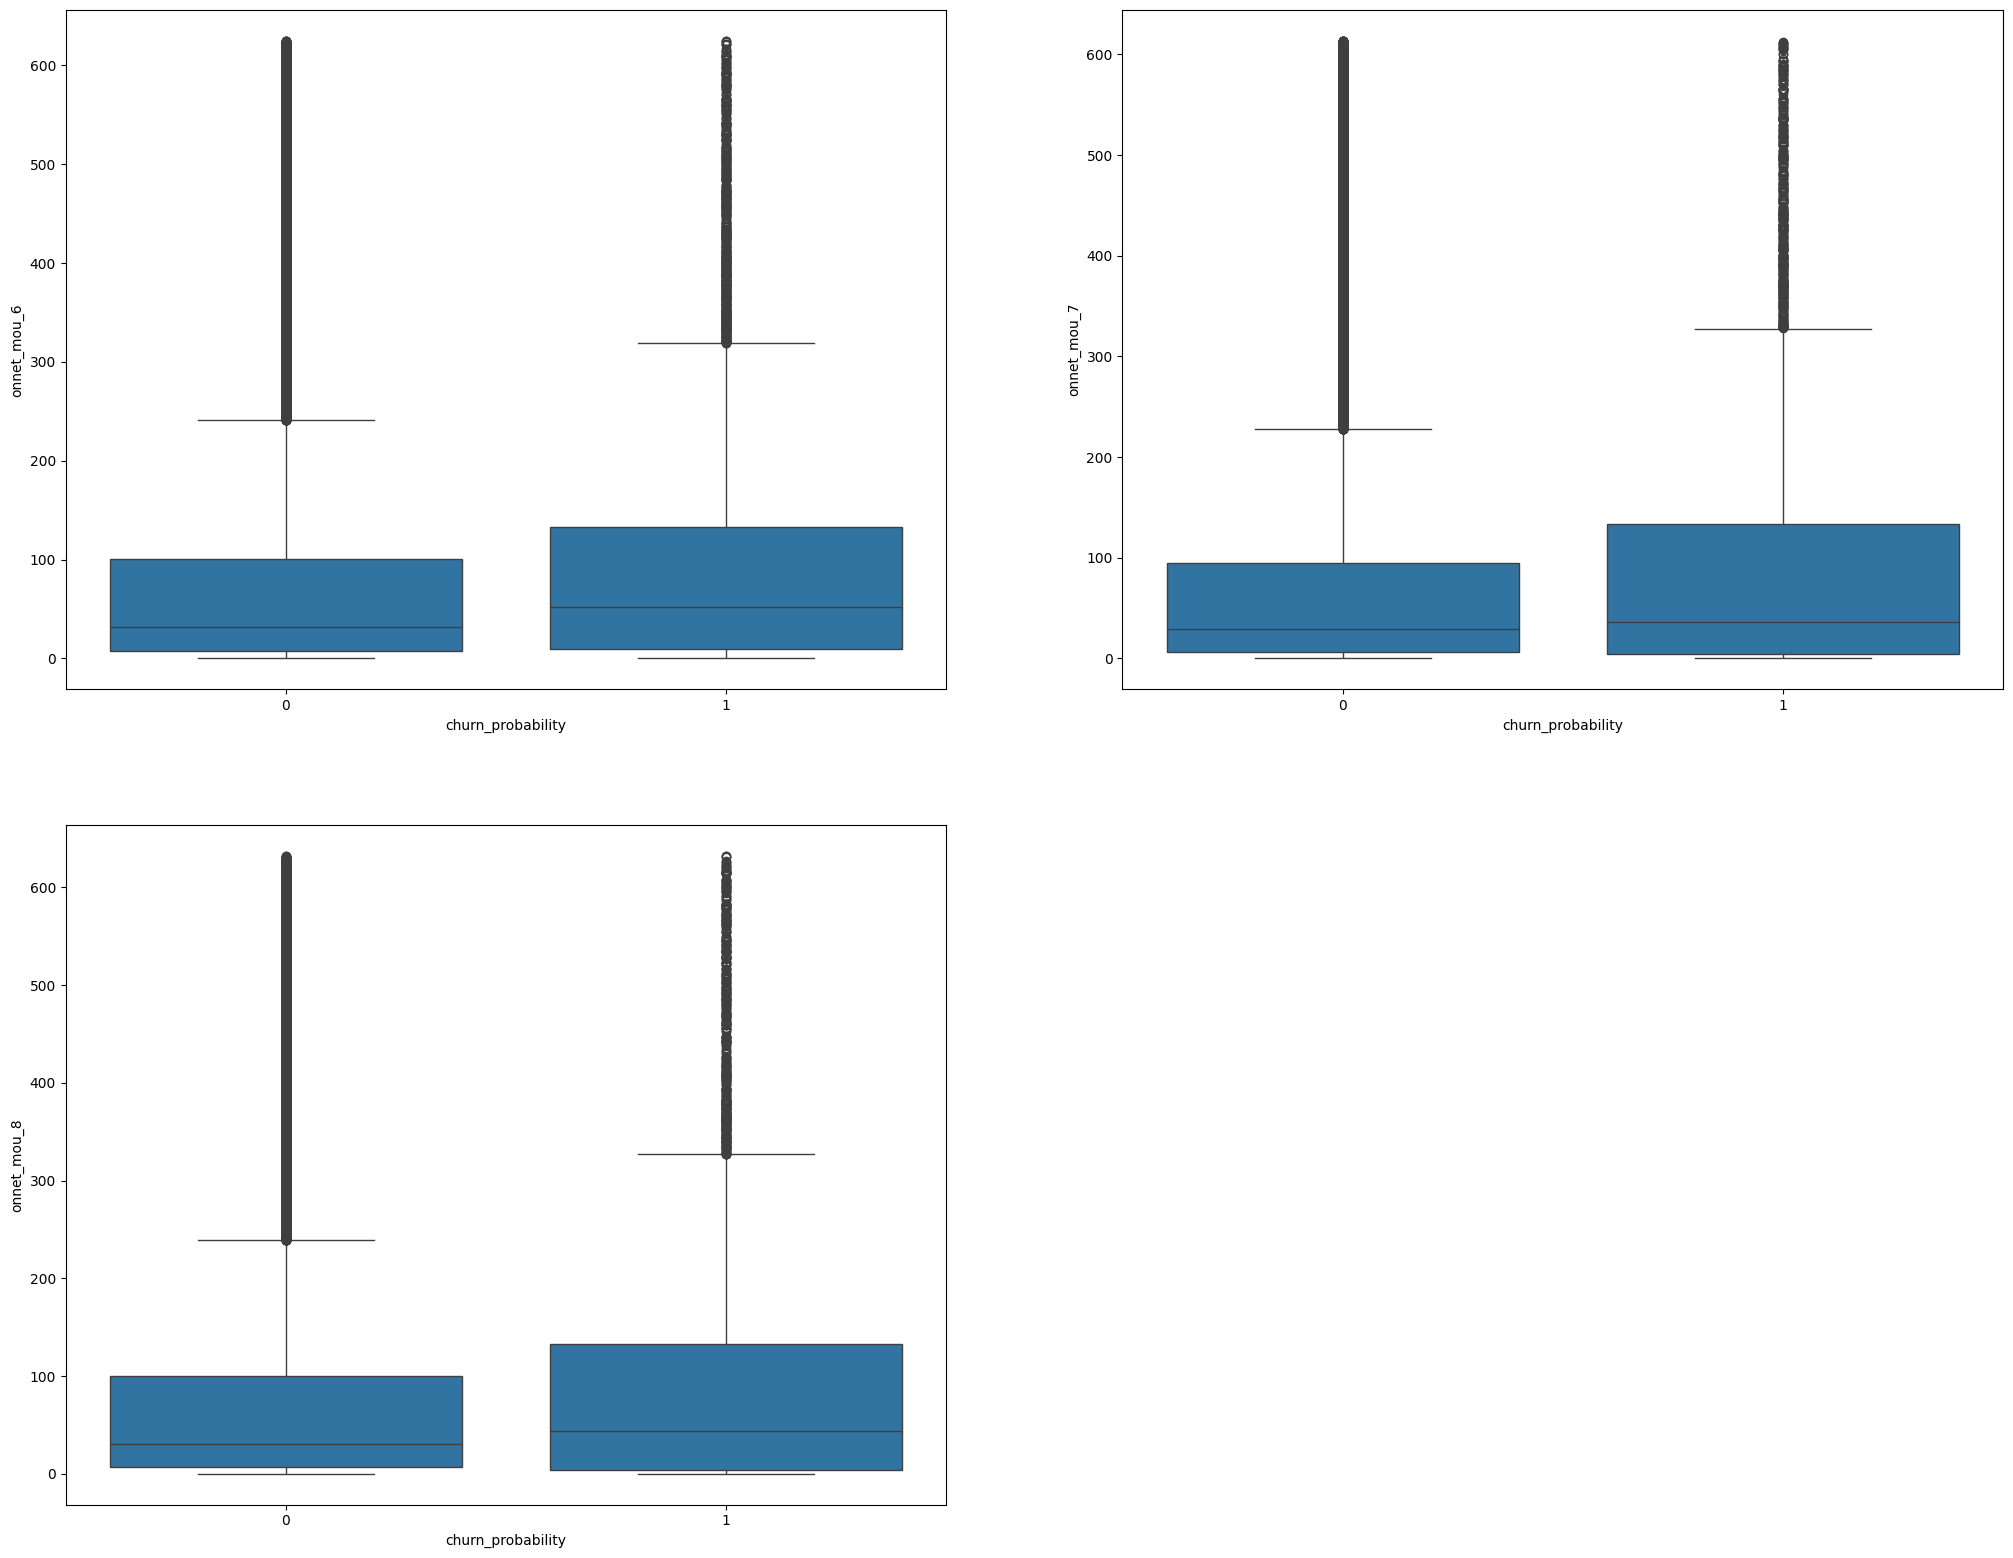

      onnet_mou_6  onnet_mou_7  onnet_mou_8
0.10       0.2010     0.000000       0.0000
0.25      11.0875     5.410000       4.3525
0.35      25.4570    14.574300      16.0043
0.50      63.8270    42.112000      50.0150
0.75     169.6750   133.894438     135.3490
0.90     490.1810   365.436000     364.1456
0.95     828.4735   625.195800     621.3603
0.99    1798.0203  1616.107620    1283.5695


In [89]:
cols=[i for i in pre_processed_data if re.search('onnet',i)]
boxplot(pre_processed_data,cols,quantile=.95)
quantiles(pre_processed_data,cols,pre_processed_data['churn_probability']==1)

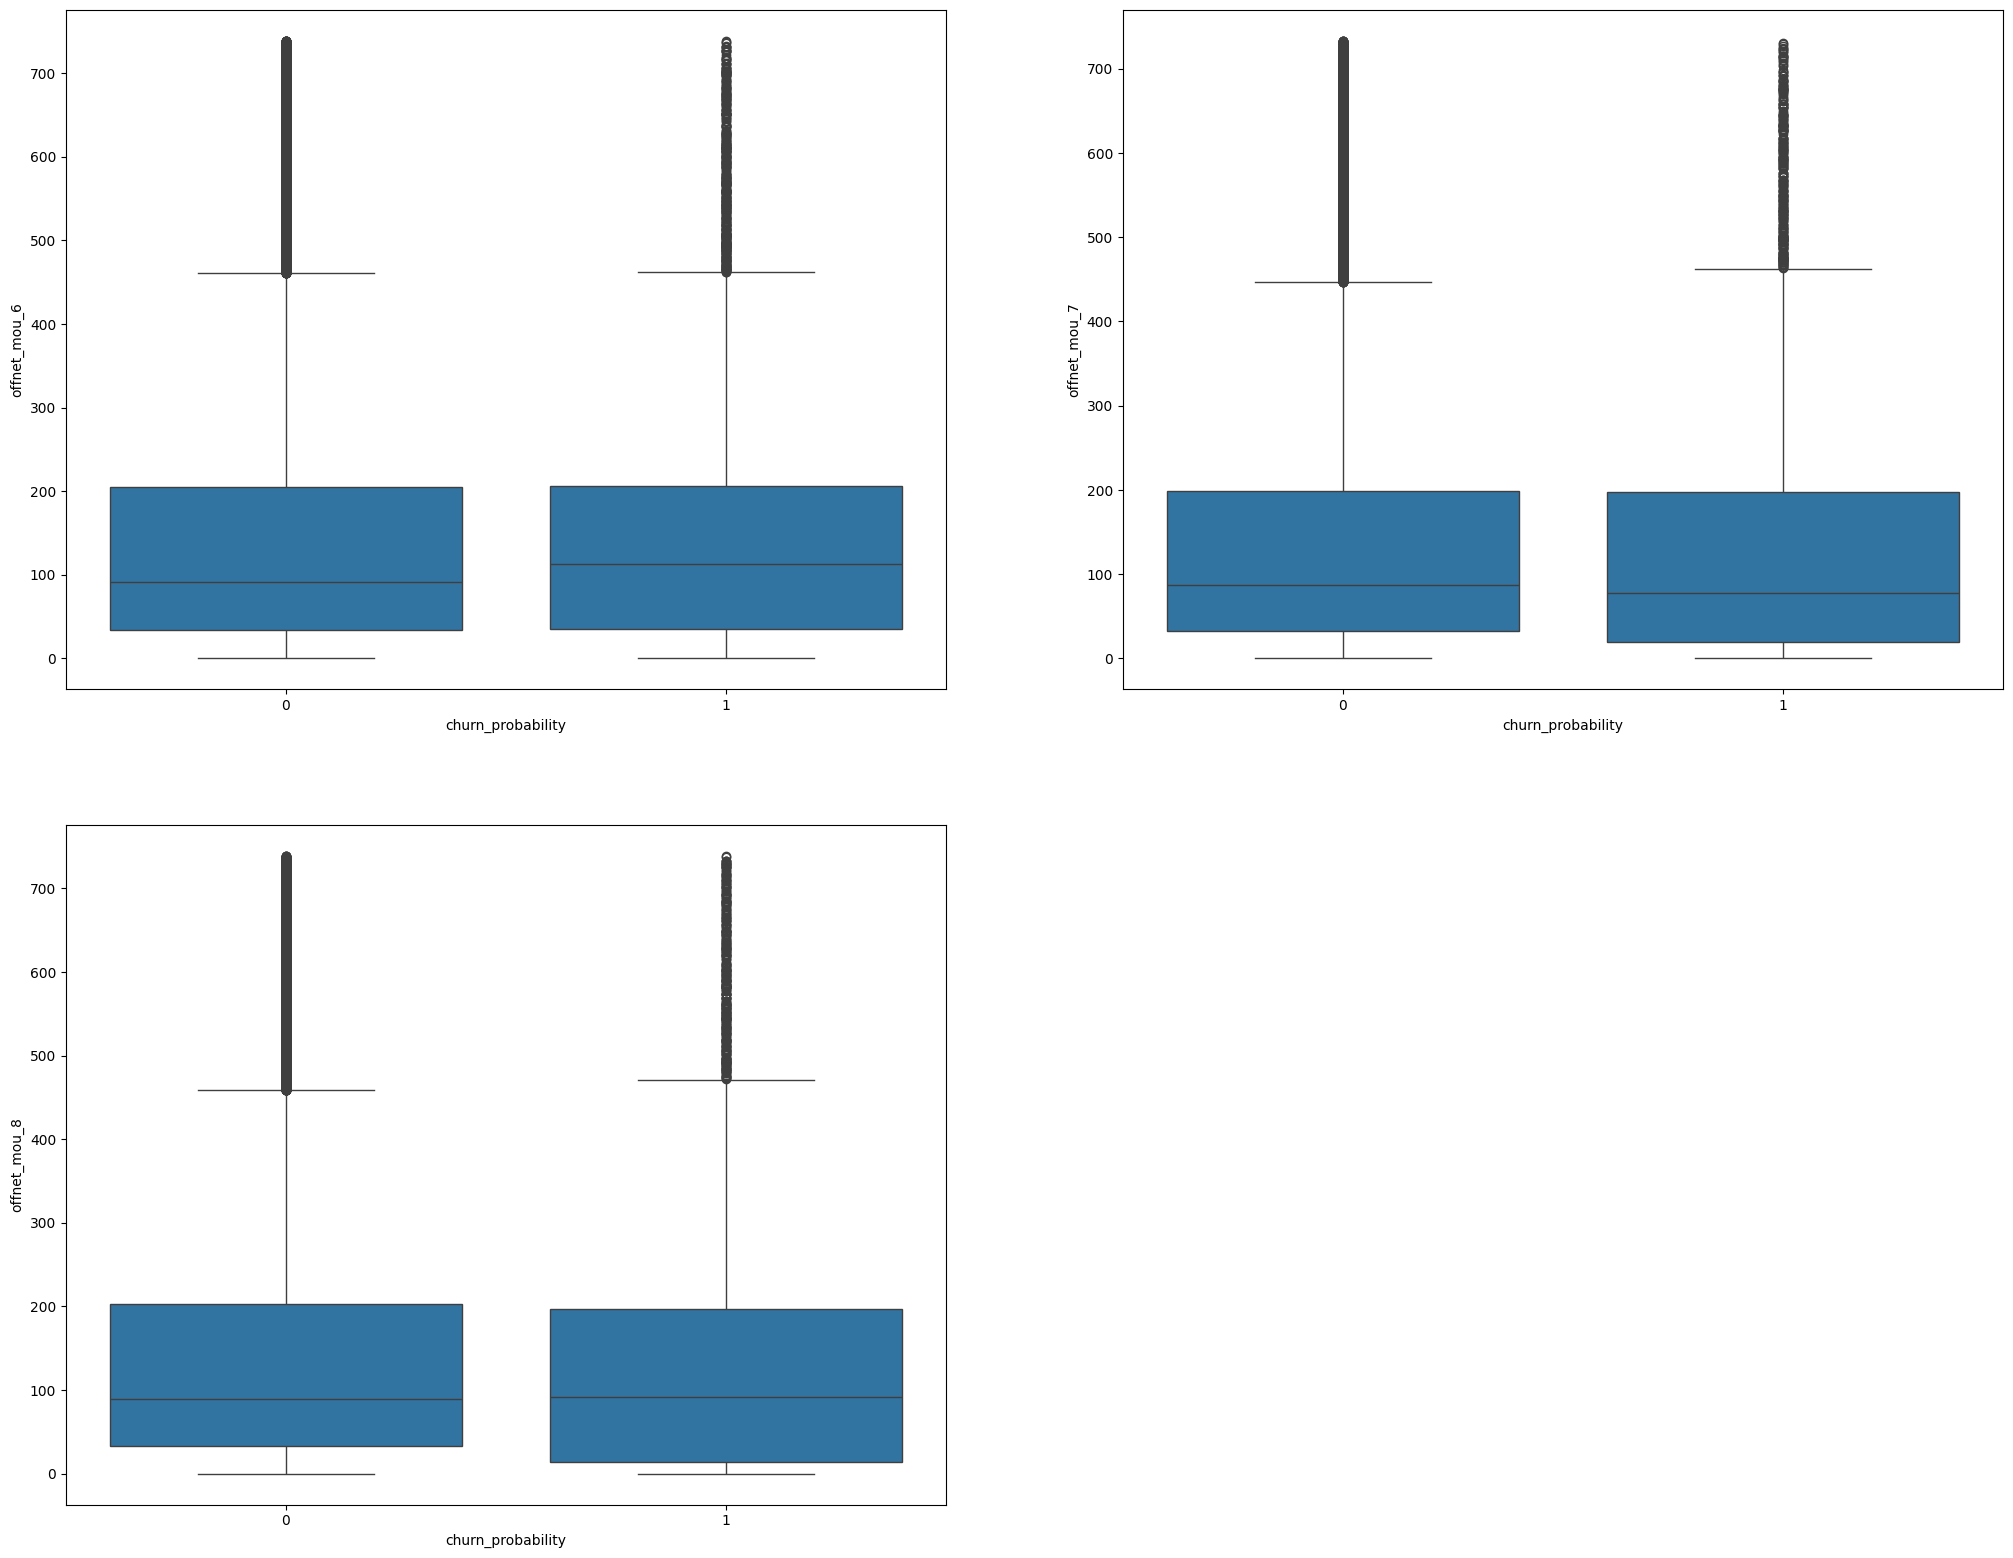

      offnet_mou_6  offnet_mou_7  offnet_mou_8
0.10        6.7400      1.840000        0.1800
0.25       39.6925     21.355000       15.2250
0.35       67.9761     41.574000       40.5810
0.50      128.1200     85.410000      100.5180
0.75      257.0800    197.153383      209.4575
0.90      559.6370    430.784000      431.4396
0.95      892.1600    680.298100      660.6070
0.99     1908.4557   1588.960200     1132.7880


In [90]:
cols=[i for i in pre_processed_data if re.search('offnet',i)]
boxplot(pre_processed_data,cols,quantile=.95)
quantiles(pre_processed_data,cols,pre_processed_data['churn_probability']==1)

In [91]:
cols=[i for i in pre_processed_data if re.search('isd',i)]
for i in cols:
    zero_values=(100 * pre_processed_data[i].value_counts())/pre_processed_data.shape[0]
    print(zero_values[zero_values>80])

isd_og_mou_6
0.0    92.915613
Name: count, dtype: float64
isd_og_mou_7
0.0    93.788483
Name: count, dtype: float64
isd_og_mou_8
0.0    93.185617
Name: count, dtype: float64
isd_ic_mou_6
0.0    81.439735
Name: count, dtype: float64
isd_ic_mou_7
0.0    81.194017
Name: count, dtype: float64
isd_ic_mou_8
0.0    80.334005
Name: count, dtype: float64


#### Observation 
We can observe there is substantial decrease in the usage of offline 
and online network during the action and churn phase

#### Analysis of spl ic og  columns

In [92]:
cols=[i for i in pre_processed_data if re.search('spl',i)]
for i in cols:
    zero_values=(100 * pre_processed_data[i].value_counts())/pre_processed_data.shape[0]
    print(zero_values[zero_values>70])

Series([], Name: count, dtype: float64)
Series([], Name: count, dtype: float64)
Series([], Name: count, dtype: float64)
spl_ic_mou_6
0.0    76.102516
Name: count, dtype: float64
spl_ic_mou_7
0.0    87.576965
Name: count, dtype: float64
spl_ic_mou_8
0.0    83.529765
Name: count, dtype: float64


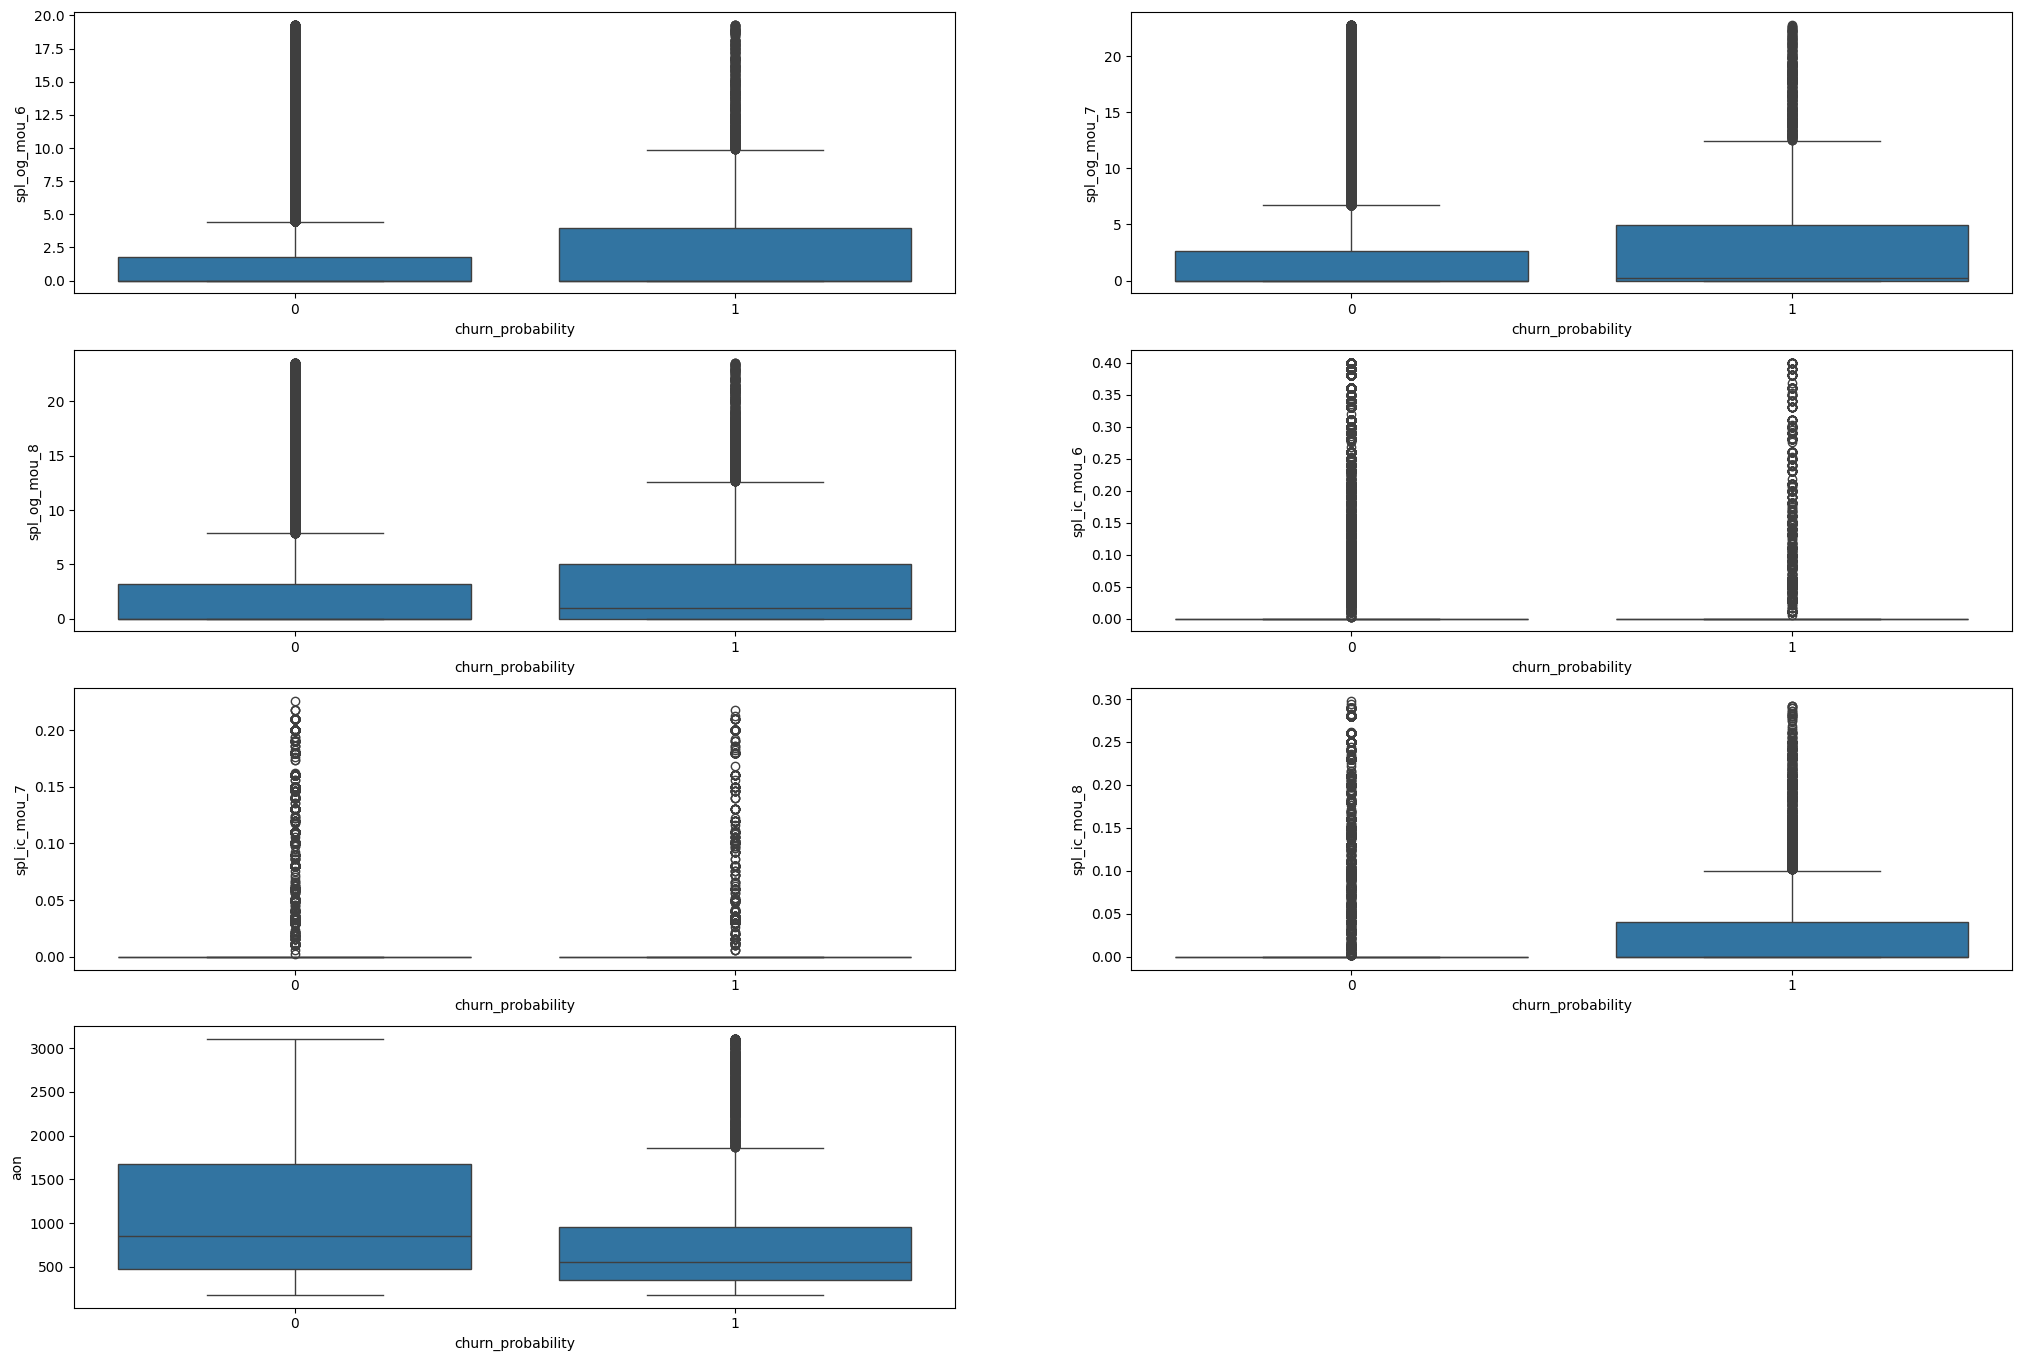

      spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_ic_mou_6  spl_ic_mou_7  \
0.10      0.000000      0.000000       0.00000         0.000      0.000000   
0.25      0.000000      0.000000       0.00000         0.000      0.000000   
0.35      0.000000      0.000000       0.00000         0.000      0.000000   
0.50      0.160000      0.500000       1.30500         0.000      0.000000   
0.75      3.958619      4.976783       5.28250         0.046      0.000000   
0.90     11.540000     12.010000      13.54860         0.180      0.033371   
0.95     21.249000     21.449000      19.36310         0.360      0.160000   
0.99     54.603800     56.204200      36.21904         0.640      0.530000   

      spl_ic_mou_8      aon  
0.10      0.000000   235.00  
0.25      0.000000   351.00  
0.35      0.000000   441.00  
0.50      0.000000   570.50  
0.75      0.040392   996.00  
0.90      0.113800  1979.80  
0.95      0.174000  2610.00  
0.99      0.280000  3348.35  


In [93]:
cols=[i for i in pre_processed_data if re.search('spl',i)]
cols.append('aon')
boxplot(pre_processed_data,cols,quantile=.95)
quantiles(pre_processed_data,cols,pre_processed_data['churn_probability']==1)

In [94]:
quantiles(pre_processed_data,['aon'])

         aon
0.10   286.0
0.25   468.0
0.35   581.0
0.50   868.0
0.75  1813.0
0.90  2792.0
0.95  3108.0
0.99  3651.0


#### Observation
1. Age of network for the churned customers are quite low with 75% at 996 days (less than 3 years) however for non churning it is around 1943 days
and overall at 1813 days around 6 years.

### Bivariate Analysis

#### Analysis of Month on Month ARPU with incoming call minutes

<Figure size 1200x1200 with 0 Axes>

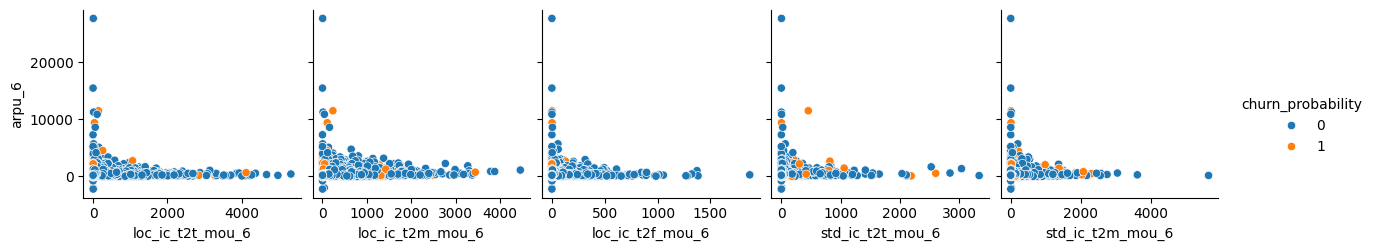

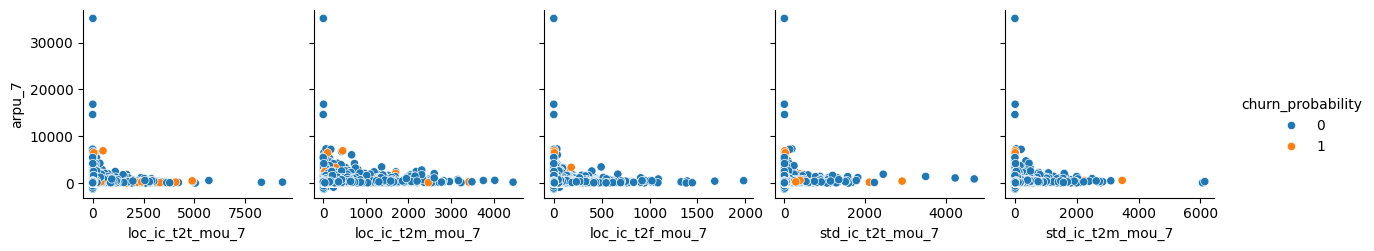

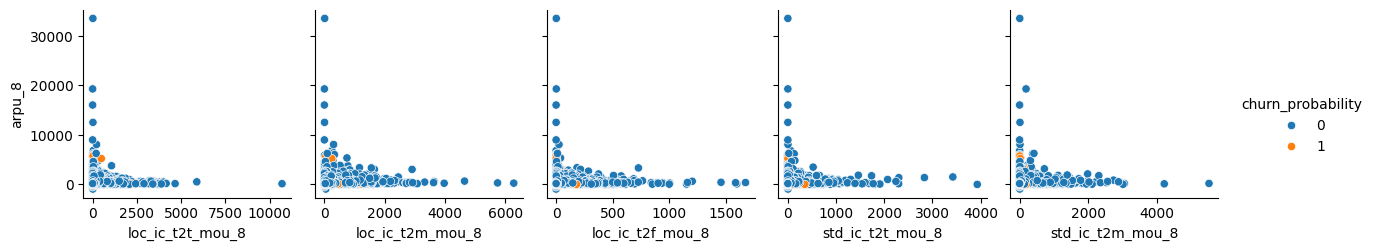

In [95]:
pyplot.figure(figsize=(12,12))
for m in (6,7,8):
    loc_=[i for i in pre_processed_data if re.search('loc_ic_.*_mou_'+str(m),i)]
    std_=[i for i in pre_processed_data if re.search('std_ic_.*_mou_'+str(m),i)]
    arpu=['arpu_'+str(m)]
    arpu_vs_loc_=np.concatenate((loc_,arpu,std_,['churn_probability']))
    sns.pairplot(pre_processed_data[arpu_vs_loc_],y_vars=arpu,x_vars=np.concatenate((loc_,std_)),hue='churn_probability')
    pyplot.show()

In [96]:
pre_processed_data[['arpu_6','loc_ic_t2t_mou_6','loc_ic_t2f_mou_6','loc_ic_t2m_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6']].corr()['arpu_6']

arpu_6              1.000000
loc_ic_t2t_mou_6    0.098562
loc_ic_t2f_mou_6    0.067984
loc_ic_t2m_mou_6    0.226663
std_ic_t2t_mou_6    0.097580
std_ic_t2m_mou_6    0.098856
Name: arpu_6, dtype: float64

In [97]:
pre_processed_data[['arpu_7','loc_ic_t2t_mou_7','loc_ic_t2f_mou_7','loc_ic_t2m_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7']].corr()['arpu_7']

arpu_7              1.000000
loc_ic_t2t_mou_7    0.093005
loc_ic_t2f_mou_7    0.065335
loc_ic_t2m_mou_7    0.225978
std_ic_t2t_mou_7    0.095776
std_ic_t2m_mou_7    0.105451
Name: arpu_7, dtype: float64

In [98]:
pre_processed_data[['arpu_8','loc_ic_t2t_mou_8','loc_ic_t2f_mou_8','loc_ic_t2m_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8']].corr()['arpu_8']

arpu_8              1.000000
loc_ic_t2t_mou_8    0.103212
loc_ic_t2f_mou_8    0.072671
loc_ic_t2m_mou_8    0.222136
std_ic_t2t_mou_8    0.088612
std_ic_t2m_mou_8    0.109898
Name: arpu_8, dtype: float64

#### Observation

1. There is a weak trend between arpu and the ic usage columns 
2. There is 0.22 correlation between t2m (other mobile telecom operator)

<Figure size 1200x1200 with 0 Axes>

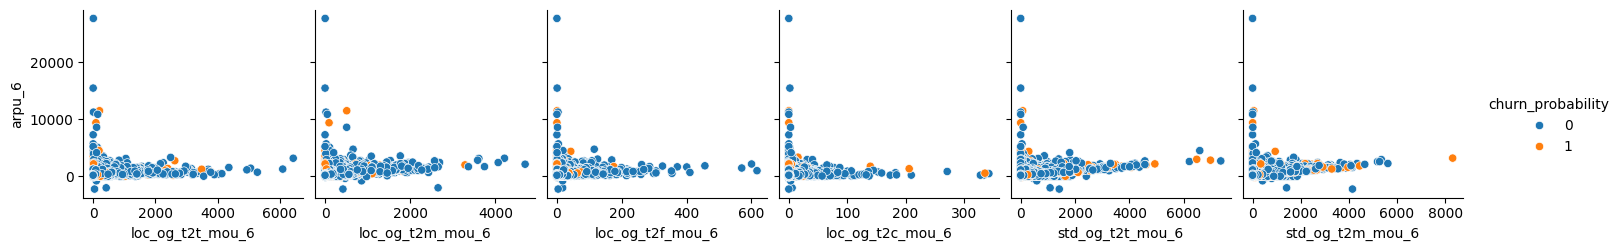

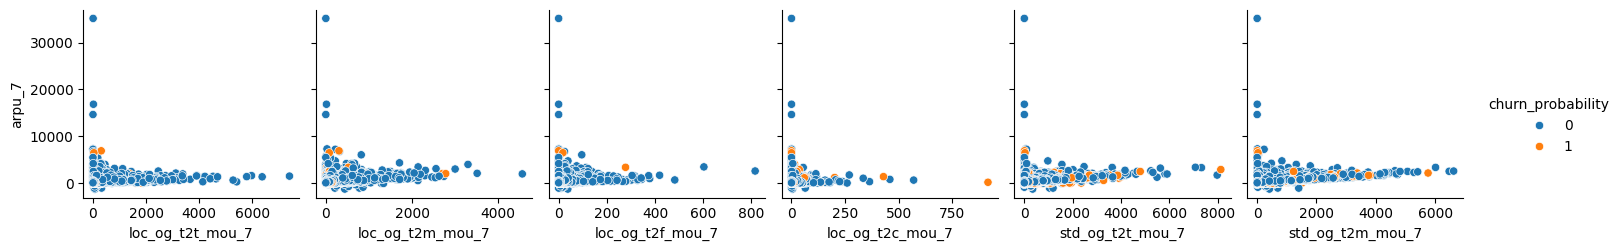

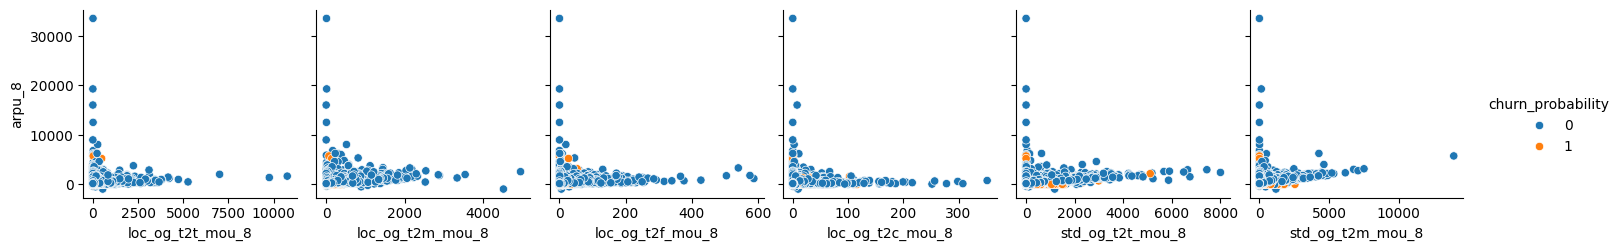

In [99]:
pyplot.figure(figsize=(12,12))
for m in (6,7,8):
    loc_=[i for i in pre_processed_data if re.search('loc_og_.*_mou_'+str(m),i)]
    std_=[i for i in pre_processed_data if re.search('std_og_.*_mou_'+str(m),i)]
    arpu=['arpu_'+str(m)]
    arpu_vs_loc_=np.concatenate((loc_,arpu,std_,['churn_probability']))
    sns.pairplot(pre_processed_data[arpu_vs_loc_],y_vars=arpu,x_vars=np.concatenate((loc_,std_)),hue='churn_probability')
    pyplot.show()

In [100]:
pre_processed_data[['arpu_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6','loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6']].corr()['arpu_6']

arpu_6              1.000000
loc_og_t2t_mou_6    0.227573
loc_og_t2f_mou_6    0.186879
loc_og_t2m_mou_6    0.423702
std_og_t2t_mou_6    0.339908
std_og_t2m_mou_6    0.361443
Name: arpu_6, dtype: float64

In [101]:
pre_processed_data[['arpu_7','loc_og_t2t_mou_7','loc_og_t2f_mou_7','loc_og_t2m_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7']].corr()['arpu_7']

arpu_7              1.000000
loc_og_t2t_mou_7    0.226832
loc_og_t2f_mou_7    0.192816
loc_og_t2m_mou_7    0.418104
std_og_t2t_mou_7    0.341832
std_og_t2m_mou_7    0.377222
Name: arpu_7, dtype: float64

In [102]:
pre_processed_data[['arpu_8','loc_og_t2t_mou_8','loc_og_t2f_mou_8','loc_og_t2m_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8']].corr()['arpu_8']

arpu_8              1.000000
loc_og_t2t_mou_8    0.222215
loc_og_t2f_mou_8    0.185197
loc_og_t2m_mou_8    0.416064
std_og_t2t_mou_8    0.310748
std_og_t2m_mou_8    0.351975
Name: arpu_8, dtype: float64

#### Observation

1. There is a postive correlation between arpu and the og usage columns 
2. loc_og_t2m_mou_6,std_og_t2m_mou_6,std_og_t2t_mou_6 shows 0.42,0.36 and 0.33 with arpu 6 respectively
3. The arpu for month 6 and 7 shows more or less same correlation


<Figure size 1200x1200 with 0 Axes>

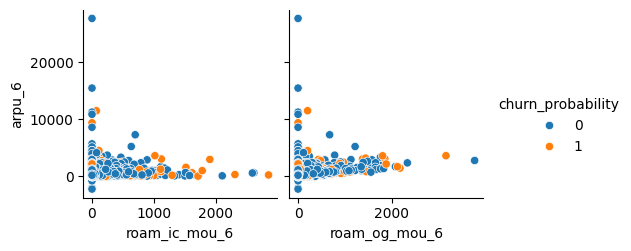

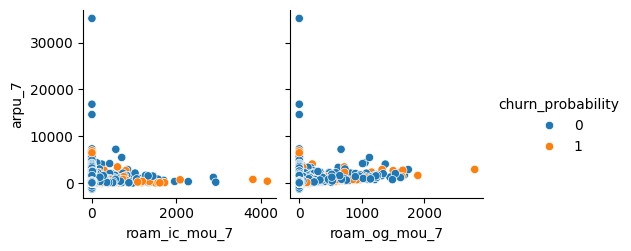

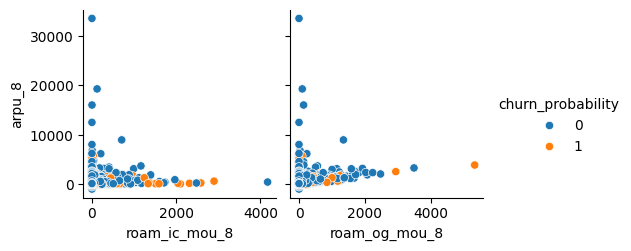

In [103]:
pyplot.figure(figsize=(12,12))
for m in (6,7,8):
    roam_=[i for i in pre_processed_data if re.search('roam.*_mou_'+str(m),i)]
    arpu=['arpu_'+str(m)]
    arpu_vs_roam_=np.concatenate((arpu,roam_,['churn_probability']))
    sns.pairplot(pre_processed_data[arpu_vs_roam_],y_vars=arpu,x_vars=roam_,hue='churn_probability')
    pyplot.show()

In [104]:
pre_processed_data[['arpu_6','roam_ic_mou_6','roam_og_mou_6']].corr()['arpu_6']

arpu_6           1.000000
roam_ic_mou_6    0.126033
roam_og_mou_6    0.227055
Name: arpu_6, dtype: float64

In [105]:
pre_processed_data[['arpu_7','roam_ic_mou_7','roam_og_mou_7']].corr()['arpu_7']

arpu_7           1.000000
roam_ic_mou_7    0.095159
roam_og_mou_7    0.200703
Name: arpu_7, dtype: float64

In [106]:
pre_processed_data[['arpu_8','roam_ic_mou_8','roam_og_mou_8']].corr()['arpu_8']

arpu_8           1.000000
roam_ic_mou_8    0.101341
roam_og_mou_8    0.200192
Name: arpu_8, dtype: float64

#### Observation
1. The churning customers are towards the right side of the x axis indicating the roaming usage is high 
and consistently declining on the subsequent plots
2. The roaming incoming usage shows weak correlation w.r.t arpu ,where as outgoing shows fairly positive trend

<Figure size 1200x1200 with 0 Axes>

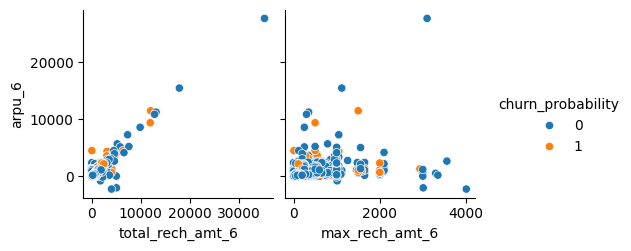

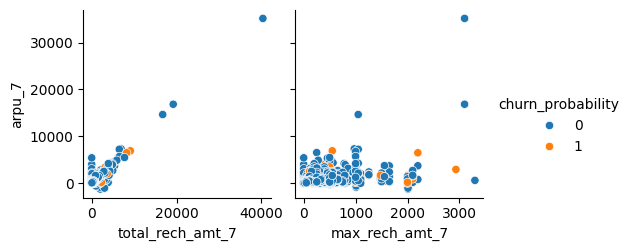

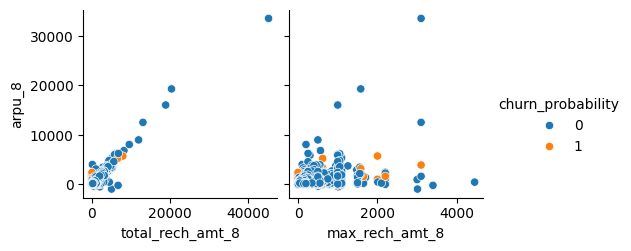

In [107]:
pyplot.figure(figsize=(12,12))
for m in (6,7,8):
    rech_=[i for i in pre_processed_data if re.search('total_rech_amt_'+str(m),i)]
    max_rech_=[i for i in pre_processed_data if re.search('max_rech_amt_'+str(m),i)]
    arpu=['arpu_'+str(m)]
    arpu_vs_rech_=np.concatenate((arpu,rech_,max_rech_,['churn_probability']))
    sns.pairplot(pre_processed_data[arpu_vs_rech_],y_vars=arpu,x_vars=np.concatenate((rech_,max_rech_)),hue='churn_probability')
    pyplot.show()

In [108]:
pre_processed_data[['arpu_8','max_rech_amt_8']].corr()

arpu_8  max_rech_amt_8
arpu_8          1.000000        0.494623
max_rech_amt_8  0.494623        1.000000

In [109]:
pre_processed_data[['arpu_8','total_rech_amt_8']].corr()

arpu_8  total_rech_amt_8
arpu_8            1.000000          0.958333
total_rech_amt_8  0.958333          1.000000

#### Observation
1. The total recharge amount shows strong positive correlation of 0.95
2. The max recharge amount shows  positive correlation of 0.49
indicating these are two features influencing the arpu directly

<Figure size 1200x1200 with 0 Axes>

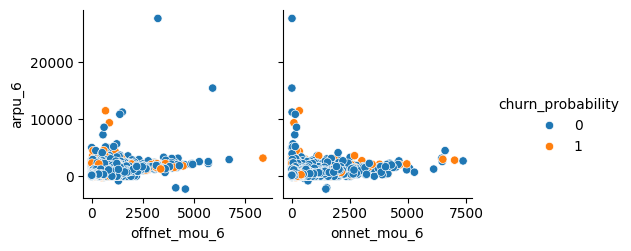

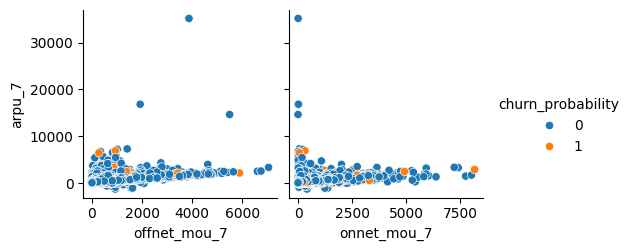

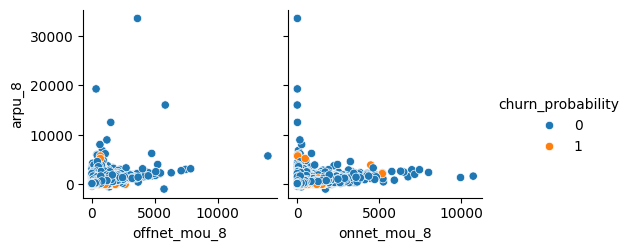

In [110]:
pyplot.figure(figsize=(12,12))
for m in (6,7,8):
    offnet_=[i for i in pre_processed_data if re.search('offnet_mou_'+str(m),i)]
    onnet_=[i for i in pre_processed_data if re.search('onnet_mou_'+str(m),i)]
    arpu=['arpu_'+str(m)]
    arpu_vs_off_on=np.concatenate((arpu,offnet_,onnet_,['churn_probability']))
    sns.pairplot(pre_processed_data[arpu_vs_off_on],y_vars=arpu,x_vars=np.concatenate((offnet_,onnet_)),hue='churn_probability')
    pyplot.show()

<Figure size 1200x1200 with 0 Axes>

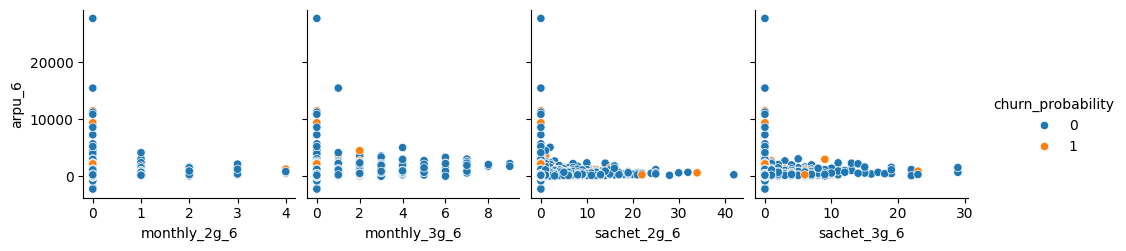

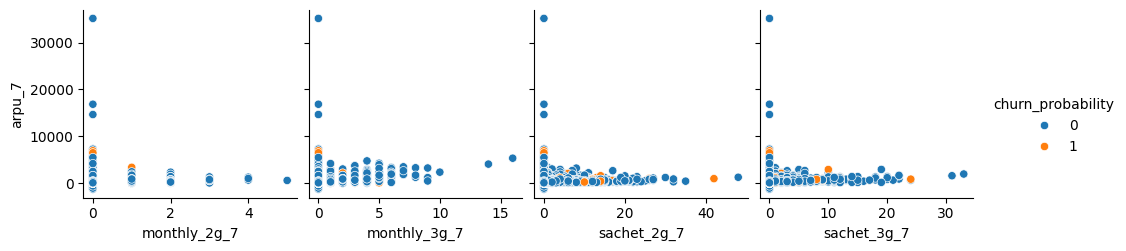

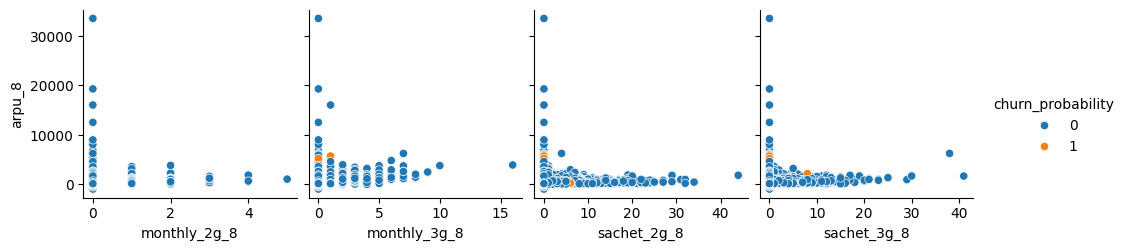

In [111]:
pyplot.figure(figsize=(12,12))
for m in (6,7,8):
    monthly_2g=[i for i in pre_processed_data if re.search('monthly_2g_'+str(m),i)]
    monthly_3g=[i for i in pre_processed_data if re.search('monthly_3g_'+str(m),i)]
    sachet_2g=[i for i in pre_processed_data if re.search('sachet_2g_'+str(m),i)]
    sachet_3g=[i for i in pre_processed_data if re.search('sachet_3g_'+str(m),i)]
    arpu=['arpu_'+str(m)]
    arpu_vs_off_on=np.concatenate((arpu,monthly_2g,monthly_3g,sachet_2g,sachet_3g,['churn_probability']))
    sns.pairplot(pre_processed_data[arpu_vs_off_on],y_vars=arpu,x_vars=np.concatenate((monthly_2g,monthly_3g,sachet_2g,sachet_3g)),hue='churn_probability')
    pyplot.show()

<Figure size 1200x1200 with 0 Axes>

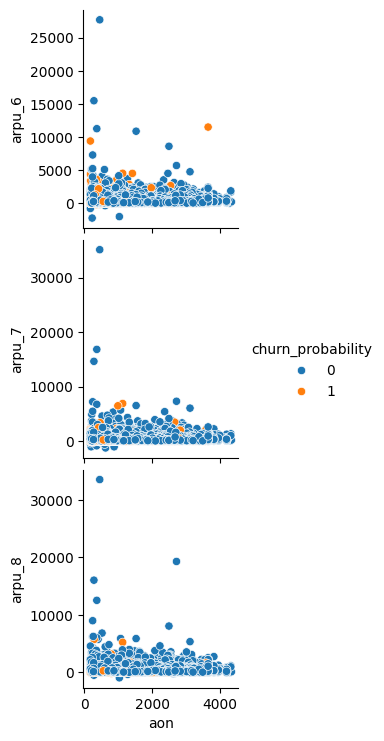

In [112]:
pyplot.figure(figsize=(12,12))
sns.pairplot(pre_processed_data[['aon','arpu_6','arpu_7','arpu_8','churn_probability']],y_vars=['arpu_6','arpu_7','arpu_8'],x_vars=['aon'],hue='churn_probability')
pyplot.show()

<Figure size 1200x1200 with 0 Axes>

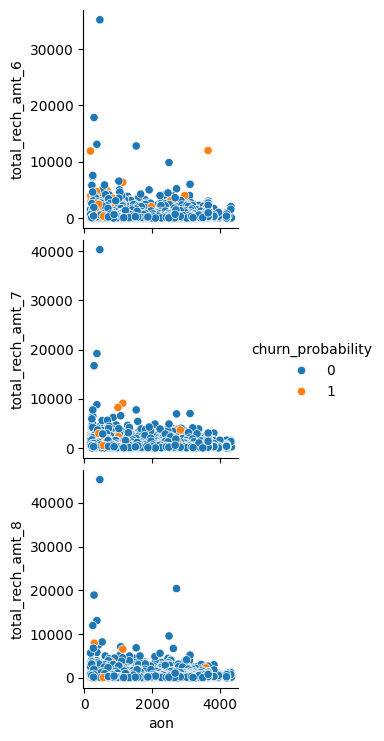

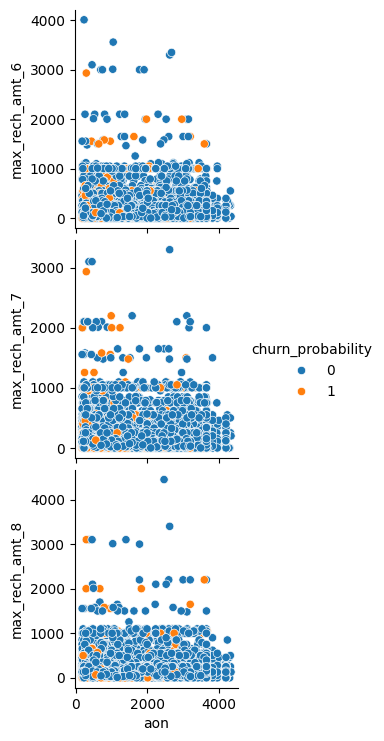

In [113]:
pyplot.figure(figsize=(12,12))
sns.pairplot(pre_processed_data[['aon','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','churn_probability']],y_vars=['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'],x_vars=['aon'],hue='churn_probability')
pyplot.show()
sns.pairplot(pre_processed_data[['aon','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','churn_probability']],y_vars=['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8'],x_vars=['aon'],hue='churn_probability')
pyplot.show()

#### Choosing effective columns from the above analysis

In [114]:
std=[i for i in pre_processed_data if re.search('std',i)]
loc=[i for i in pre_processed_data if re.search('loc',i)]
roam=[i for i in pre_processed_data if re.search('roam',i)]
total_rech=[i for i in pre_processed_data if re.search('total_rech',i)]
max_rech=[i for i in pre_processed_data if re.search('max_rech',i)]
arpu=[i for i in pre_processed_data if re.search('arpu',i)]
spl=[i for i in pre_processed_data if re.search('spl',i)]
isd=[i for i in pre_processed_data if re.search('isd',i)]
monthly_2g_3g=[i for i in pre_processed_data if re.search('monthly',i)]
sachet=[i for i in pre_processed_data if re.search('sachet',i)]
vbc=[i for i in pre_processed_data if re.search('vbc',i)]
onnet_offnet=[i for i in pre_processed_data if re.search('onnet|offnet',i)]
aon=['aon']
total=np.concatenate((std,loc,roam,total_rech,max_rech,arpu,spl,monthly_2g_3g,sachet,vbc,onnet_offnet,aon))

In [115]:
len(total)

93

In [116]:
pre_processed_data.head()

id  loc_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  onnet_mou_6  \
0   0             0.0             0.0   31.277   87.009    7.527        48.58   
1   1             0.0             0.0    0.000  122.787   42.953         0.00   
2   2             0.0             0.0   60.806  103.176    0.000         0.53   
3   3             0.0             0.0  156.362  205.260  111.095         7.26   
4   4             0.0             0.0  240.708  128.191  101.565        21.28   

   onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0       124.38         1.29         32.24         96.68          2.33   
1         0.00         0.00          0.00         25.99         30.89   
2        15.93         0.00         53.99         82.05          0.00   
3        16.01         0.00         68.76         78.48         50.23   
4         4.83         6.13         56.99         38.11          9.63   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0           0.00            0.0            0.0           0.00            0.0   
1           0.00            0.0            0.0           0.00            0.0   
2           0.00            0.0            0.0           0.00            0.0   
3           0.00            0.0            0.0           0.00            0.0   
4          53.64            0.0            0.0          15.73            0.0   

   roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0           0.00              2.23              0.00              0.28   
1           0.00              0.00              0.00              0.00   
2           0.00              0.53             12.98              0.00   
3           1.63              6.99              3.94              0.00   
4           0.00             10.16              4.83              6.13   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
0              5.29             16.04              2.33              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11              0.00              0.00              0.00   
3             37.91             44.89             23.63              0.00   
4             36.74             19.88              4.61             11.99   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00             22.01   
2              0.00              0.00              2.14              0.00   
3              0.00              0.00              0.00              0.00   
4              1.23              5.01              0.00              9.85   

   loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
0              0.00          7.53         16.04          2.61   
1             29.79          0.00          0.00          0.00   
2              0.00         24.64         12.98          0.00   
3              8.03         44.91         48.84         23.63   
4              0.00         58.91         25.94         15.76   

   std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0             46.34            124.38              1.01             18.75   
1              0.00              0.00              0.00              0.00   
2              0.00              2.94              0.00             28.94   
3              0.26             12.06              0.00             15.33   
4              0.00              0.00              0.00              4.35   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_mou_6  std_og_mou_7  \
0             80.61               0.0         65.09        204.99   
1              0.00               0.0          0.00          0.00   
2             82.05               0.0         28.94         84.99   
3             25.93               4.6         16.16         37.99   
4              0.00       

# 4. Splitting to train,test variables

In [117]:
X=pre_processed_data[total]

In [118]:
y=pre_processed_data['churn_probability']

In [119]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=100)

# 5. Feature Engineering  

In [120]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_train)

In [121]:
X_ada,y_ada=ADASYN(random_state=100).fit_resample(X_scaled,y_train)

In [122]:
Counter(y_ada)

Counter({1: 31980, 0: 31398})

In [123]:
X_ada=pd.DataFrame(X_ada,columns=X_train.columns)

#### Dimensionality Reduction via RFE

In [124]:
gcv=GridSearchCV(estimator=RFE(estimator=LogisticRegression(solver='liblinear')),verbose=True,return_train_score=True,scoring='accuracy',cv=3,param_grid={'n_features_to_select':[30]})

In [125]:
gcv.fit(X_ada,y_ada)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=RFE(estimator=LogisticRegression(solver='liblinear')),
             param_grid={'n_features_to_select': [30]}, return_train_score=True,
             scoring='accuracy', verbose=True)

In [126]:
rfe_columns=X_train.columns[gcv.best_estimator_.get_support()]

In [127]:
rfe_columns

Index(['std_og_t2t_mou_6', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_mou_6', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_mou_8', 'loc_og_t2t_mou_8', 'loc_og_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'arpu_6', 'arpu_7', 'arpu_8',
       'spl_ic_mou_6', 'spl_ic_mou_8', 'monthly_2g_8', 'sachet_2g_8',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'aon'],
      dtype='object')

#### Dimensionality Reduction via PCA

In [128]:
pca=IncrementalPCA(n_components=30)

In [129]:
pca.fit(X_ada,y_ada)

IncrementalPCA(n_components=30)

##### Scree Plot

<Axes: >

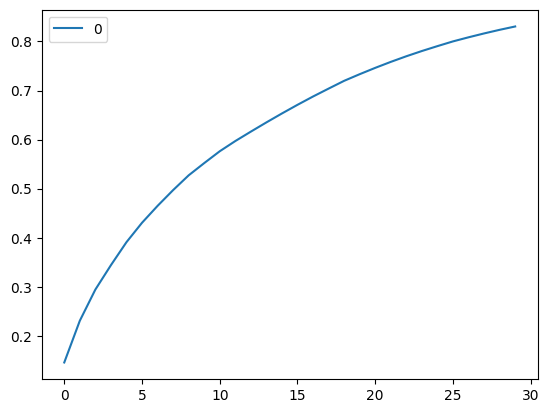

In [130]:
sns.lineplot(pca.explained_variance_ratio_.cumsum().reshape(-1,1))

In [131]:
X_pca=pd.DataFrame(pca.transform(X_ada))

In [132]:
X_pca.head()

0         1         2         3         4         5         6   \
0 -0.953505 -0.411476 -0.485597 -0.270623  1.000730 -0.217427 -0.023161   
1  0.144129  1.812130 -0.635432 -1.285079  0.585328  1.199792  0.181778   
2  0.445503 -3.754390 -0.211925  0.003147 -0.035042 -0.257627 -1.551684   
3 -0.273186 -1.914477  2.008437  0.317525 -0.239725  2.956910 -0.243297   
4  1.864101 -3.145768 -0.260071  1.463650  0.852310 -0.280977 -0.359265   

         7         8         9         10        11        12        13  \
0 -0.676887 -0.378882  0.176512  1.055885 -0.426373  0.191704  0.395586   
1 -3.172524 -0.624315 -0.188545  0.393600  0.013392  0.075216 -0.030157   
2 -0.562867 -0.186019 -1.557846 -0.110809  0.184745  0.813740  0.353256   
3 -0.338321 -1.559994  0.681267  0.357972  1.959897  0.121964 -1.333637   
4  0.163739  1.067024 -1.380465  0.555250  0.010596 -0.583103  1.297660   

         14        15        16        17        18        19        20  \
0  0.033731 -0.011107  0.193263 -0.448578 -0.634575 -0.591927 -1.113340   
1  0.332380 -0.505556  0.031900  0.553733 -0.060390 -0.394412 -0.008863   
2  0.106186 -0.128338 -0.165785  0.141068 -0.318943 -0.358707  0.222093   
3 -0.136179  0.354771  0.729337 -0.543396  0.408358 -0.324981 -1.332464   
4 -0.819969 -1.036947  0.814025 -0.528152 -0.791957 -0.269672 -0.051645   

         21        22        23        24        25        26        27  \
0  0.115897 -0.080170  0.197917 -0.517521 -0.950502  0.785571  0.649304   
1 -0.161095 -0.726456 -0.391792 -0.053575  0.166039  0.037410  0.140833   
2  0.263327  0.744711  0.515105  0.212703 -0.022964  0.292808  0.189887   
3  0.028045  0.876094  0.363051  0.963221  0.412734  1.254451  0.476805   
4 -0.587760  1.365461 -0.156205 -0.553098 -0.097981 -0.556191 -0.791055   

         28        29  
0  0.995528  0.267647  
1  0.908632 -0.705366  
2  0.102908  0.268641  
3 -0.449481 -0.124969  
4 -0.665283 -0.830355

In [133]:
def evaluate_model(estimator,X_tr,y_tr,X_t,y_t):
    estimator.fit(X_tr,y_tr)
    y_predict=estimator.predict(X_tr)
    y_predict_t=estimator.predict(X_t)
    tr_score=accuracy_score(y_tr,y_predict)
    test_score=accuracy_score(y_t,y_predict_t)
    print('Train score:'+str(round(tr_score,2)))
    print('Test score:'+str(round(test_score,2)))
    print("Train report \n"+classification_report(y_tr,y_predict))
    print("Test report \n"+classification_report(y_t,y_predict_t))
    RocCurveDisplay.from_estimator(estimator,X_t,y_t,drop_intermediate=False)
    pyplot.show()

#### Logistic Regression with RFE selected columns

In [134]:
lr=LogisticRegression(solver='liblinear')

In [135]:
X_test_scaled=scaler.transform(X_test)

In [136]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

Train score:0.78
Test score:0.75
Train report 
              precision    recall  f1-score   support

           0       0.80      0.74      0.77     31398
           1       0.76      0.82      0.79     31980

    accuracy                           0.78     63378
   macro avg       0.78      0.78      0.78     63378
weighted avg       0.78      0.78      0.78     63378

Test report 
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     31469
           1       0.26      0.83      0.40      3531

    accuracy                           0.75     35000
   macro avg       0.62      0.79      0.62     35000
weighted avg       0.90      0.75      0.80     35000



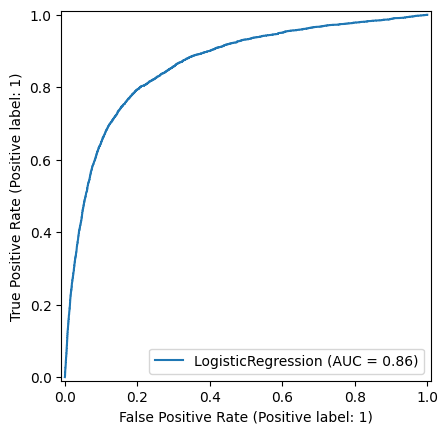

In [137]:
evaluate_model(lr,X_ada[rfe_columns],y_ada,X_test_scaled[rfe_columns],y_test)

#### Logistic Regression with PCA columns of 30

Train score:0.77
Test score:0.73
Train report 
              precision    recall  f1-score   support

           0       0.79      0.72      0.75     31398
           1       0.75      0.81      0.78     31980

    accuracy                           0.77     63378
   macro avg       0.77      0.77      0.77     63378
weighted avg       0.77      0.77      0.77     63378

Test report 
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     31469
           1       0.25      0.83      0.39      3531

    accuracy                           0.73     35000
   macro avg       0.61      0.78      0.61     35000
weighted avg       0.90      0.73      0.79     35000



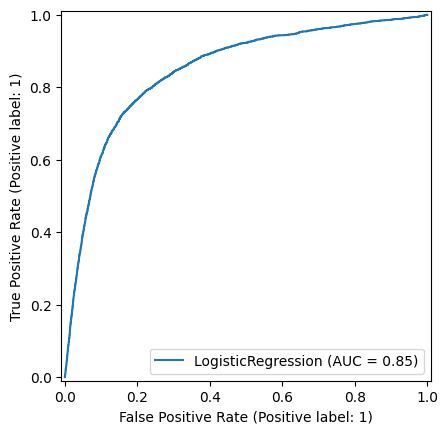

In [138]:
lr=LogisticRegression(solver='liblinear')
X_test_pca=pca.transform(X_test_scaled)
evaluate_model(lr,X_pca,y_ada,X_test_pca,y_test)

In [139]:
lr.coef_

array([[-0.13943708,  0.44565426,  0.1279886 , -0.03527653,  0.01591324,
        -0.28775303, -0.15590116,  0.40440098,  0.05312406,  0.24149874,
         0.06995585, -0.04291306,  0.05786365,  0.11893283,  0.21080377,
        -0.11911147, -0.04470935,  0.19067043,  0.11725243, -0.28929724,
         0.65380459, -0.52349769, -0.34487796, -0.01746228,  0.11937457,
        -0.07550032, -0.27610734, -0.35082508,  0.03730252, -0.23565838]])

In [140]:
#### Support Vector Classifier with RFE columns

Train score:0.9
Test score:0.85
Train report 
              precision    recall  f1-score   support

           0       0.92      0.87      0.90     31398
           1       0.88      0.93      0.91     31980

    accuracy                           0.90     63378
   macro avg       0.90      0.90      0.90     63378
weighted avg       0.90      0.90      0.90     63378

Test report 
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     31469
           1       0.37      0.78      0.50      3531

    accuracy                           0.85     35000
   macro avg       0.67      0.81      0.71     35000
weighted avg       0.91      0.85      0.87     35000



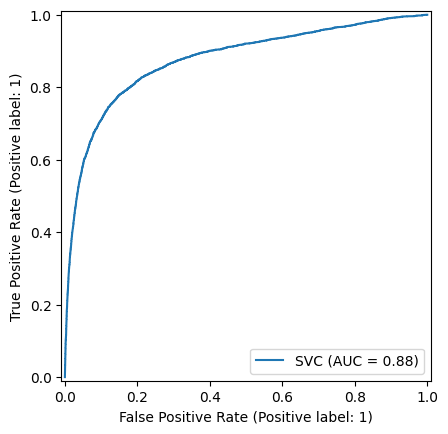

In [141]:
svc=SVC(C=30)
evaluate_model(svc,X_ada[rfe_columns],y_ada,X_test_scaled[rfe_columns],y_test)

In [142]:
#### Support Vector Classifier with PCA

Train score:0.91
Test score:0.85
Train report 
              precision    recall  f1-score   support

           0       0.93      0.88      0.90     31398
           1       0.89      0.93      0.91     31980

    accuracy                           0.91     63378
   macro avg       0.91      0.91      0.91     63378
weighted avg       0.91      0.91      0.91     63378

Test report 
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     31469
           1       0.37      0.73      0.49      3531

    accuracy                           0.85     35000
   macro avg       0.67      0.79      0.70     35000
weighted avg       0.91      0.85      0.87     35000



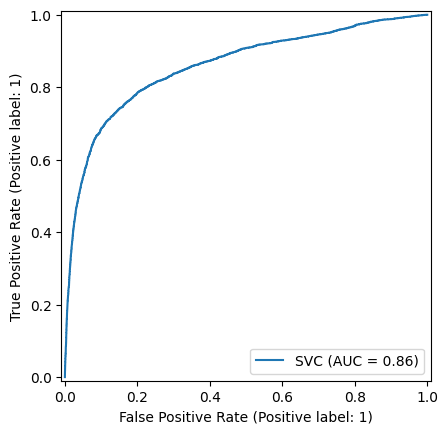

In [143]:
svc=SVC(C=30)
evaluate_model(svc,X_pca,y_ada,X_test_pca,y_test)

#### Decision Tree Classifier

In [144]:
dtc = DecisionTreeClassifier(max_depth=10,min_samples_leaf=5,min_samples_split=3,random_state=100)

Train score:0.92
Test score:0.88
Train report 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     31398
           1       0.92      0.92      0.92     31980

    accuracy                           0.92     63378
   macro avg       0.92      0.92      0.92     63378
weighted avg       0.92      0.92      0.92     63378

Test report 
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     31469
           1       0.44      0.73      0.55      3531

    accuracy                           0.88     35000
   macro avg       0.70      0.81      0.74     35000
weighted avg       0.91      0.88      0.89     35000



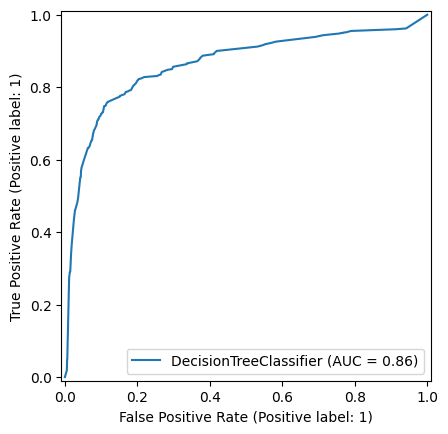

In [145]:
evaluate_model(dtc,X_ada,y_ada,X_test_scaled,y_test)

In [146]:
fi=pd.DataFrame({'features':X_ada.columns,'feature_importances':dtc.feature_importances_})

In [147]:
fi.sort_values(by='feature_importances',ascending=False).head(5)

features  feature_importances
52     roam_og_mou_8             0.560313
58  total_rech_amt_8             0.078802
61    max_rech_amt_8             0.064124
55  total_rech_num_8             0.057481
46      loc_ic_mou_8             0.030159

In [148]:
dt_features=fi.sort_values(by='feature_importances',ascending=False).head(30).features

In [149]:
dt_features.head()

52       roam_og_mou_8
58    total_rech_amt_8
61      max_rech_amt_8
55    total_rech_num_8
46        loc_ic_mou_8
Name: features, dtype: object

#### Random Forest Classifier

In [150]:
def get_dt_graph(dec_tree,feature_names_,max_depth=3):
    dot_data=StringIO()
    export_graphviz(dec_tree,out_file=dot_data,feature_names=feature_names_,filled=True,rounded=True,max_depth=max_depth)
    graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

Train score:0.9
Test score:0.89
Train report 
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     31398
           1       0.91      0.89      0.90     31980

    accuracy                           0.90     63378
   macro avg       0.90      0.90      0.90     63378
weighted avg       0.90      0.90      0.90     63378

Test report 
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     31469
           1       0.46      0.78      0.58      3531

    accuracy                           0.89     35000
   macro avg       0.72      0.84      0.76     35000
weighted avg       0.92      0.89      0.90     35000



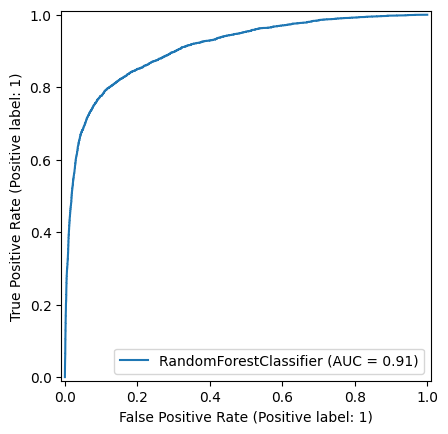

In [151]:
rfc_model_1=RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_leaf=5,min_samples_split=3,oob_score=True,random_state=100)
evaluate_model(rfc_model_1,X_ada[rfe_columns],y_ada,X_test_scaled[rfe_columns],y_test)

#### Visualizing Estimators of rfc

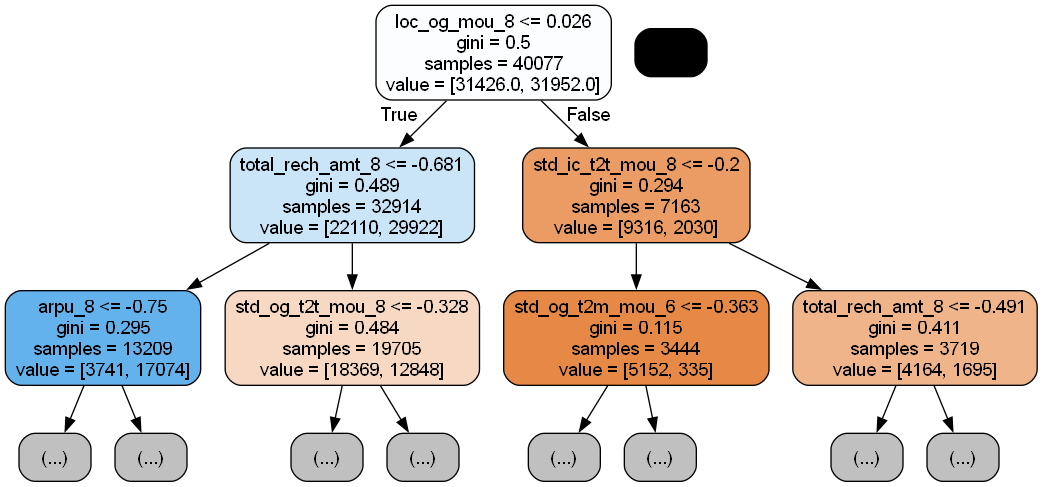

In [152]:
Image(get_dt_graph(rfc_model_1.estimators_[0],X_ada[rfe_columns].columns,max_depth=2).create_png())

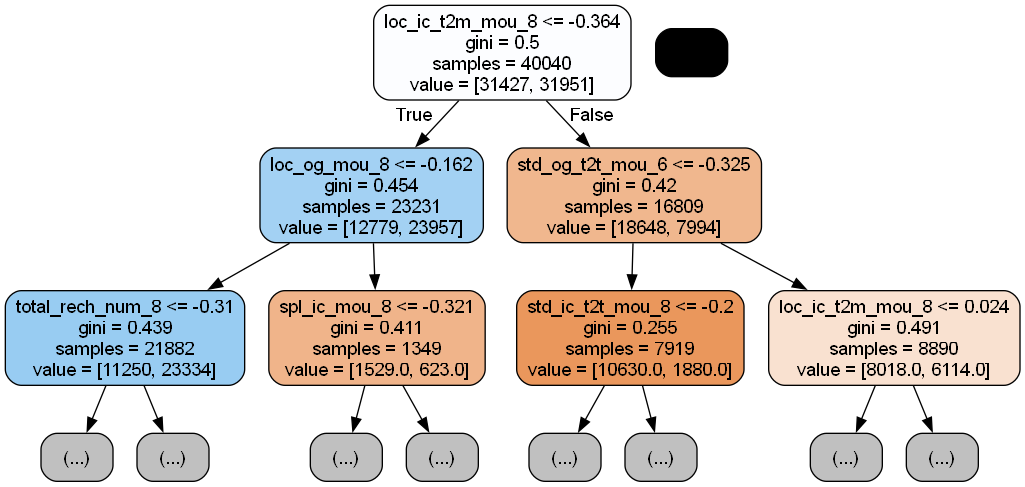

In [153]:
Image(get_dt_graph(rfc_model_1.estimators_[99],X_ada[rfe_columns].columns,max_depth=2).create_png())

In [154]:
rfc_model_1.oob_score_

0.8801319069708732

#### Feature Importances from RFC

Train score:0.88
Test score:0.82
Train report 
              precision    recall  f1-score   support

           0       0.91      0.85      0.88     31398
           1       0.86      0.92      0.89     31980

    accuracy                           0.88     63378
   macro avg       0.88      0.88      0.88     63378
weighted avg       0.88      0.88      0.88     63378

Test report 
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     31469
           1       0.34      0.80      0.47      3531

    accuracy                           0.82     35000
   macro avg       0.65      0.81      0.68     35000
weighted avg       0.91      0.82      0.85     35000



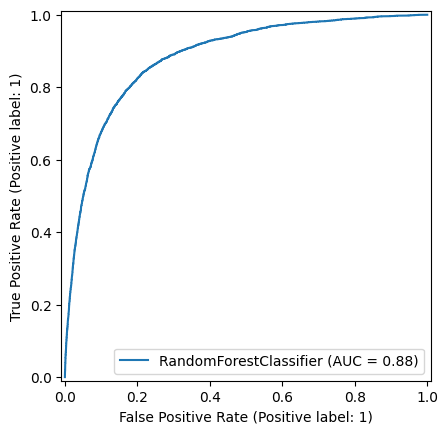

In [156]:
rfc_model_2=RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_leaf=5,min_samples_split=3,oob_score=True,random_state=100)
evaluate_model(rfc_model_2,X_pca,y_ada,X_test_pca,y_test)

In [157]:
pd.DataFrame({'columns':rfe_columns,'feature_scores':rfc_model_2.feature_importances_}).head(5)

columns  feature_scores
0  std_og_t2t_mou_6        0.016735
1  std_og_t2t_mou_8        0.174464
2  std_og_t2m_mou_6        0.019462
3      std_og_mou_6        0.018396
4      std_og_mou_8        0.014781

In [158]:
rfc_model_2.oob_score_

0.8553125690302629

In [159]:
rfc_model_2.feature_importances_

array([0.01673493, 0.1744638 , 0.01946217, 0.0183965 , 0.01478059,
       0.03776934, 0.02070718, 0.07445717, 0.0219367 , 0.04492814,
       0.05435231, 0.01310382, 0.01842985, 0.032148  , 0.01949804,
       0.01792027, 0.01417454, 0.01782138, 0.02885945, 0.02534605,
       0.0840737 , 0.06033479, 0.03114752, 0.01227328, 0.03288137,
       0.01084342, 0.01374872, 0.02203208, 0.01835968, 0.02901523])

Train score:0.92
Test score:0.9
Train report 
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     31398
           1       0.93      0.92      0.92     31980

    accuracy                           0.92     63378
   macro avg       0.92      0.92      0.92     63378
weighted avg       0.92      0.92      0.92     63378

Test report 
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     31469
           1       0.50      0.80      0.62      3531

    accuracy                           0.90     35000
   macro avg       0.74      0.85      0.78     35000
weighted avg       0.93      0.90      0.91     35000



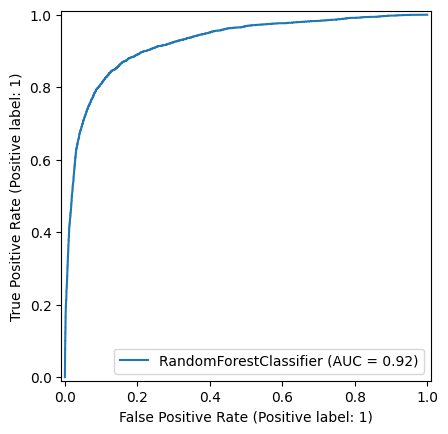

In [160]:
rfc_model_3=RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_leaf=5,min_samples_split=3,oob_score=True,random_state=100)
evaluate_model(rfc_model_3,X_ada,y_ada,X_test_scaled,y_test)

In [161]:
rfc_fi=pd.DataFrame({'features':X_ada.columns,'feature_scores':rfc_model_3.feature_importances_})

In [162]:
rfc_fi_features=rfc_fi.sort_values(by='feature_scores',ascending=False).head(30).features

In [163]:
rfc_fi_features.head()

52       roam_og_mou_8
49       roam_ic_mou_8
61      max_rech_amt_8
64              arpu_8
58    total_rech_amt_8
Name: features, dtype: object

#### AdaBoostClassifier

C:\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train score:0.85
Test score:0.84
Train report 
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     31398
           1       0.86      0.84      0.85     31980

    accuracy                           0.85     63378
   macro avg       0.85      0.85      0.85     63378
weighted avg       0.85      0.85      0.85     63378

Test report 
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     31469
           1       0.37      0.75      0.49      3531

    accuracy                           0.84     35000
   macro avg       0.67      0.80      0.70     35000
weighted avg       0.91      0.84      0.87     35000



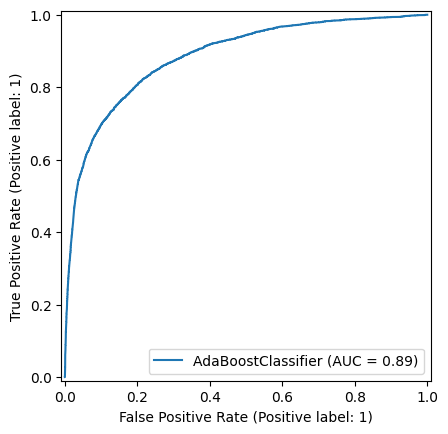

In [164]:
ada_boost_model_1=AdaBoostClassifier(n_estimators=100,learning_rate=0.5,random_state=100)
evaluate_model(ada_boost_model_1,X_ada[rfe_columns],y_ada,X_test_scaled[rfe_columns],y_test)

#### Decision Stump

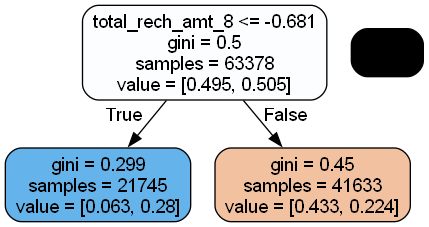

In [166]:
Image(get_dt_graph(ada_boost_model_1.estimators_[0],X_ada[rfe_columns].columns,max_depth=2).create_png())

C:\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train score:0.78
Test score:0.77
Train report 
              precision    recall  f1-score   support

           0       0.78      0.77      0.78     31398
           1       0.78      0.79      0.79     31980

    accuracy                           0.78     63378
   macro avg       0.78      0.78      0.78     63378
weighted avg       0.78      0.78      0.78     63378

Test report 
              precision    recall  f1-score   support

           0       0.97      0.76      0.86     31469
           1       0.28      0.82      0.42      3531

    accuracy                           0.77     35000
   macro avg       0.63      0.79      0.64     35000
weighted avg       0.90      0.77      0.81     35000



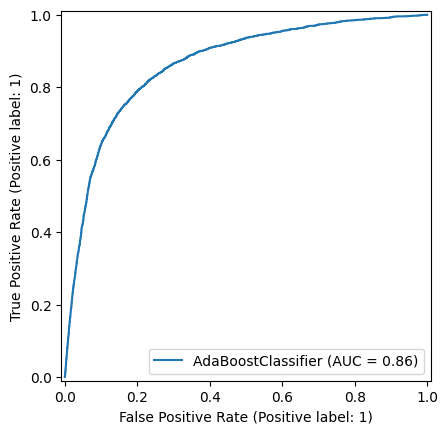

In [167]:
ada_boost_model_2=AdaBoostClassifier(n_estimators=100,learning_rate=0.5,random_state=100)
evaluate_model(ada_boost_model_2,X_pca,y_ada,X_test_pca,y_test)

C:\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train score:0.89
Test score:0.88
Train report 
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     31398
           1       0.90      0.89      0.89     31980

    accuracy                           0.89     63378
   macro avg       0.89      0.89      0.89     63378
weighted avg       0.89      0.89      0.89     63378

Test report 
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     31469
           1       0.45      0.75      0.56      3531

    accuracy                           0.88     35000
   macro avg       0.71      0.82      0.75     35000
weighted avg       0.92      0.88      0.89     35000



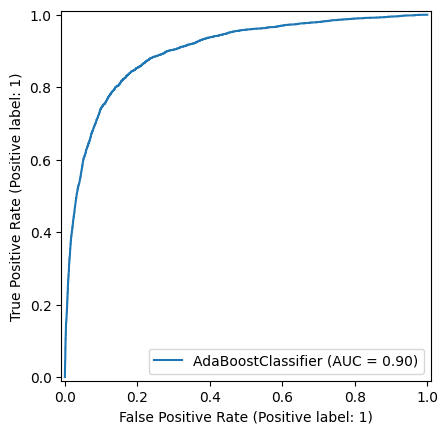

In [168]:
ada_boost_model_3=AdaBoostClassifier(n_estimators=100,learning_rate=0.5,random_state=100)
evaluate_model(ada_boost_model_3,X_ada[dt_features],y_ada,X_test_scaled[dt_features],y_test)

Train score:0.9
Test score:0.9
Train report 
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     31398
           1       0.92      0.89      0.90     31980

    accuracy                           0.90     63378
   macro avg       0.90      0.90      0.90     63378
weighted avg       0.90      0.90      0.90     63378

Test report 
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     31469
           1       0.49      0.73      0.59      3531

    accuracy                           0.90     35000
   macro avg       0.73      0.82      0.77     35000
weighted avg       0.92      0.90      0.91     35000



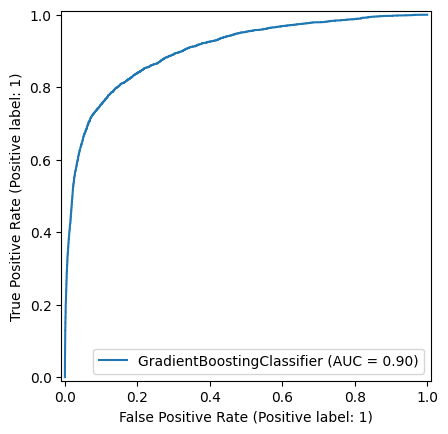

In [169]:
gbm_model_1=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,min_samples_split=3,min_samples_leaf=3)
evaluate_model(gbm_model_1,X_ada[rfe_columns],y_ada,X_test_scaled[rfe_columns],y_test)


Train score:0.81
Test score:0.79
Train report 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81     31398
           1       0.81      0.83      0.82     31980

    accuracy                           0.81     63378
   macro avg       0.81      0.81      0.81     63378
weighted avg       0.81      0.81      0.81     63378

Test report 
              precision    recall  f1-score   support

           0       0.98      0.79      0.87     31469
           1       0.31      0.84      0.45      3531

    accuracy                           0.79     35000
   macro avg       0.64      0.81      0.66     35000
weighted avg       0.91      0.79      0.83     35000



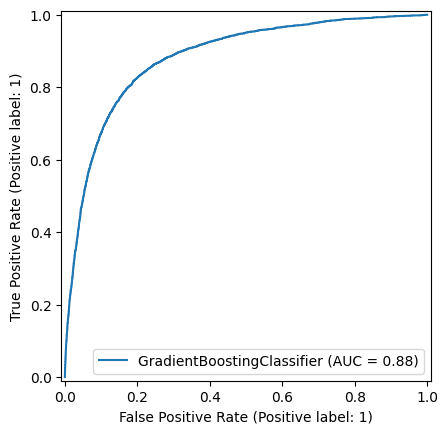

In [170]:
gbm_model_2=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,min_samples_split=3,min_samples_leaf=3)
evaluate_model(gbm_model_2,X_pca,y_ada,X_test_pca,y_test)

Train score:0.92
Test score:0.91
Train report 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     31398
           1       0.93      0.92      0.92     31980

    accuracy                           0.92     63378
   macro avg       0.92      0.92      0.92     63378
weighted avg       0.92      0.92      0.92     63378

Test report 
              precision    recall  f1-score   support

           0       0.97      0.92      0.95     31469
           1       0.52      0.75      0.62      3531

    accuracy                           0.91     35000
   macro avg       0.75      0.84      0.78     35000
weighted avg       0.93      0.91      0.91     35000



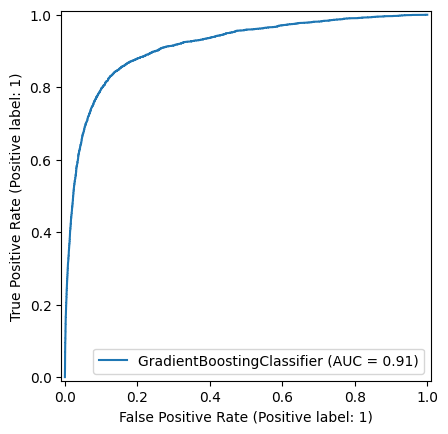

In [171]:
gbm_model_3=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,min_samples_split=3,min_samples_leaf=3)
evaluate_model(gbm_model_3,X_ada,y_ada,X_test_scaled,y_test)

In [172]:
gbm_fi=pd.DataFrame({'features':X_ada.columns,'feature_scores':gbm_model_3.feature_importances_})

In [173]:
gbm_fi.sort_values(by='features',ascending=False).head(5)

features  feature_scores
55  total_rech_num_8        0.058805
54  total_rech_num_7        0.007862
53  total_rech_num_6        0.004065
58  total_rech_amt_8        0.048888
57  total_rech_amt_7        0.000051

Train score:0.98
Test score:0.93
Train report 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     31398
           1       0.98      0.98      0.98     31980

    accuracy                           0.98     63378
   macro avg       0.98      0.98      0.98     63378
weighted avg       0.98      0.98      0.98     63378

Test report 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     31469
           1       0.65      0.63      0.64      3531

    accuracy                           0.93     35000
   macro avg       0.80      0.80      0.80     35000
weighted avg       0.93      0.93      0.93     35000



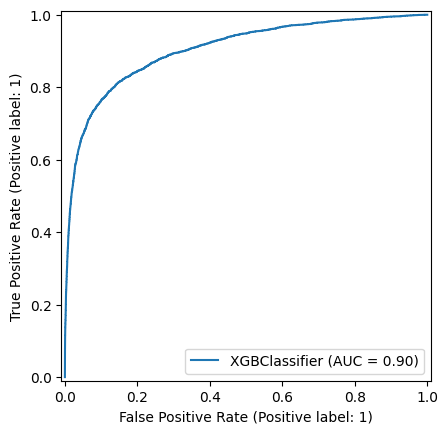

In [174]:
xgb_model_1=XGBClassifier(random_state=100,max_depth=7,learning_rate=0.2,reg_lambda=0.5)
evaluate_model(xgb_model_1,X_ada[rfe_columns],y_ada,X_test_scaled[rfe_columns],y_test)

Train score:0.93
Test score:0.85
Train report 
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     31398
           1       0.91      0.96      0.93     31980

    accuracy                           0.93     63378
   macro avg       0.93      0.93      0.93     63378
weighted avg       0.93      0.93      0.93     63378

Test report 
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     31469
           1       0.38      0.77      0.51      3531

    accuracy                           0.85     35000
   macro avg       0.68      0.81      0.71     35000
weighted avg       0.91      0.85      0.87     35000



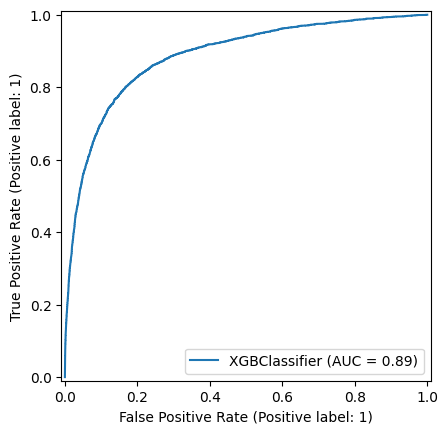

In [175]:
xgb_model_2=XGBClassifier(random_state=100,max_depth=6,learning_rate=0.2,reg_lambda=0.5,reg_alpha=0.1)
evaluate_model(xgb_model_2,X_pca,y_ada,X_test_pca,y_test)

Train score:0.99
Test score:0.93
Train report 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     31398
           1       0.99      0.99      0.99     31980

    accuracy                           0.99     63378
   macro avg       0.99      0.99      0.99     63378
weighted avg       0.99      0.99      0.99     63378

Test report 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     31469
           1       0.63      0.66      0.64      3531

    accuracy                           0.93     35000
   macro avg       0.79      0.81      0.80     35000
weighted avg       0.93      0.93      0.93     35000



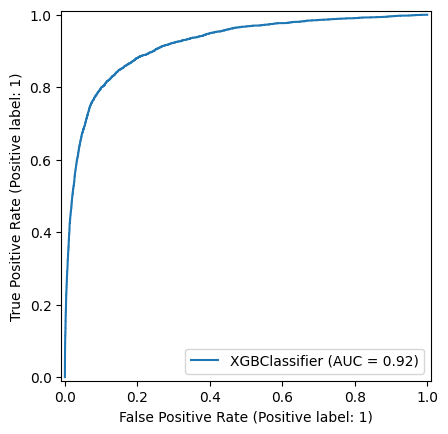

In [176]:
xgb_model_3=XGBClassifier(random_state=100,max_depth=10,learning_rate=0.1)
evaluate_model(xgb_model_3,X_ada[dt_features],y_ada,X_test_scaled[dt_features],y_test)

#### Hyperparameter Tuning

In [263]:
xgb_gcv_rf=GridSearchCV(estimator=XGBClassifier(random_state=100),verbose=True,cv=3,param_grid={'max_depth':[5,7,10],'learning_rate':[0.1,0.09,0.08],'reg_lambda':[0.1,0.3,0.5],'reg_alpha':[0.1,0.3]},return_train_score=True,n_jobs=-1)

In [264]:
xgb_gcv_rf.fit(X_ada[rfe_columns],y_ada)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=100, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.09, 0.08],
                         'max_depth': [5, 7, 10], 'reg_alpha': [0.1, 0.3],
                         'reg_lambda': [0.1, 0.3, 0.5]},
             return_train_score=True, verbose=True)

In [268]:
cv_res=pd.DataFrame(xgb_gcv_rf.cv_results_)
cv_res.sort_values(by='mean_test_score',ascending=False)[['mean_test_score','mean_train_score']].head()

mean_test_score  mean_train_score
12         0.938322          0.994651
15         0.937518          0.993768
13         0.937044          0.993775
17         0.936587          0.992639
14         0.936476          0.992671

Train score:0.99
Test score:0.93
Train report 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     31398
           1       0.99      0.99      0.99     31980

    accuracy                           0.99     63378
   macro avg       0.99      0.99      0.99     63378
weighted avg       0.99      0.99      0.99     63378

Test report 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     31469
           1       0.64      0.63      0.63      3531

    accuracy                           0.93     35000
   macro avg       0.80      0.79      0.80     35000
weighted avg       0.93      0.93      0.93     35000



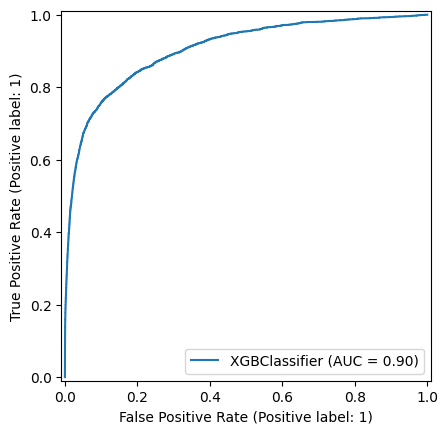

In [266]:
evaluate_model(xgb_gcv_rf.best_estimator_,X_ada[rfe_columns],y_ada,X_test_scaled[rfe_columns],y_test)

In [259]:
xgb_gcv=GridSearchCV(estimator=XGBClassifier(random_state=100),verbose=True,cv=3,param_grid={'max_depth':[5,7,10],'learning_rate':[0.1,0.09,0.08],'reg_lambda':[0.1,0.3,0.5],'reg_alpha':[0.1,0.3]},return_train_score=True,n_jobs=-1)

In [260]:
xgb_gcv.fit(X_ada[dt_features],y_ada)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=100, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.09, 0.08],
                         'max_depth': [5, 7, 10], 'reg_alpha': [0.1, 0.3],
                         'reg_lambda': [0.1, 0.3, 0.5]},
             return_train_score=True, verbose=True)

In [267]:
cv_res=pd.DataFrame(xgb_gcv.cv_results_)
cv_res.sort_values(by='mean_test_score',ascending=False)[['mean_test_score','mean_train_score']].head()

mean_test_score  mean_train_score
17         0.942314          0.997397
15         0.942141          0.998154
14         0.941936          0.997775
12         0.941936          0.998454
13         0.941825          0.998067

Train score:0.99
Test score:0.93
Train report 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31398
           1       1.00      0.99      0.99     31980

    accuracy                           0.99     63378
   macro avg       0.99      0.99      0.99     63378
weighted avg       0.99      0.99      0.99     63378

Test report 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     31469
           1       0.62      0.65      0.64      3531

    accuracy                           0.93     35000
   macro avg       0.79      0.80      0.80     35000
weighted avg       0.93      0.93      0.93     35000



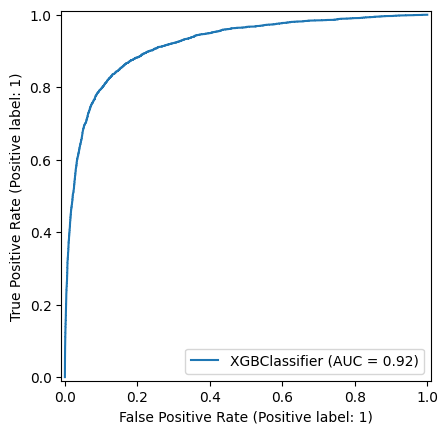

In [262]:
evaluate_model(xgb_gcv.best_estimator_,X_ada[dt_features],y_ada,X_test_scaled[dt_features],y_test)

#### Working with Unseen Data 

In [177]:
unseen.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

#### Applying Transformations

In [178]:
unseen[numeric_col]=knni.transform(unseen[numeric_col])

In [179]:
unseen[total].isnull().sum().sum()

np.int64(0)

In [180]:
unseen[total]=scaler.transform(unseen[total])

In [181]:
unseen_pca=pca.transform(unseen[total])

#### Predictions with XGB RFE Selected Features

In [281]:
predictions=xgb_gcv_rf.best_estimator_.predict(unseen[rfe_columns])

In [282]:
submissions=pd.DataFrame({'id':unseen['id'],'churn_probability':predictions})

In [283]:
submissions=submissions.set_index('id')

In [284]:
submissions.churn_probability.value_counts()*100/submissions.churn_probability.shape[0]

churn_probability
0    89.96
1    10.04
Name: count, dtype: float64

In [285]:
submissions.to_csv('C:\\Users\\meenaxi\\Downloads\\telecom-churn\\final_submission_2.csv')

#### Predictions with XGB Decision Tree Features

In [286]:
predictions=xgb_gcv.best_estimator_.predict(unseen[dt_features])

In [287]:
submissions=pd.DataFrame({'id':unseen['id'],'churn_probability':predictions})

In [288]:
submissions=submissions.set_index('id')

In [289]:
submissions.churn_probability.value_counts()/submissions.churn_probability.shape[0]

churn_probability
0    0.8937
1    0.1063
Name: count, dtype: float64

In [290]:
submissions.to_csv('C:\\Users\\meenaxi\\Downloads\\telecom-churn\\final_submission_1.csv')

In [ ]:
#### Max Accuracy Score

In [294]:
predictions=xgb_model_1.predict(unseen[rfe_columns])

In [295]:
submissions=pd.DataFrame({'id':unseen['id'],'churn_probability':predictions})

In [296]:
submissions=submissions.set_index('id')

In [297]:
submissions.churn_probability.value_counts()/submissions.churn_probability.shape[0]

churn_probability
0    0.900267
1    0.099733
Name: count, dtype: float64

In [298]:
submissions.to_csv('C:\\Users\\meenaxi\\Downloads\\telecom-churn\\final_submission_3.csv')

#### Business Recommendations

1. Look out for the early warning indicators such as decreasing recharge amounts for a customer , decrease in number of times a customer is recharging, decline in the max recharge amount and take cues whether the customer is going to churn or not
2. Check for the average decline in the minutes of usage in Incoming or Outgoing calls across t2t and t2m lines
3. Keep a tab on month-on-month metric for total_recharge_amount,max_recharge_amount which is a strong indicators of arpu.
4. Run customer retention campaigns with additional benefits based on the age of customer as we are seeing churn is higher for the customers below 2 years
5. Introduce roaming packs given the customers roaming usage goes high, consider ratecutters given the outgoing usages increases
6. There is an increase in the volume based costing month-on-month which indicates that customers are using internet without using any packs. Target those customers with monthly and sachet 2g , 3g schemes as these customers are potential churners.
7. Check the service quality / cost of 3g,2g monthly , sachetly costs as we see a dip in the number of packs down the 3rd month.
8. Target the vbc , 2g and 3g customer segments and identify the usage and advice the appropriate plan so that they won't churn. 

In [ ]:
The features having most importances from various models are :

In [301]:
pd.DataFrame({'rfe':rfe_columns,'dt':dt_features})

rfe                dt
52  std_og_t2t_mou_6     roam_og_mou_8
58  std_og_t2t_mou_8  total_rech_amt_8
61  std_og_t2m_mou_6    max_rech_amt_8
55      std_og_mou_6  total_rech_num_8
46      std_og_mou_8      loc_ic_mou_8
66  std_ic_t2t_mou_8      spl_og_mou_7
49  std_ic_t2m_mou_8     roam_ic_mou_8
40      std_ic_mou_8  loc_ic_t2m_mou_8
8   loc_og_t2t_mou_8      std_og_mou_8
51      loc_og_mou_8     roam_og_mou_7
22  loc_ic_t2m_mou_6  loc_og_t2t_mou_8
67  loc_ic_t2m_mou_8      spl_og_mou_8
70  loc_ic_t2f_mou_8      spl_ic_mou_8
12      loc_ic_mou_8  std_ic_t2m_mou_6
4   total_rech_num_7  std_og_t2m_mou_7
88  total_rech_num_8       onnet_mou_8
60  total_rech_amt_6    max_rech_amt_7
25  total_rech_amt_7  loc_og_t2m_mou_8
64  total_rech_amt_8            arpu_8
2             arpu_6  std_og_t2t_mou_8
92            arpu_7               aon
13            arpu_8  std_ic_t2m_mou_7
10      spl_ic_mou_6  std_ic_t2t_mou_7
41      spl_ic_mou_8  loc_ic_t2f_mou_6
38      monthly_2g_8  loc_ic_t2m_mou_6
16       sachet_2g_8      std_ic_mou_7
65       onnet_mou_8      spl_og_mou_6
90      offnet_mou_6      offnet_mou_7
62      offnet_mou_8            arpu_6
45               aon      loc_ic_mou_7